# **IMPORT MODULE**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import networkx as nx
import math
from scipy import stats
from scipy.stats import norm, kurtosis, skew
import plotly.express as px
import plotly.graph_objects as go
import re
import time
import csv
import os
import pickle
from tqdm import tqdm
import math


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from sklearn.ensemble import IsolationForest
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set option hiển thị
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [ ]:
# Chọn bảng màu
sns.set_theme(style='whitegrid')
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

# **DOWNLOAD DATASET**

In [ ]:
!gdown 143swELKRKK7CpTbQLdtQkjpUtPqJtejk

Downloading...
From: https://drive.google.com/uc?id=143swELKRKK7CpTbQLdtQkjpUtPqJtejk
To: /content/kaggle.json
100% 68.0/68.0 [00:00<00:00, 243kB/s]


In [ ]:
# Kiểm tra sự tồn tại của file kaggle.json
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Nov 27 08:25 kaggle.json


In [ ]:
!mkdir -p /content/kaggle
!cp kaggle.json /content/kaggle

In [ ]:
!chmod 600 /content/kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

#### *Download song data*

In [ ]:
!kaggle datasets download -d asaniczka/top-spotify-songs-in-73-countries-daily-updated/417
!mkdir -p /content/datasets/top-spotify-songs-in-73-countries-daily-updated
!unzip top-spotify-songs-in-73-countries-daily-updated.zip -d /content/datasets/top-spotify-songs-in-73-countries-daily-updated

Dataset URL: https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated/versions/417
License(s): ODC Attribution License (ODC-By)
 91% 103M/113M [00:01<00:00, 90.7MB/s] 
100% 113M/113M [00:01<00:00, 88.2MB/s]
Archive:  top-spotify-songs-in-73-countries-daily-updated.zip
  inflating: /content/datasets/top-spotify-songs-in-73-countries-daily-updated/universal_top_spotify_songs.csv  


# **READ DATA**

In [ ]:
song_data = pd.read_csv('/content/datasets/top-spotify-songs-in-73-countries-daily-updated/universal_top_spotify_songs.csv')

In [ ]:
song_data.head()

spotify_id                          name  \
0  5vNRhkKd0yEAg8suGBpjeY                          APT.   
1  2plbrEY59IikOBgBGLjaoe              Die With A Smile   
2  2CGNAOSuO1MEFCbBRgUzjd             luther (with sza)   
3  0nj9Bq5sHDiTxSHunhgkFb                   squabble up   
4  0aB0v4027ukVziUGwVGYpG  tv off (feat. lefty gunplay)   

                         artists  daily_rank  daily_movement  weekly_movement  \
0               ROSÉ, Bruno Mars           1               0                1   
1          Lady Gaga, Bruno Mars           2               0               -1   
2            Kendrick Lamar, SZA           3               0               47   
3                 Kendrick Lamar           4               0               46   
4  Kendrick Lamar, Lefty Gunplay           5               1               45   

  country snapshot_date  popularity  is_explicit  ...  key loudness mode  \
0     NaN    2024-11-27          98        False  ...    0   -4.477    0   
1     NaN    2024-11-27         100        False  ...    6   -7.777    0   
2     NaN    2024-11-27          64        False  ...    2   -7.546    1   
3     NaN    2024-11-27          86         True  ...    0   -5.568    1   
4     NaN    2024-11-27          85         True  ...    6   -6.679    0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.2600        0.0283               0.0    0.3550    0.939  149.027   
1       0.0304        0.3080               0.0    0.1220    0.535  157.969   
2       0.1250        0.2510               0.0    0.2480    0.576  138.008   
3       0.1980        0.0206               0.0    0.0783    0.711  103.921   
4       0.2630        0.0837               0.0    0.4230    0.548  100.036   

   time_signature  
0               4  
1               3  
2               4  
3               4  
4               4  

[5 rows x 25 columns]

In [ ]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468130 entries, 0 to 1468129
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1468130 non-null  object 
 1   name                1468101 non-null  object 
 2   artists             1468102 non-null  object 
 3   daily_rank          1468130 non-null  int64  
 4   daily_movement      1468130 non-null  int64  
 5   weekly_movement     1468130 non-null  int64  
 6   country             1448123 non-null  object 
 7   snapshot_date       1468130 non-null  object 
 8   popularity          1468130 non-null  int64  
 9   is_explicit         1468130 non-null  bool   
 10  duration_ms         1468130 non-null  int64  
 11  album_name          1467460 non-null  object 
 12  album_release_date  1467623 non-null  object 
 13  danceability        1468130 non-null  float64
 14  energy              1468130 non-null  float64
 15  key            

# **CRAWL GENRE DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spotify_id_df = pd.read_csv('/content/drive/MyDrive/DS105/Source_code/spotify_id.csv', names=['id'])[1:]

In [ ]:
!pip install spotipy

  Using cached spotipy-2.24.0-py3-none-any.whl.metadata (4.9 kB)
Using cached spotipy-2.24.0-py3-none-any.whl (30 kB)


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '39b0ca6f345d479f9ea3258369b7f953'
client_secret = 'd57491f755a14c70858574158e748a0e'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

In [ ]:
def fetch_genres_for_tracks(track_ids):
    artist_genres = {}
    processed_artists = set()
    artist_ids = set()

    for i in range(0, len(track_ids), 50):  # Crawl 1 lúc 50 tracks
        batch = track_ids[i:i+50]
        try:
            tracks = sp.tracks(batch)['tracks']
            for track in tracks:
                if track and track.get('artists'):  # Đảm bảo có track và artists
                    for artist in track['artists']:
                        if artist['id'] not in processed_artists:
                            artist_ids.add(artist['id'])
        except spotipy.exceptions.SpotifyException as e:
            print(f"Error fetching tracks batch: {e}")
        except Exception as e:
            print(f"Unexpected error: {e}")
        time.sleep(5)

    # Tìm genres cho artists
    for i in range(0, len(artist_ids), 50):  # Crawl 1 lúc 50 artists
        batch = list(artist_ids)[i:i+50]
        try:
            artists = sp.artists(batch)['artists']
            for artist in artists:
                artist_genres[artist['id']] = artist.get('genres', [])
                processed_artists.add(artist['id'])
        except spotipy.exceptions.SpotifyException as e:
            print(f"Error: {e}")
        time.sleep(5)

    return artist_genres

In [ ]:
def map_genres_to_tracks(track_ids, output_file):
    genres_by_artist = fetch_genres_for_tracks(track_ids)
    for i in range(0, len(track_ids), 50):
        batch = track_ids[i:i+50]
        try:
            tracks = sp.tracks(batch)['tracks']
            for track in tqdm(tracks):
                if track is not None and isinstance(track, dict):
                    track_id = track['id']
                    track_genres = set()
                    for artist in track['artists']:
                        artist_genres = genres_by_artist.get(artist['id'], [])
                        track_genres.update(artist_genres)
                    with open(output_file, mode='a', newline='', encoding='utf-8') as file:
                        writer = csv.writer(file)
                        writer.writerow([track_id, ';'.join(track_genres)])
                    print(f"Saved: {track_id} -> {list(track_genres)}")
        except spotipy.exceptions.SpotifyException as e:
            print(f"Error: {e}")
        time.sleep(5)


In [ ]:
output_file = '/content/drive/MyDrive/DS105/Source_code/output.csv'
if not os.path.exists(output_file):
    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['id', 'genres'])

In [ ]:
track_ids =  list(spotify_id_df['id'].unique()[15000:])
result = map_genres_to_tracks(track_ids, output_file)

In [ ]:
output = pd.read_csv('/content/drive/MyDrive/DS105/Source_code/output.csv')

In [ ]:
# check duplicate
unique_rows = []
unique = set()
for index, row in output.iterrows():
  row_tuple = tuple(row)
  if row_tuple not in unique:
    unique_rows.append(row)
    unique.add(row_tuple)

In [ ]:
output_unique = pd.DataFrame(unique_rows, columns=output.columns)
output_unique.head(10)

In [ ]:
output_unique.to_csv('/content/drive/MyDrive/Phân tích và trực quan hóa dữ liệu/genres.csv', index=False)

# **CONCAT GENRE DATA**

In [ ]:
genre_data = pd.read_csv('/content/drive/MyDrive/DS105/Source_code/genres.csv')
genre_data.head(10)

id                                             genres
0  2plbrEY59IikOBgBGLjaoe                              art pop;dance pop;pop
1  5vNRhkKd0yEAg8suGBpjeY                                dance pop;pop;k-pop
2  6dOtVTDdiauQNBQEDOtlAB                                        art pop;pop
3  2CGNAOSuO1MEFCbBRgUzjd  pop;west coast rap;r&b;conscious hip hop;rap;h...
4  06qMRF18gwbOYYbnP2du6i       soft rock;new romantic;new wave;new wave pop
5  0bYg9bo50gSsH3LtXe2SQn                   dance pop;pop;urban contemporary
6  7ne4VBA60CxGM75vw0EYad                                              alt z
7  4lriIG2vNqwDWzOj2I9rtj  french pop;belgian pop;nouvelle chanson franca...
8  7tI8dRuH2Yc6RuoTjxo4dU                                              k-pop
9  2qSkIjg1o9h3YT9RAgYN75                                                pop

In [ ]:
def merge(df1: pd.DataFrame, df2: pd.DataFrame):
  df_new = df1.merge(df2[['id', 'genres']],
                     left_on='spotify_id',
                     right_on='id',
                     how='left')
  return df_new.drop(columns=['id'])

In [ ]:
song_full = merge(song_data, genre_data)
song_full.head()

spotify_id                          name  \
0  5vNRhkKd0yEAg8suGBpjeY                          APT.   
1  2plbrEY59IikOBgBGLjaoe              Die With A Smile   
2  2CGNAOSuO1MEFCbBRgUzjd             luther (with sza)   
3  0nj9Bq5sHDiTxSHunhgkFb                   squabble up   
4  0aB0v4027ukVziUGwVGYpG  tv off (feat. lefty gunplay)   

                         artists  daily_rank  daily_movement  weekly_movement  \
0               ROSÉ, Bruno Mars           1               0                1   
1          Lady Gaga, Bruno Mars           2               0               -1   
2            Kendrick Lamar, SZA           3               0               47   
3                 Kendrick Lamar           4               0               46   
4  Kendrick Lamar, Lefty Gunplay           5               1               45   

  country snapshot_date  popularity  is_explicit  ...  loudness mode  \
0     NaN    2024-11-27          98        False  ...    -4.477    0   
1     NaN    2024-11-27         100        False  ...    -7.777    0   
2     NaN    2024-11-27          64        False  ...    -7.546    1   
3     NaN    2024-11-27          86         True  ...    -5.568    1   
4     NaN    2024-11-27          85         True  ...    -6.679    0   

  speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0      0.2600        0.0283               0.0    0.3550    0.939  149.027   
1      0.0304        0.3080               0.0    0.1220    0.535  157.969   
2      0.1250        0.2510               0.0    0.2480    0.576  138.008   
3      0.1980        0.0206               0.0    0.0783    0.711  103.921   
4      0.2630        0.0837               0.0    0.4230    0.548  100.036   

   time_signature                                             genres  
0               4                                dance pop;pop;k-pop  
1               3                              art pop;dance pop;pop  
2               4  pop;west coast rap;r&b;conscious hip hop;rap;h...  
3               4       conscious hip hop;west coast rap;rap;hip hop  
4               4       conscious hip hop;west coast rap;rap;hip hop  

[5 rows x 26 columns]

# **PREPROCESSING**

In [ ]:
song_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468130 entries, 0 to 1468129
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1468130 non-null  object 
 1   name                1468101 non-null  object 
 2   artists             1468102 non-null  object 
 3   daily_rank          1468130 non-null  int64  
 4   daily_movement      1468130 non-null  int64  
 5   weekly_movement     1468130 non-null  int64  
 6   country             1448123 non-null  object 
 7   snapshot_date       1468130 non-null  object 
 8   popularity          1468130 non-null  int64  
 9   is_explicit         1468130 non-null  bool   
 10  duration_ms         1468130 non-null  int64  
 11  album_name          1467460 non-null  object 
 12  album_release_date  1467623 non-null  object 
 13  danceability        1468130 non-null  float64
 14  energy              1468130 non-null  float64
 15  key            

In [ ]:
pd.Series({col:song_full[col].unique() for col in song_full.columns})

spotify_id            [5vNRhkKd0yEAg8suGBpjeY, 2plbrEY59IikOBgBGLjao...
name                  [APT., Die With A Smile, luther (with sza), sq...
artists               [ROSÉ, Bruno Mars, Lady Gaga, Bruno Mars, Kend...
daily_rank            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
daily_movement        [0, 1, -1, 17, 3, 2, 4, -14, -13, 9, 7, 5, -17...
weekly_movement       [1, -1, 47, 46, 45, -3, 42, -4, 40, -5, 38, 37...
country               [nan, ZA, VN, VE, UY, US, UA, TW, TR, TH, SV, ...
snapshot_date         [2024-11-27, 2024-11-26, 2024-11-25, 2024-11-2...
popularity            [98, 100, 64, 86, 85, 97, 94, 77, 92, 84, 83, ...
is_explicit                                               [False, True]
duration_ms           [169917, 251667, 177598, 157992, 220690, 21037...
album_name            [APT., Die With A Smile, GNX, HIT ME HARD AND ...
album_release_date    [2024-10-18, 2024-08-16, 2024-11-21, 2024-11-2...
danceability          [0.777, 0.521, 0.707, 0.874, 0.855, 0.747, 0.5...
energy                [0.783, 0.592, 0.575, 0.672, 0.529, 0.507, 0.8...
key                              [0, 6, 2, 1, 4, 9, 11, 10, 8, 7, 3, 5]
loudness              [-4.477, -7.777, -7.546, -5.568, -6.679, -10.1...
mode                                                             [0, 1]
speechiness           [0.26, 0.0304, 0.125, 0.198, 0.263, 0.0358, 0....
acousticness          [0.0283, 0.308, 0.251, 0.0206, 0.0837, 0.2, 0....
instrumentalness      [0.0, 0.0608, 0.000936, 6.72e-05, 0.00162, 1.3...
liveness              [0.355, 0.122, 0.248, 0.0783, 0.423, 0.117, 0....
valence               [0.939, 0.535, 0.576, 0.711, 0.548, 0.438, 0.3...
tempo                 [149.027, 157.969, 138.008, 103.921, 100.036, ...
time_signature                                          [4, 3, 5, 1, 0]
genres                [dance pop;pop;k-pop, art pop;dance pop;pop, p...
dtype: object

#### *Convert data type*

In [ ]:
#Chuyển cột snapshot_data và album_release_date về kiểu datetime
song_full['snapshot_date'] = pd.to_datetime(song_full['snapshot_date'], format='%Y-%m-%d')
song_full['album_release_date'] = pd.to_datetime(song_full['album_release_date'], format='%Y-%m-%d')

#### *Clean data*

In [ ]:
country_codes_dict = {
    'ZA': 'South Africa',
    'VN': 'Vietnam',
    'VE': 'Venezuela',
    'UY': 'Uruguay',
    'US': 'United States',
    'UA': 'Ukraine',
    'TW': 'Taiwan',
    'TR': 'Turkey',
    'TH': 'Thailand',
    'SV': 'El Salvador',
    'SK': 'Slovakia',
    'SG': 'Singapore',
    'SE': 'Sweden',
    'SA': 'Saudi Arabia',
    'RO': 'Romania',
    'PY': 'Paraguay',
    'PT': 'Portugal',
    'PL': 'Poland',
    'PK': 'Pakistan',
    'PH': 'Philippines',
    'PE': 'Peru',
    'PA': 'Panama',
    'NZ': 'New Zealand',
    'NO': 'Norway',
    'NL': 'Netherlands',
    'NI': 'Nicaragua',
    'NG': 'Nigeria',
    'MY': 'Malaysia',
    'MX': 'Mexico',
    'MA': 'Morocco',
    'LV': 'Latvia',
    'LU': 'Luxembourg',
    'LT': 'Lithuania',
    'KZ': 'Kazakhstan',
    'KR': 'South Korea',
    'JP': 'Japan',
    'IT': 'Italy',
    'IS': 'Iceland',
    'IN': 'India',
    'IL': 'Israel',
    'IE': 'Ireland',
    'ID': 'Indonesia',
    'HU': 'Hungary',
    'HN': 'Honduras',
    'HK': 'Hong Kong',
    'GT': 'Guatemala',
    'GR': 'Greece',
    'GB': 'United Kingdom',
    'FR': 'France',
    'FI': 'Finland',
    'ES': 'Spain',
    'EG': 'Egypt',
    'EE': 'Estonia',
    'EC': 'Ecuador',
    'DO': 'Dominican Republic',
    'DK': 'Denmark',
    'DE': 'Germany',
    'CZ': 'Czech Republic',
    'CR': 'Costa Rica',
    'CO': 'Colombia',
    'CL': 'Chile',
    'CH': 'Switzerland',
    'CA': 'Canada',
    'BY': 'Belarus',
    'BR': 'Brazil',
    'BO': 'Bolivia',
    'BG': 'Bulgaria',
    'BE': 'Belgium',
    'AU': 'Australia',
    'AT': 'Austria',
    'AR': 'Argentina',
    'AE': 'United Arab Emirates',
    'Global': 'Global'
}

In [ ]:
# Làm sạch giá trị trong thuộc tính name
def erase_content_name(name: str) -> str:
    new_name = re.sub(r'\(.*?\)', '', name) # Xóa nội dung trong dấu ()
    new_name = re.sub(r'-.*', '', new_name) # Xóa nội dung phía sau dấu -
    new_name = re.sub(r'\s+', ' ', new_name).strip() # Xóa khoảng trắng thừa
    return new_name

# Matching thuộc tính
def matching_values(key):
    tonal_counterparts = ['C', 'C#-Db', 'D', 'D#-Eb', 'E', 'F', 'F#-Gb', 'G', 'G#-Ab', 'A', 'A#-Bb', 'B']
    return tonal_counterparts[key]

def matching_modes(mode):
    if mode == 1:
        return 'Major'
    return 'Minor'

def matching_country_code(code):
    return country_codes_dict[code]

# Chuyển từ ms sang minute
def convert_duration_to_minute(ms):
    return round((ms / 60000.0), 2)

In [ ]:
# Preprocessing Data
song_full = song_full.replace('', np.nan)
song_full = song_full[~song_full['name'].isna()].reset_index(drop=True)
song_full['name'] = song_full['name'].apply(erase_content_name)
song_full['country'] = song_full['country'].replace(np.nan, 'Global')
song_full['country'] = song_full['country'].apply(matching_country_code)
song_full['key'] = song_full['key'].apply(matching_values)
song_full['mode'] = song_full['mode'].apply(matching_modes)
song_full = song_full.rename(columns={'duration_ms': 'duration'})
song_full['duration'] = song_full['duration'].apply(convert_duration_to_minute)
song_full = song_full[~((song_full['album_name'].isna()) & (song_full['album_release_date'].isna()))].reset_index(drop=True)

#### *Fix id, name and artists*

Các lỗi cần sửa chữa:
* ID -> Song (1-n)
* ID + Song -> Artists (1-n) (Format)
* Song + Artists -> ID (1-n)



In [ ]:
def fix_errors(df: pd.DataFrame, grouped_feature: list, fix_feature: str) -> pd.DataFrame:
    new_feature = 'most_frequency_' + fix_feature
    most_freq = df.groupby(grouped_feature)[fix_feature].agg(
        lambda x: x.value_counts().idxmax()
    ).reset_index().rename(columns={fix_feature: new_feature})

    df_new = pd.merge(df, most_freq, on=grouped_feature, how='left')
    df_new[fix_feature] = df_new[new_feature]
    df_new = df_new.drop(columns=[new_feature])
    return df_new

song_full = fix_errors(song_full, grouped_feature='spotify_id', fix_feature='name')
song_full = fix_errors(song_full, grouped_feature=['spotify_id', 'name'], fix_feature='artists')
song_full = fix_errors(song_full, grouped_feature=['name', 'artists'], fix_feature='spotify_id')

In [ ]:
song_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467622 entries, 0 to 1467621
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   spotify_id          1467622 non-null  object        
 1   name                1467622 non-null  object        
 2   artists             1467622 non-null  object        
 3   daily_rank          1467622 non-null  int64         
 4   daily_movement      1467622 non-null  int64         
 5   weekly_movement     1467622 non-null  int64         
 6   country             1467622 non-null  object        
 7   snapshot_date       1467622 non-null  datetime64[ns]
 8   popularity          1467622 non-null  int64         
 9   is_explicit         1467622 non-null  bool          
 10  duration            1467622 non-null  float64       
 11  album_name          1467460 non-null  object        
 12  album_release_date  1467622 non-null  datetime64[ns]
 13  danceability

In [ ]:
# Tìm nguyên nhân album_name bị null
song_full[song_full['album_name'].isna()]['spotify_id'].unique()

array(['53rB05bAi7JdNbUfgz72I1'], dtype=object)

In [ ]:
# Những album_name bị null dù vẫn có album_release_date là do sai ký tự (np.nan -> NA)
song_full['album_name'].fillna('NA', inplace=True)

#### *Convert to list*

In [ ]:
def split_genres_into_list(genres):
  if isinstance(genres, str):
    return genres.split(';')
  return np.nan

def split_artists_into_list(artists):
  if isinstance(artists, str):
    return artists.split(', ')
  return np.nan

song_full['genres'] = song_full['genres'].apply(split_genres_into_list)
song_full['artists'] = song_full['artists'].apply(split_artists_into_list)

#### *Check after preprocessing*

Column genres has 180565 missing values (12.303236119382237%)


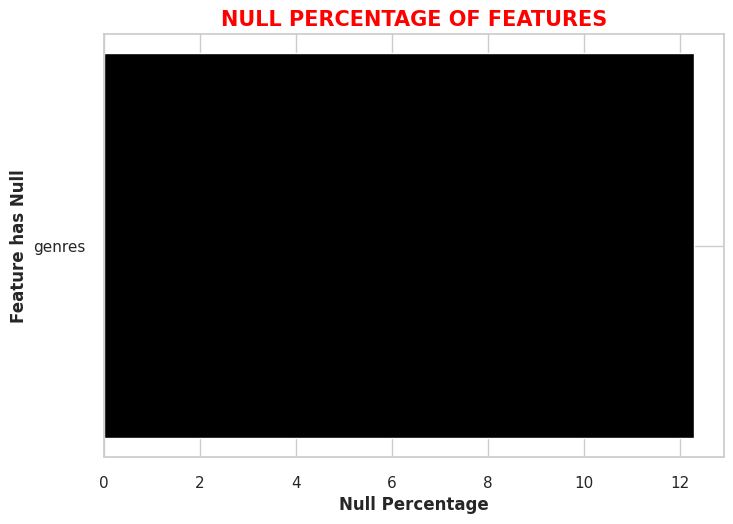

In [ ]:
def display_missing(data:pd.DataFrame)-> None:
  df = data.copy()
  list_feature, list_null_percent = [], []
  for col in df.columns:
    missing_count = df[col].isnull().sum(axis=0)
    if(missing_count > 0):
      null_percent = missing_count/df.shape[0]*100
      list_feature.append(col)
      list_null_percent.append(null_percent)
      print(f'Column {col} has {missing_count} missing values ({null_percent}%)')

  colors = cm.CMRmap([i/len(df.columns) for i in range(len(df.columns))])
  plt.barh(list_feature, list_null_percent, color=colors)
  plt.title('NULL PERCENTAGE OF FEATURES', fontweight='bold', fontsize=15, color='red')
  plt.ylabel('Feature has Null', fontweight='bold', fontsize=12)
  plt.xlabel('Null Percentage',fontweight='bold', fontsize=12)
  plt.show()

display_missing(song_full)

# **EDA**

In [ ]:
# Tạo cột year of album release data
song_full['year'] = song_full['album_release_date'].dt.year

In [ ]:
# Tạo cột thập kỷ
def extract_decade(year):
    start_period = int(year/10) * 10
    decade = '{}s'.format(start_period)
    return decade

song_full['decade'] = song_full['year'].apply(extract_decade)

In [ ]:
song_full.to_csv('full_dataset.csv')

In [ ]:
song_full_without_null = song_full.copy()
song_full_without_null['genres'] = song_full_without_null['genres'].apply(lambda x: x if isinstance(x, list) else [])

#### *Aspect 1: Yếu tố âm thanh (acousticness, liveness, instrumentalness, energy, danceability, valence, loudness, tempo)*

In [ ]:
sound_features = ['acousticness', 'liveness', 'instrumentalness', 'energy', 'danceability', 'valence', 'loudness', 'tempo']

In [ ]:
data1 = song_full.drop_duplicates(subset = ['spotify_id', 'name'])
data1[['loudness', 'tempo']] = MinMaxScaler().fit_transform(data1[['loudness', 'tempo']])

In [ ]:
decade_data = data1.groupby(by='decade')[sound_features].agg({
    'acousticness':'mean',
    'liveness':'mean',
    'instrumentalness':'mean',
    'energy':'mean',
    'danceability':'mean',
    'valence':'mean',
    'loudness':'mean',
    'tempo':'mean'
}).reset_index()
decade_data

decade  acousticness  liveness  instrumentalness    energy  danceability  \
0   1900s      0.244000  0.205000          0.000000  0.528000      0.762000   
1   1930s      0.945000  0.851000          0.000061  0.506000      0.307000   
2   1940s      0.783667  0.315333          0.000018  0.265667      0.522667   
3   1950s      0.880375  0.117362          0.120108  0.278875      0.547750   
4   1960s      0.579241  0.184007          0.019907  0.505828      0.618621   
5   1970s      0.367354  0.197702          0.024781  0.621565      0.588758   
6   1980s      0.327242  0.165105          0.016046  0.605516      0.617306   
7   1990s      0.333437  0.172196          0.013417  0.618286      0.582934   
8   2000s      0.306255  0.190085          0.014864  0.662991      0.618063   
9   2010s      0.324369  0.178566          0.019427  0.621282      0.618712   
10  2020s      0.267811  0.182513          0.031284  0.652697      0.685009   

     valence  loudness     tempo  
0   0.707000  0.713238  0.580784  
1   0.451000  0.662779  0.486209  
2   0.594333  0.595358  0.559121  
3   0.706500  0.589202  0.471746  
4   0.754724  0.683728  0.480464  
5   0.702016  0.729141  0.528061  
6   0.656750  0.693378  0.510484  
7   0.624339  0.706186  0.523554  
8   0.629352  0.755386  0.518166  
9   0.548045  0.758708  0.511814  
10  0.526662  0.758018  0.518973

In [ ]:
fig = go.Figure()
for decade in decade_data['decade']:
    fig.add_trace(go.Scatterpolar(
        r=decade_data[decade_data['decade'] == decade][sound_features].values.flatten().tolist(),
        theta=sound_features,
        fill='toself',
        name=f'decade: {decade}'
    ))

large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>Spotify Music Features Over Decades</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'>Comparison of acousticness, liveness, instrumentalness, energy, danceability, valence, loudness and tempo</span>"

layout = dict(
    title=large_title_format + '<br>' + small_title_format,
    font=dict(color='#7b6b59'),
    showlegend=True,
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1.0])
    ),
    margin=dict(t=100, pad=6),
    width=1000,
    height=500
)

fig['layout'].update(layout)

fig.show()

##### Kết luận
1. Thập kỷ 1900s -> 1960s có chỉ số acouticness cao hơn và chỉ số energy, danceability 1970s -> 2020s. Điều đó cho thấy, càng ngày chỉ số acouticness càng giảm, nghĩa là trước đây chủ yếu là các dòng nhạc... còn hiện tại giới trẻ lại chú tâm vào các dòng nhạc sôi động...

2. Các bài hát thập kỉ từ 1940s->1970s có chỉ số valence ngang nhau và cao hơn hẳn các giai đoạn còn lại -> ...


#### *Aspect 2: Key, Mode, Genres*

In [ ]:
data2 = song_full.copy()
data2 = data2.drop_duplicates(subset = ['name'])
# data2 = data2.drop_duplicates(subset = ['name','spotify_id'])

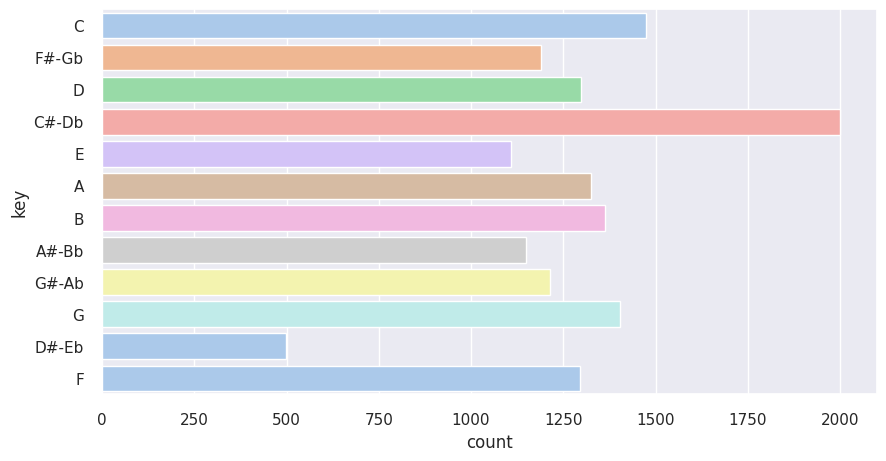

In [ ]:
# Tần suất xuất hiện của các nốt
data = data2['key'].copy()
unique_decades = sorted(song_full['decade'].unique(), reverse=True)

sns.set(rc={'figure.figsize':(10 ,5)})
palette = sns.color_palette("pastel", len(unique_decades))
sns.countplot(data=data,palette=palette)
plt.show()

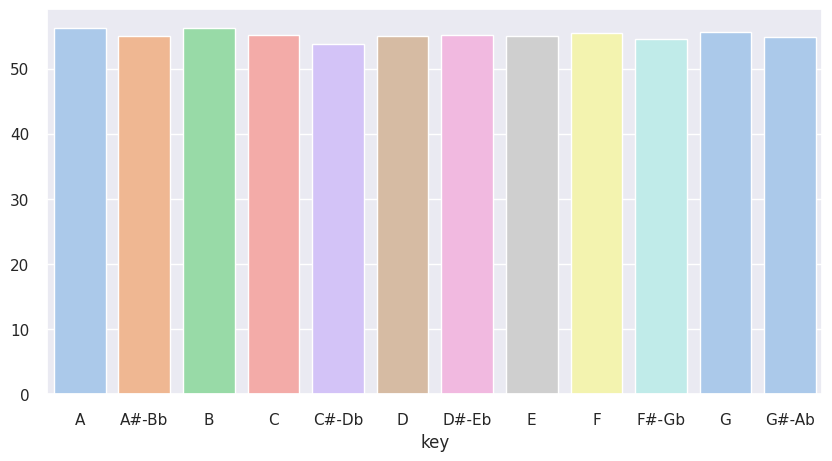

In [ ]:
data = data2.copy()
data['popularity'] = data['popularity'].astype('float64')

key_popularity = data.groupby(by='key')['popularity'].mean()

sns.set(rc={'figure.figsize':(10 ,5)})
palette = sns.color_palette("pastel", len(unique_decades))
sns.barplot(x=key_popularity.index, y=key_popularity.values,palette=palette)
plt.show()

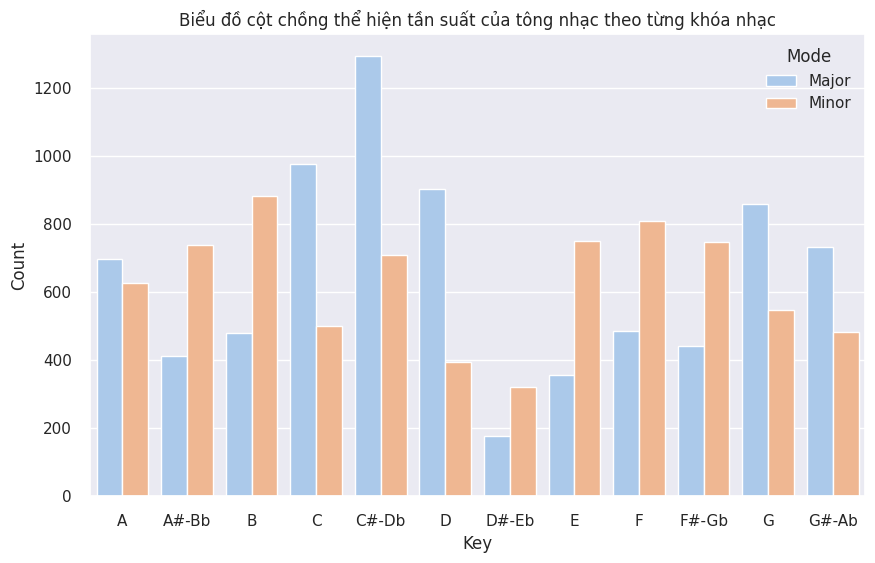

In [ ]:
def visualize_tone_sns(df: pd.DataFrame):
    # Loại bỏ các bản trùng lặp
    df_new = df.drop_duplicates(subset=['spotify_id'])
    # Đếm tần suất cho từng cặp key và mode
    df_new = df_new.groupby(['key', 'mode']).size().reset_index(name='Frequency')

    # Tạo cột 'Mode_Label' để hiển thị tên Major và Minor
    df_new['Mode_Label'] = df_new['mode']

    # Biểu đồ cột chồng
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='key',
        y='Frequency',
        hue='Mode_Label',
        data=df_new,
        palette=palette
    )

    # Tùy chỉnh biểu đồ
    plt.title("Biểu đồ cột chồng thể hiện tần suất của tông nhạc theo từng khóa nhạc")
    plt.xlabel("Key")
    plt.ylabel("Count")
    plt.legend(title='Mode', loc='upper right')
    plt.show()

# Gọi hàm với dataframe song_full
visualize_tone_sns(data2)

In [ ]:
song_full_without_null = song_full.copy()
song_full_without_null['genres'] = song_full_without_null['genres'].apply(lambda x: x if isinstance(x, list) else [])

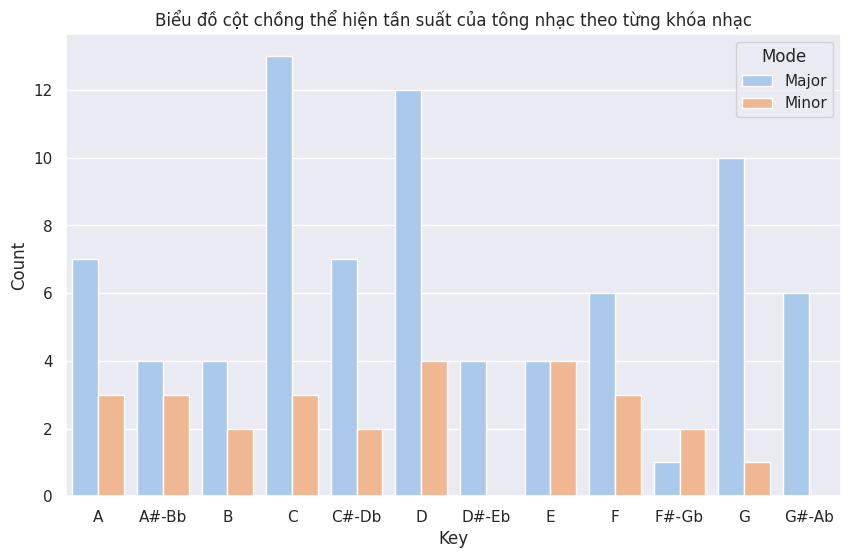

In [ ]:
temp2 = song_full_without_null.copy()
temp2 = temp2[temp2['decade'] <= '1970s']
visualize_tone_sns(temp2)

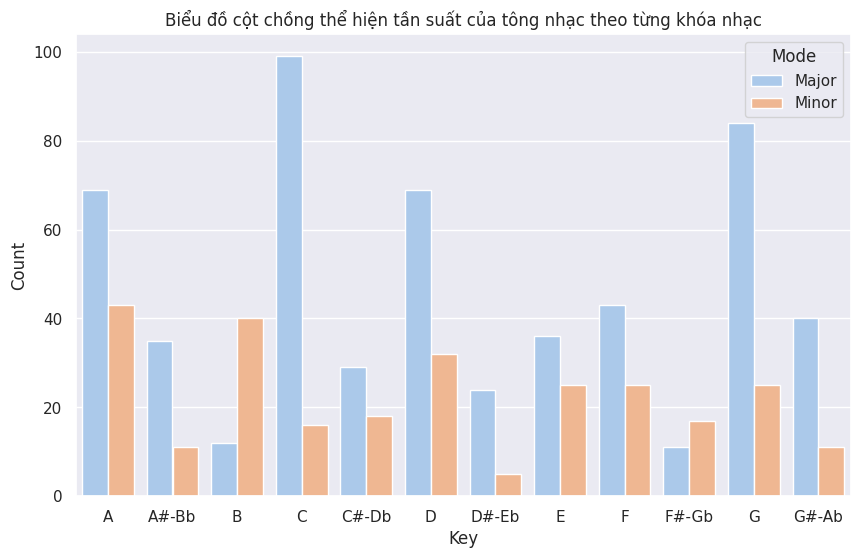

In [ ]:
temp4 = song_full_without_null.copy()
temp4 = temp4[(temp4['decade'] > '1970s')& (temp4['decade'] <= '2000s')]
visualize_tone_sns(temp4)

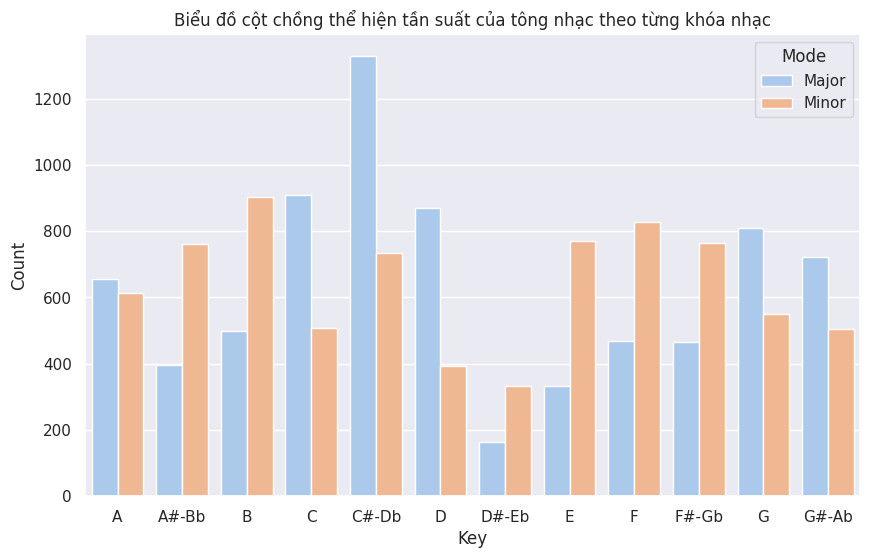

In [ ]:
temp4 = song_full_without_null.copy()
temp4 = temp4[(temp4['decade'] > '2000s')]
visualize_tone_sns(temp4)

In [ ]:
def find_genre(genres, genres_find):
    if genres == []:
        return False
    for genre in genres:
        for genre_find in genres_find:
            if genre_find.lower() in str(genre).lower():
                return True
    return False

In [ ]:
def find_happy(genres):
  if genres == []:
    return False
  for genre in genres:
    if 'k-pop' in str(genre).lower():
      return True
    else:
      return False

In [ ]:
temp = song_full_without_null.copy()
genres_find = ['jazz','classical','country','indie rock', 'ballad', 'r&b']
temp = temp[temp['genres'].apply(find_genre, genres_find=genres_find)]

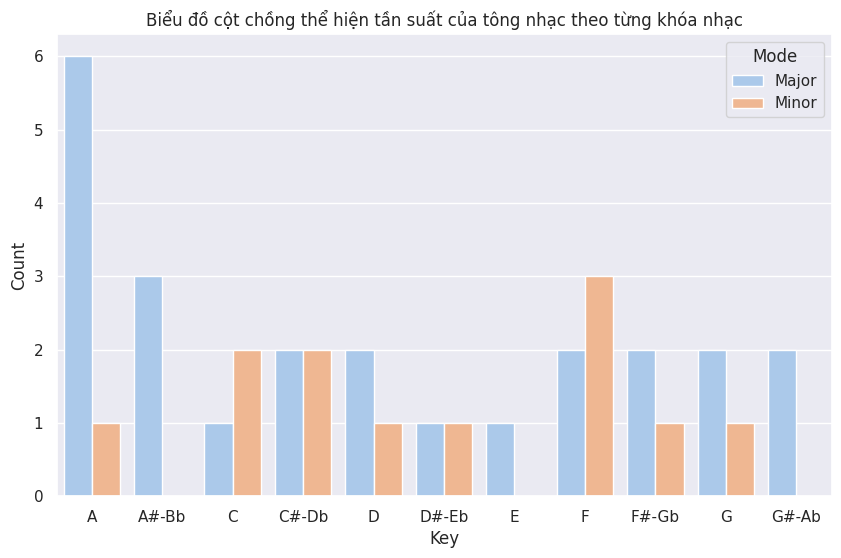

In [ ]:
visualize_tone_sns(temp)

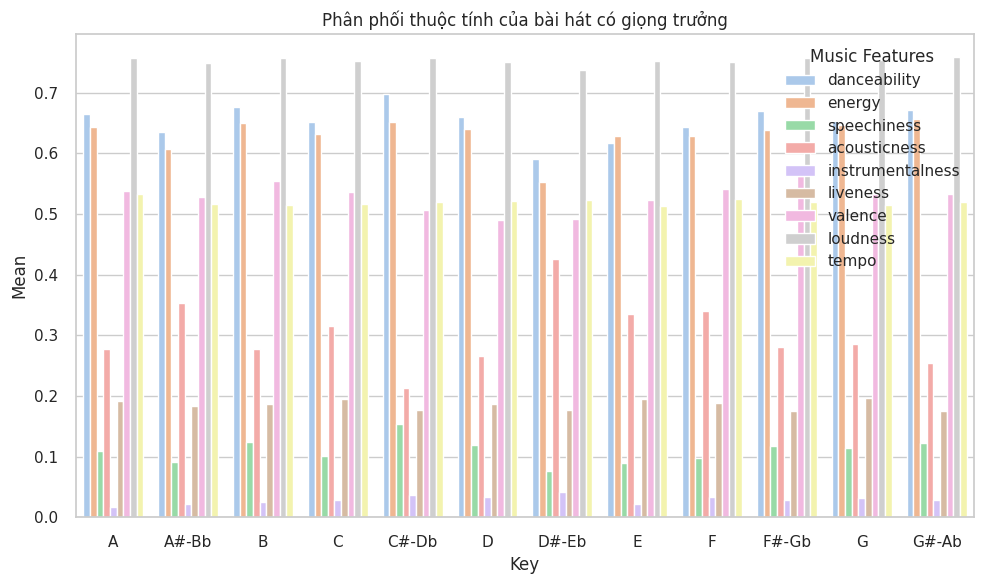

In [ ]:
# Phân phối tone nhạc của các bài hát lọt vào bảng xếp hạng
def visualize_tone(df: pd.DataFrame, mode='Major'):
    df_new = df.drop_duplicates(subset=['spotify_id']).reset_index(drop=True)

    minmax_scaler = MinMaxScaler()

    minmax_features = ['loudness', 'tempo']
    df_new[minmax_features] = minmax_scaler.fit_transform(df_new[minmax_features])

    music_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo']
    key_attributes = df_new[df_new['mode'] == mode].groupby('key')[music_features].mean().reset_index()

    # Melt the DataFrame for Seaborn plotting
    key_attributes_melted = key_attributes.melt(id_vars='key', value_vars=music_features,
                                                var_name='Feature', value_name='Mean')

    # Set Seaborn style and pastel palette
    sns.set(style="whitegrid")

    # Create the bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(data=key_attributes_melted, x='key', y='Mean', hue='Feature', palette='pastel')

    # Add labels and title
    plt.xlabel('Key')
    plt.ylabel('Mean')
    if mode == 'Major':
        m = 'trưởng'
    else:
        m = 'thứ'
    plt.title(f'Phân phối thuộc tính của bài hát có giọng {m}')

    # Show legend and plot
    plt.legend(title='Music Features', loc='upper right')
    plt.tight_layout()
    plt.show()

visualize_tone(data2.copy())

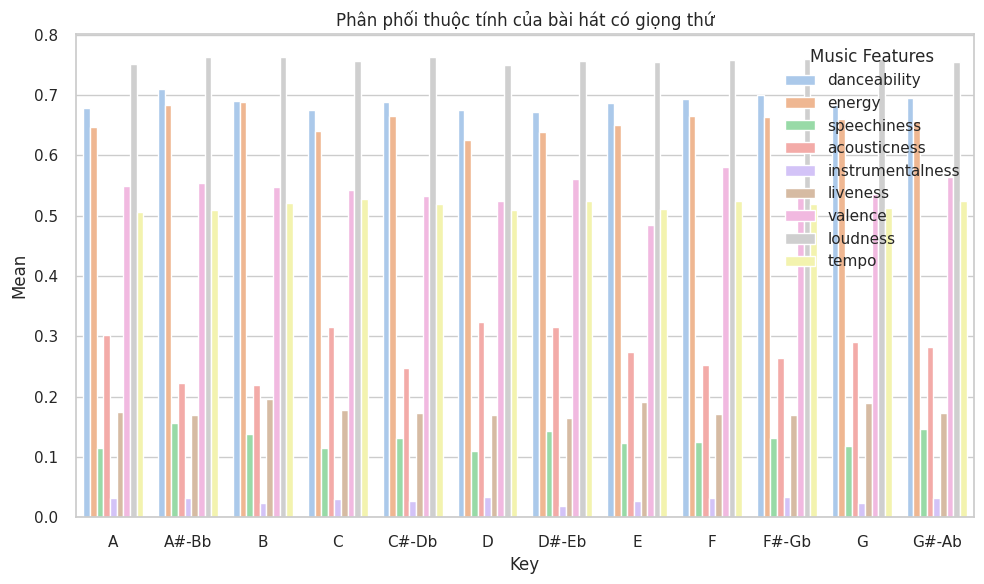

In [ ]:
visualize_tone(data2.copy(), 'Minor')

#### *Aspect 3: Artists*

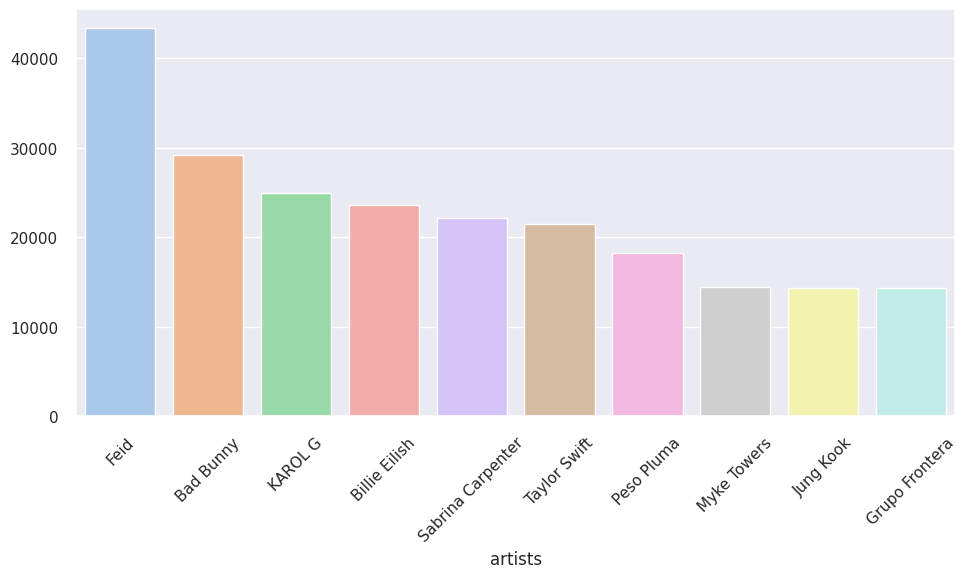

In [ ]:
# Top 10 ca sĩ có số lần có bài hát lọt top nhất
data_cols = ['name', 'artists', 'country', 'snapshot_date']
data = song_full[data_cols]
data = data.explode('artists').drop_duplicates(subset=data_cols).reset_index(drop=True)

top10_count = data['artists'].value_counts().head(10)
sns.set(rc={'figure.figsize':(10 ,5)})
palette = sns.color_palette("pastel")
sns.barplot(x=top10_count.index, y=top10_count.values,palette=palette)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

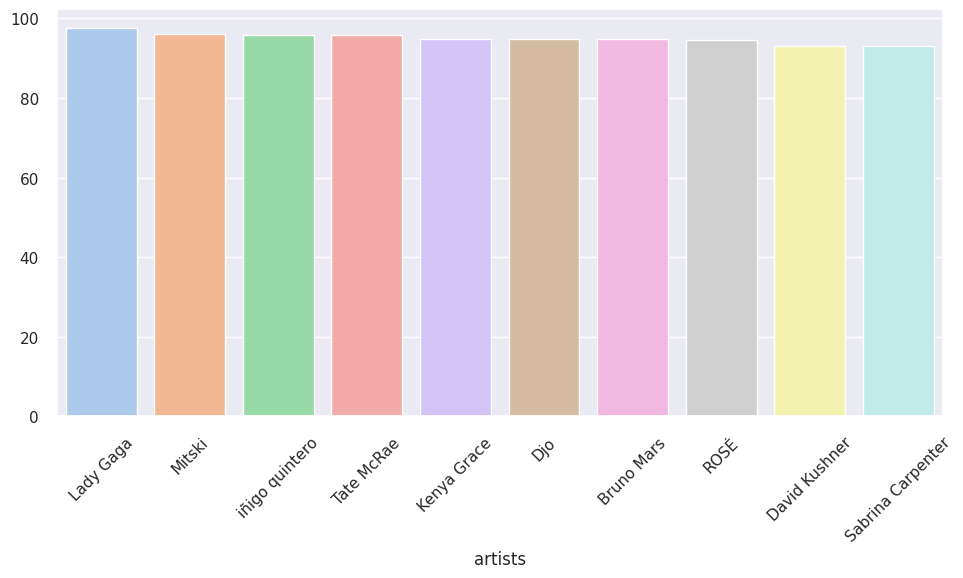

In [ ]:
# Top 10 ca sĩ có mean popularity của các bài hát lọt top cao nhất
data_cols = ['name', 'artists','popularity','country','snapshot_date']
data = song_full[data_cols]
data = data.explode('artists').drop_duplicates().reset_index(drop=True)

data['popularity'] = data['popularity'].astype('float64')
artists_popularity_mean = data.groupby(by='artists')['popularity'].mean()

data['popularity'] = data['popularity'].astype('float64')

artists_popularity_mean = data.groupby(by='artists')['popularity'].mean()
artists_popularity_mean_top10 = artists_popularity_mean.sort_values(ascending=False)[:10]
sns.set(rc={'figure.figsize':(10 ,5)})
palette = sns.color_palette("pastel")
sns.barplot(x=artists_popularity_mean_top10.index, y=artists_popularity_mean_top10.values,palette=palette)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

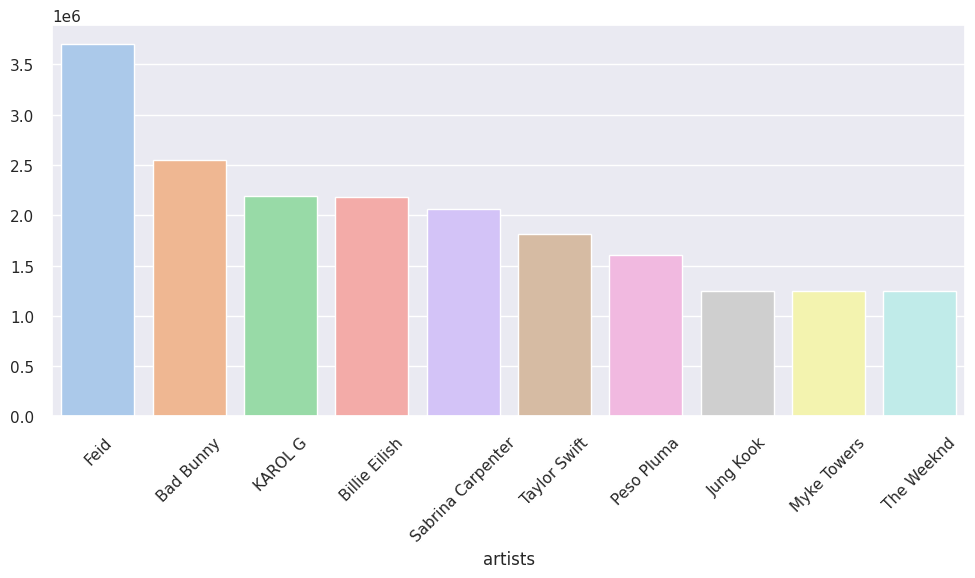

In [ ]:
# Top 10 ca sĩ có sum popularity của các bài hát lọt top cao nhất
data_cols = ['name', 'artists','popularity','country', 'snapshot_date']
data = song_full[data_cols]
data = data.explode('artists').drop_duplicates().reset_index(drop=True)

data['popularity'] = data['popularity'].astype('float64')

artists_popularity_mean = data.groupby(by='artists')['popularity'].sum()
artists_popularity_mean_top10 = artists_popularity_mean.sort_values(ascending=False)[:10]
sns.set(rc={'figure.figsize':(10 ,5)})
palette = sns.color_palette("pastel")
sns.barplot(x=artists_popularity_mean_top10.index, y=artists_popularity_mean_top10.values,palette=palette)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

##### Kết luận
1.  các ca sĩ này hầu hết có thể loại chủ đạo là pop và mang màu sắc sôi động, trẻ trung.

In [ ]:
def find_collaborators(df: pd.DataFrame, artist: str):
    collaborators = set()
    for artists in df['artists']:
        if artist in artists:
            collaborators.update(artists)
            collaborators.remove(artist)
    return list(collaborators)

    df_new = df[['spotify_id', 'name', 'artists', 'country']].drop_duplicates(subset=['name'])
    df_new['artists'] = df_new['artists'].apply(lambda x: x.split(", "))
    collaborators = set()
    for artists in df_new['artists'].values:
        if artist in artists:
            collaborators.update(artists)
            collaborators.remove(artist)
    return list(collaborators)


def network_top_artist_frequency(df: pd.DataFrame, top: int = 10):
    fig = go.Figure()

    feature_cols = ['name', 'artists', 'snapshot_date', 'country']
    df_new = df.explode('artists').drop_duplicates(feature_cols).reset_index(drop=True)
    top_artists = df_new['artists'].value_counts().head(top).reset_index()
    top_artists['collaborators'] = top_artists['artists'].apply(lambda x: find_collaborators(df, x))

    G_weight = nx.Graph()

    for _, row in top_artists.iterrows():
        artist = row.loc['artists']
        collaborators = row.loc['collaborators']
        if collaborators == []:
            continue
        for i in range(len(collaborators)):
            if G_weight.has_edge(artist, collaborators[i]):
                G_weight[artist][collaborators[i]]['weight'] += 1
            else:
                G_weight.add_edge(artist, collaborators[i], weight = 1)

    pos = nx.spring_layout(G_weight, k=2)

    # Tạo danh sách x, y của các edges
    edge_x, edge_y = [], []
    for edge in G_weight.edges(data=True):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]


    # Tạo edges
    edges_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        line=dict(width=0.5, color='lightgray'),
        mode='lines',
        visible=True
    )

    # Tạo danh sách x, y của các nodes -> scatter
    node_x, node_y, node_size, node_color, node_text = [], [], [], [], []
    for node in G_weight.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

        node_size.append(len(G_weight.adj[node]) * 5)
        if node in top_artists['artists'].values:
            node_color.append("red")
            node_text.append(f"Top artist: {node}, Degree: {len(G_weight.adj[node])}")
        else:
            node_color.append("blue")
            node_text.append(f"Artist: {node}, Degree: {len(G_weight.adj[node])}")

    # Tạo nodes
    nodes_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers',
        hoverinfo="text",
        text=node_text,
        marker=dict(
            size=node_size,
            color=node_color,
            line_width=2
        ),
        visible=True
    )

    fig.add_trace(nodes_trace)
    fig.add_trace(edges_trace)

    fig.update_layout(
        height=600,
        width=1000,
        title='Collaborators of Top 10 Famous Artists',
        showlegend=False,
        hovermode="closest",
        margin=dict(b=0, l=0, r=0, t=40),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
    fig.show()

network_top_artist_frequency(song_full)

##### Kết luận
1. Một số ca sĩ nổi tiếng như Taylor Swift và Billie Eilish ít kết hợp với các ca sĩ khác trong các bản nhạc. Sabrina Carpenter theo trường phái solo sáng tác các bài hát thịnh hành.

#### *Aspect 4: Songs*

In [ ]:
top20_popularity = (
    song_full_without_null.sort_values(by='popularity', ascending=False)
    .drop_duplicates(subset=['name'])
    .loc[:, ['name', 'year', 'popularity', 'decade', 'genres']]
    .head(20)
)

In [ ]:
top20_popularity['name+genres'] = top20_popularity.apply(
    lambda row: row['name'] + ' ' + str(row['genres']),
    axis=1
)

In [ ]:
top20_popularity

name  year  popularity decade  \
690440                          Espresso  2024         100  2020s   
1257024                           greedy  2023         100  2020s   
943646                  Beautiful Things  2024         100  2020s   
116752                  Die With A Smile  2024         100  2020s   
1402633                     Cruel Summer  2019         100  2010s   
1220747  All I Want for Christmas Is You  1994         100  1990s   
748573        i like the way you kiss me  2024         100  2020s   
635202                        love hotel  2024         100  2020s   
796675                  End of Beginning  2022         100  2020s   
301672                BIRDS OF A FEATHER  2024         100  2020s   
1135394                      Lovin On Me  2023          99  2020s   
1129593            My Love Mine All Mine  2023          99  2020s   
1317036                      Si No Estás  2022          99  2020s   
1063217                        La Diabla  2023          99  2020s   
649320               MILLION DOLLAR BABY  2024          99  2020s   
469020              Please Please Please  2024          99  2020s   
44820                               APT.  2024          98  2020s   
1015573                     Stick Season  2022          98  2020s   
1088768                 One Of The Girls  2023          98  2020s   
669712                       Not Like Us  2024          98  2020s   

                                                    genres  \
690440                                               [pop]   
1257024                                              [pop]   
943646                                                  []   
116752                           [art pop, dance pop, pop]   
1402633                                              [pop]   
1220747               [dance pop, pop, urban contemporary]   
748573                                                  []   
635202                                                  []   
796675                       [pov: indie, psychedelic pop]   
301672                                      [art pop, pop]   
1135394  [deep underground hip hop, kentucky hip hop, r...   
1129593                       [brooklyn indie, pov: indie]   
1317036                                                 []   
1063217                                     [sad sierreno]   
649320                                                  []   
469020                                               [pop]   
44820                              [dance pop, pop, k-pop]   
1015573                [singer-songwriter pop, pov: indie]   
1088768  [canadian contemporary r&b, canadian pop, k-po...   
669712   [conscious hip hop, west coast rap, rap, hip hop]   

                                               name+genres  
690440                                    Espresso ['pop']  
1257024                                     greedy ['pop']  
943646                                 Beautiful Things []  
116752    Die With A Smile ['art pop', 'dance pop', 'pop']  
1402633                               Cruel Summer ['pop']  
1220747  All I Want for Christmas Is You ['dance pop', ...  
748573                       i like the way you kiss me []  
635202                                       love hotel []  
796675   End of Beginning ['pov: indie', 'psychedelic p...  
301672               BIRDS OF A FEATHER ['art pop', 'pop']  
1135394  Lovin On Me ['deep underground hip hop', 'kent...  
1129593  My Love Mine All Mine ['brooklyn indie', 'pov:...  
1317036                                     Si No Estás []  
1063217                         La Diabla ['sad sierreno']  
649320                              MILLION DOLLAR BABY []  
469020                        Please Please Please ['pop']  
44820                   APT. ['dance pop', 'pop', 'k-pop']  
1015573  Stick Season ['singer-songwriter pop', 'pov: i...  
1088768  One Of The Girls ['canadian contemporary r&b',...  
669712   Not Like Us ['conscious hip hop', 'west coast ...

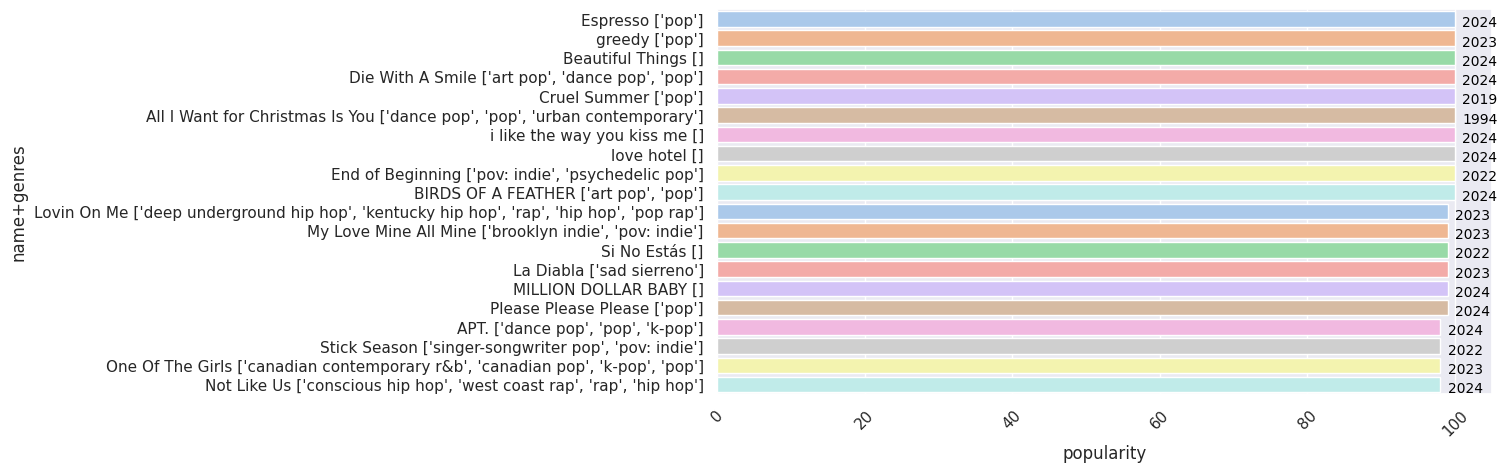

In [ ]:
sns.set(rc={'figure.figsize':(10 ,5)})
palette = sns.color_palette("pastel")
ax = sns.barplot(y=top20_popularity['name+genres'], x=top20_popularity['popularity'], palette=palette)

# for i, bar in enumerate(ax.patches):
#     x = bar.get_x() + bar.get_width() / 2
#     y = bar.get_height()
#     year = top20_popularity['year'].iloc[i]
#     ax.text(x, y + 1, str(year), ha='center', fontsize=10, color='black')

for i, bar in enumerate(ax.patches):
    x = bar.get_width() + 1
    y = bar.get_y() + bar.get_height()
    year = top20_popularity['year'].iloc[i]
    ax.text(x, y, str(year), ha='left', fontsize=10, color='black')

plt.xticks(rotation = 45)
plt.show()

##### Kết luận
1. Hầu hết các bài hát được chia sẻ nhiều nhất (popularity cao nhất) đều là những bài hát được sáng tác trong những năm gần đây và hầu hết đều có yếu tố nhạc pop, hip hop -> nhạc pop, hip hop là xu hướng của thời điểm hiện tại.

In [ ]:
song_full_before_2010s = song_full_without_null[song_full['decade'] < '2010s']
top20_popularity_before_2010s = (
    song_full_before_2010s.sort_values(by='popularity', ascending=False)
    .drop_duplicates(subset=['name'])
    .loc[:, ['name', 'year', 'popularity', 'decade', 'genres']]
    .head(20)
)
top20_popularity_before_2010s

name  year  popularity decade  \
1205444         All I Want for Christmas Is You  1994         100  1990s   
1204224       Rockin' Around The Christmas Tree  1964          98  1960s   
1217957  Let It Snow! Let It Snow! Let It Snow!  1959          95  1950s   
976557                                Unwritten  2004          95  2000s   
1237457                        Jingle Bell Rock  1957          94  1950s   
980873                 Murder On The Dancefloor  2002          94  2000s   
980727                                   Yellow  2000          94  2000s   
997816                                Heartless  2008          91  2000s   
278402                              Bye Bye Bye  2000          91  2000s   
1074064                             Mockingbird  2004          91  2000s   
999122                          Flashing Lights  2007          91  2000s   
984123              Have You Ever Seen The Rain  1970          91  1970s   
1048117                   Every Breath You Take  1983          91  1980s   
1240900                 A Holly Jolly Christmas  1965          91  1960s   
1210765                 Wonderful Christmastime  1980          91  1980s   
1210764                Merry Christmas Everyone  1991          91  1990s   
1231678                              Without Me  2002          91  2000s   
987194                             Viva La Vida  2008          90  2000s   
981378                           Mr. Brightside  2004          90  2000s   
1216184                         White Christmas  1942          90  1940s   

                                                    genres  
1205444               [dance pop, pop, urban contemporary]  
1204224  [lounge, easy listening, adult standards, rock...  
1217957  [lounge, easy listening, adult standards, voca...  
976557                     [dance pop, pop, post-teen pop]  
1237457                                                 []  
980873                  [dance pop, new wave pop, europop]  
980727                               [pop, permanent wave]  
997816                         [chicago rap, rap, hip hop]  
278402                          [dance pop, boy band, pop]  
1074064                    [rap, detroit hip hop, hip hop]  
999122               [chicago rap, neo soul, rap, hip hop]  
984123   [southern rock, rock, classic rock, swamp rock...  
1048117   [permanent wave, rock, album rock, classic rock]  
1240900           [american folk revival, adult standards]  
1210765       [soft rock, rock, mellow gold, classic rock]  
1210764                       [classic uk pop, rockabilly]  
1231678                    [rap, detroit hip hop, hip hop]  
987194                               [pop, permanent wave]  
981378   [permanent wave, rock, dance rock, modern rock...  
1216184  [adult standards, swing, lounge, easy listenin...

In [ ]:
top20_popularity_before_2010s['name+genres'] = top20_popularity_before_2010s.apply(
    lambda row: row['name'] + ' ' + str(row['genres']),
    axis=1
)

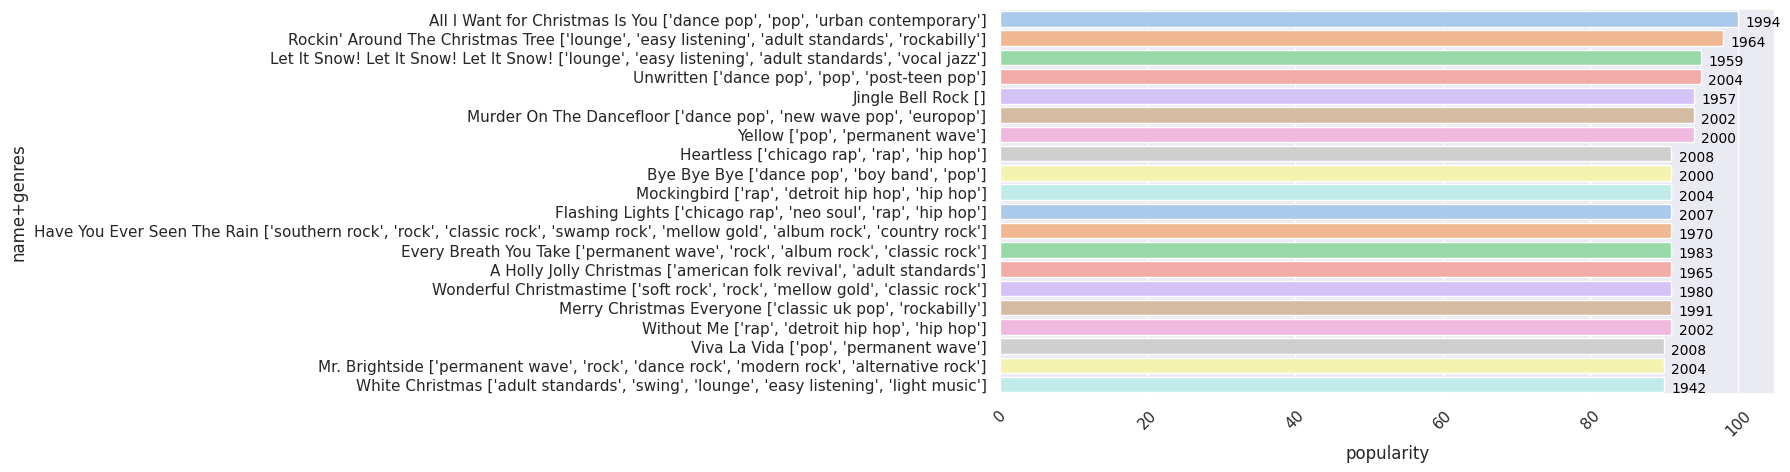

In [ ]:
sns.set(rc={'figure.figsize':(10 ,5)})
palette = sns.color_palette("pastel")
ax = sns.barplot(y=top20_popularity_before_2010s['name+genres'], x=top20_popularity_before_2010s['popularity'], palette=palette)

for i, bar in enumerate(ax.patches):
    x = bar.get_width() + 1
    y = bar.get_y() + bar.get_height()
    year = top20_popularity_before_2010s['year'].iloc[i]
    ax.text(x, y, str(year), ha='left', fontsize=10, color='black')

plt.xticks(rotation = 45)
plt.show()

##### Kết luận
1. Một điều đặc biệt khi chỉ xét các bài hát < 2010s, các bài hát được chia sẻ nhiều nhất không phải các bài hát mới nhất tại thời điểm đó mà là các bài hát gần năm 2000 và các bài hát cũ.
2. khi chỉ xét các bài hát < 2010s, hầu hết các bài hát được chia sẻ nhiều nhất liên quan đến chủ đề Giáng sinh -> Trong bất kì giai đoạn nào, các bài hát viết về chủ đề Giáng sinh luôn được ưa chuộng.

In [ ]:
# Top 20 bài hát có thời lượng dài nhất
top20_duration = (
    song_full_without_null.sort_values(by='duration', ascending=False)
    .drop_duplicates(subset=['name'])
    .loc[:, ['name', 'year', 'duration', 'decade', 'genres'] + sound_features +['key','mode']]
    .head(20)
)

In [ ]:
top20_duration

name  year  duration decade  \
1211416          Flamazo Navideño:  1990     15.66  1990s   
893163            מחרוזת פורים שמח  2020     15.56  2020s   
587784                 Kabza Chant  2024     15.53  2020s   
1047735                      Jesús  2024     13.69  2020s   
350268               Noite Carioca  2024     13.50  2020s   
786167         Worthy of My Praise  2024     13.48  2020s   
1267497                   Tintsumi  2023     12.65  2020s   
397719          Poesia Acústica 16  2024     12.63  2020s   
328844             Asikho Isikhali  2024     12.42  2020s   
877921                      Mesias  2024     12.39  2020s   
799576      Diz Aí Qual é o Plano?  2024     11.72  2020s   
337443                      Omemma  2024     11.42  2020s   
1115179         Poesia Acústica 15  2023     11.35  2020s   
567417   R. Paula Dziesmu Popūrijs  1996     11.09  1990s   
1126109                 Let's Go 4  2023     10.70  2020s   
590111                     MIXTAPE  2024     10.53  2020s   
394493                      Umdali  2024     10.35  2020s   
884780                      Tajdar  2015     10.28  2010s   
997144                Ritmista 1.0  2023     10.26  2020s   
965308                All Too Well  2021     10.22  2020s   

                                                    genres  acousticness  \
1211416           [cumbia salvadorena, cumbia del sureste]      0.289000   
893163                                        [jewish pop]      0.018200   
587784   [amapiano, afro soul, south african pop, south...      0.131000   
1047735                                    [latin worship]      0.000145   
350268   [trap brasileiro, funk ostentacao, funk rj, fu...      0.203000   
786167                                     [naija worship]      0.004320   
1267497                                  [amapiano, filmi]      0.009630   
397719   [agronejo, trap brasileiro, trap baiano, serta...      0.151000   
328844                              [south african gospel]      0.489000   
877921                                   [latin christian]      0.274000   
799576   [trap brasileiro, funk carioca, funk paulista,...      0.348000   
337443                                           [worship]      0.035900   
1115179  [rap pernambucano, trap brasileiro, trap baian...      0.457000   
567417                  [classic latvian pop, latvian pop]      0.012700   
1126109  [batidao romantico, funk carioca, funk paulist...      0.123000   
590111   [greek trap, greek swing, greek drill, laiko, ...      0.122000   
394493   [afro soul, south african pop, amapiano, south...      0.474000   
884780   [filmi, sufi, classic pakistani pop, modern bo...      0.236000   
997144   [trap brasileiro, funk carioca, funk paulista,...      0.607000   
965308                                               [pop]      0.274000   

         liveness  instrumentalness  energy  danceability  valence    key  \
1211416    0.7830          0.000000   0.556         0.622    0.947      G   
893163     0.0885          0.000000   0.908         0.447    0.602      D   
587784     0.0701          0.000009   0.471         0.642    0.635      F   
1047735    0.0963          0.006020   0.815         0.217    0.149  F#-Gb   
350268     0.3220          0.000000   0.657         0.522    0.516      A   
786167     0.6170          0.001740   0.820         0.422    0.331  A#-Bb   
1267497    0.0743          0.876000   0.436         0.784    0.311      F   
397719     0.1690          0.674000   0.319         0.806    0.188  A#-Bb   
328844     0.3680          0.000000   0.545         0.288    0.271  F#-Gb   
877921     0.0768          0.000002   0.583         0.389    0.226  F#-Gb   
799576     0.0775          0.000000   0.581         0.590    0.580      E   
337443     0.3210          0.000010   0.842         0.523    0.572  G#-Ab   
1115179    0.1260          0.000000   0.709         0.667    0.435      F   
567417     0.0720          0.000013   0.631         0.731    0.739      D

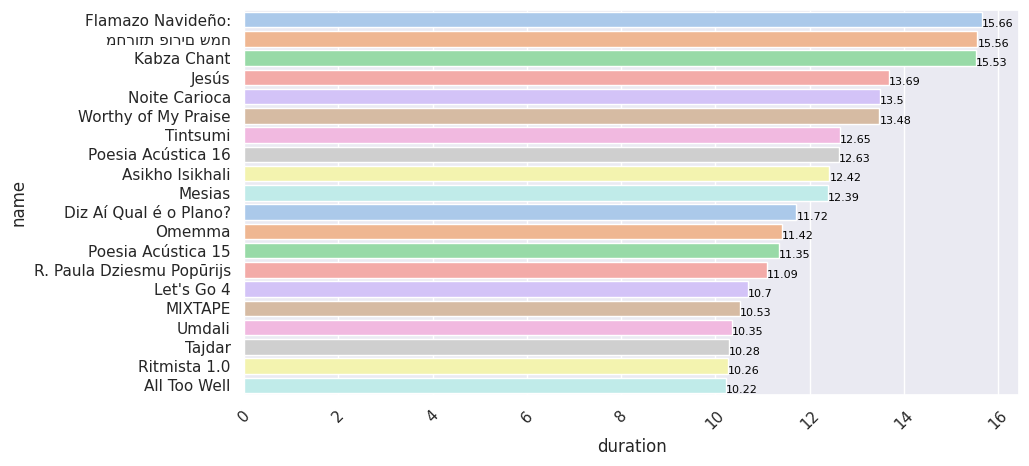

In [ ]:
sns.set(rc={'figure.figsize':(10 ,5)})
palette = sns.color_palette("pastel")
ax = sns.barplot(y=top20_duration['name'], x=top20_duration['duration'], palette=palette)

for i, bar in enumerate(ax.patches):
    x = bar.get_width()
    y = bar.get_y() + bar.get_height()
    duration = top20_duration['duration'].iloc[i]
    ax.text(x, y, str(duration), ha='left', fontsize=8, color='black')

plt.xticks(rotation = 45)
plt.show()

##### Kết luận
1. Các bài hát có thời lượng dài thường là các bài hát không lời và các bài hát có màu sắc tươi mới, vui vẻ giúp người nghe thư giản.


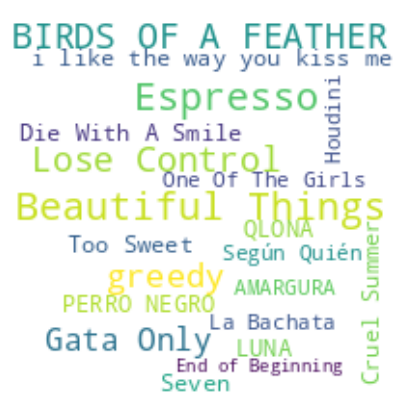

In [ ]:
# Top 20 bài hát lọt vào bảng xếp hạng nhiều nhất
def visualize_wordcloud(df: pd.DataFrame, top: int = 20):
    feature_cols = ['name', 'artists', 'country', 'snapshot_date']
    df_new = df.drop_duplicates(feature_cols)['name'].value_counts().head(top)
    wordcloud = WordCloud(max_words=1000, width=200, height=200, background_color='white',
                          contour_width=3, contour_color='turquoise').generate_from_frequencies(df_new)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

visualize_wordcloud(song_full)

# **MODELLING**

## *Statistics*

In [ ]:
cols = ['name','artists','is_explicit','key','time_signature','mode','duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

In [ ]:
df = song_full.copy()
df = df.drop_duplicates(subset=['name', 'spotify_id'])

In [ ]:
is_explicit_mapping = {
    False:0,
     True:1
    }
df['is_explicit'] = df['is_explicit'].map(is_explicit_mapping)

In [ ]:
key_mapping  = {
    'C':0,
    'C#-Db':1,
    'D':2,
    'D#-Eb':3,
    'E':4,
    'F':5,
    'F#-Gb':6,
    'G':7,
    'G#-Ab':8,
    'A':9,
    'A#-Bb':10,
    'B':11
}

df['key'] = df['key'].map(key_mapping)

In [ ]:
mode_mapping = {
    'Minor':0,
    'Major':1
}

df['mode'] = df['mode'].map(mode_mapping)

### Correlation

##### Tương quan giữa các biến

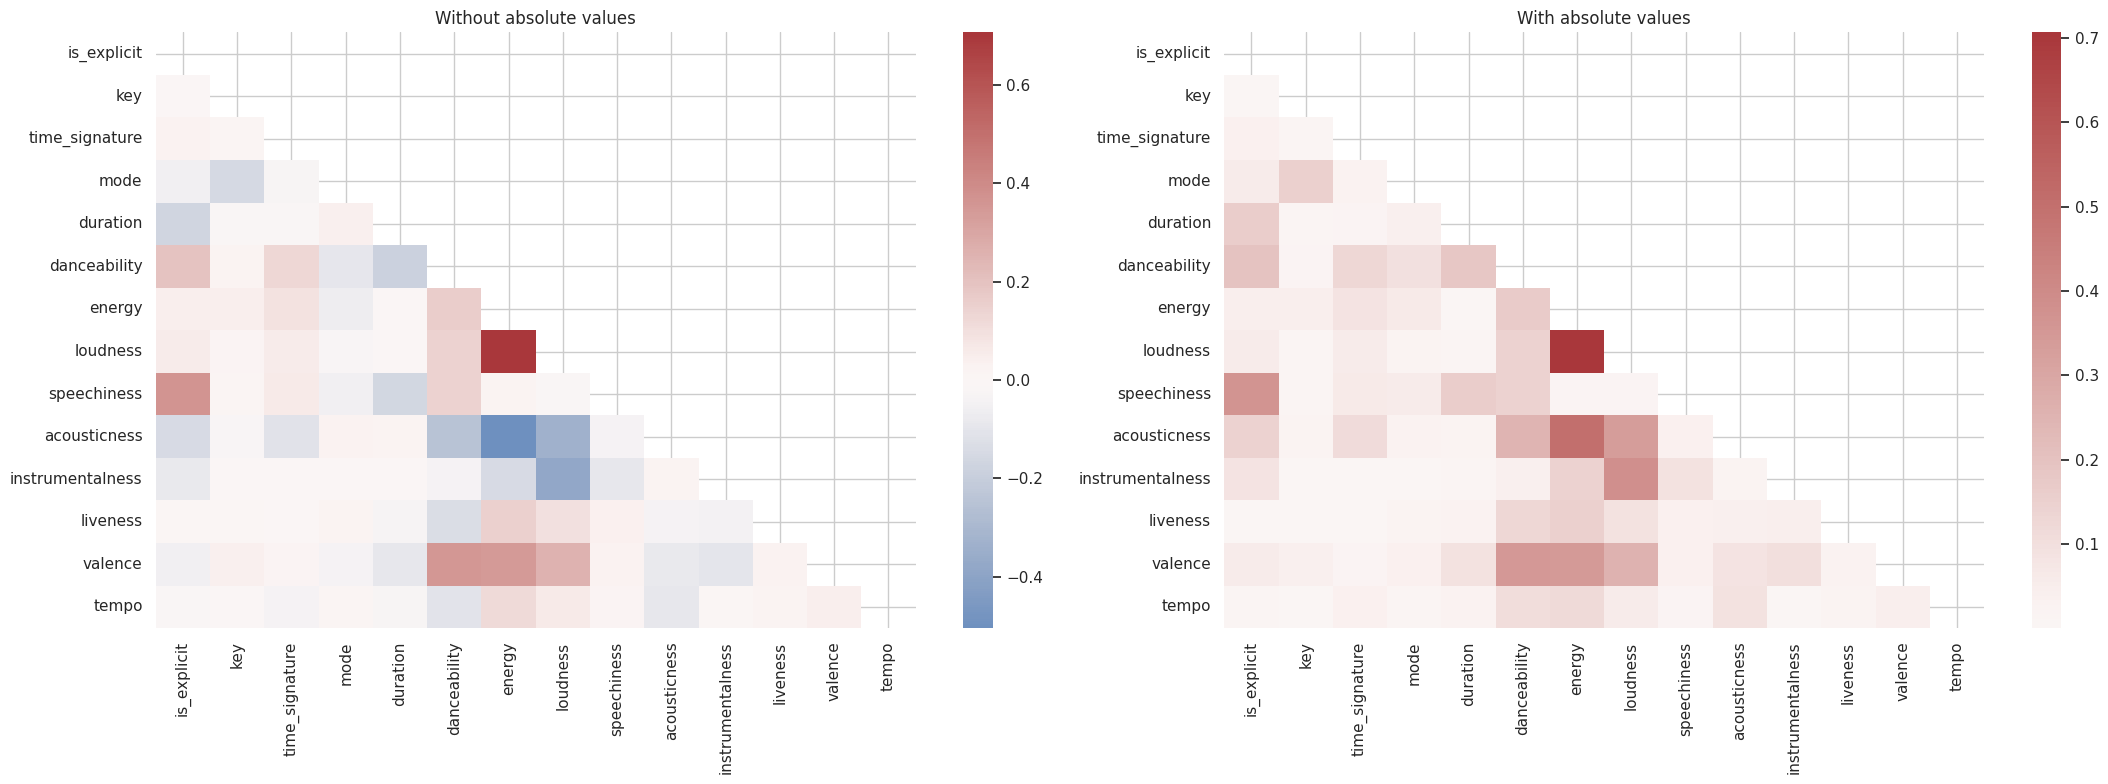

In [ ]:
corr = df[cols[2:]].corr(method='pearson')
matrix = np.triu(corr)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))

sns.heatmap(corr, mask=matrix, center = 0, cmap = 'vlag', ax = axes[0]).set_title('Without absolute values')
sns.heatmap(abs(corr), mask=matrix, center = 0, cmap = 'vlag', ax = axes[1]).set_title('With absolute values')

fig.tight_layout(h_pad=1.0, w_pad=0.5)

##### Loudness Vs Energy

<Axes: xlabel='energy', ylabel='loudness'>

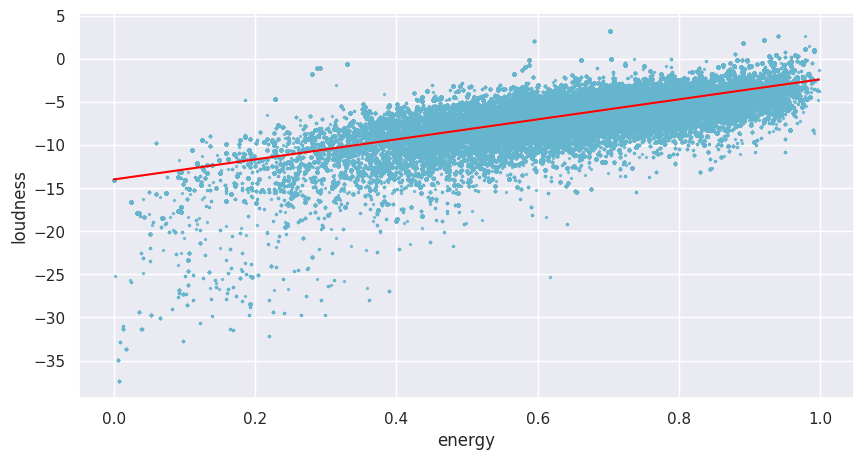

In [ ]:
sns.regplot(x=song_full['energy'], y=song_full['loudness'],
            scatter_kws={"color": "c", 's':2},
            line_kws={"color": "red", 'linewidth':1.5}
            )

<Axes: xlabel='energy', ylabel='loudness'>

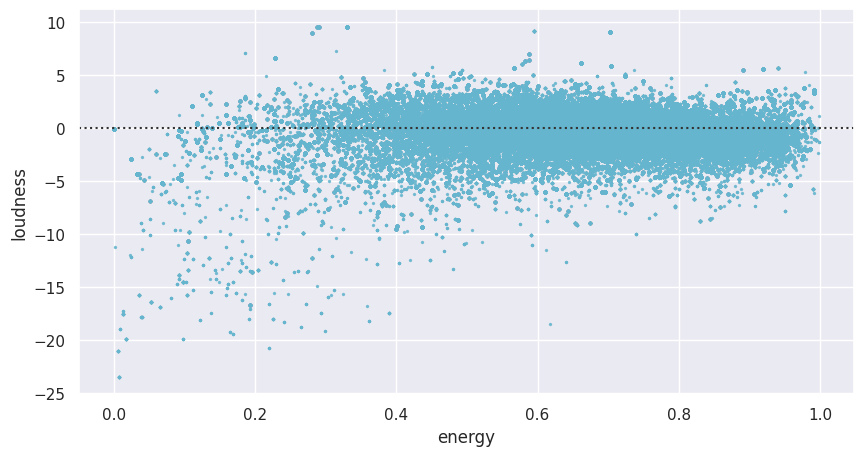

In [ ]:
sns.residplot(x=song_full['energy'], y=song_full['loudness'],
            scatter_kws={"color": "c", 's':2},
            line_kws={"color": "red", 'linewidth':1.5}
              )

##### Acousticness Vs Energy

<Axes: xlabel='acousticness', ylabel='energy'>

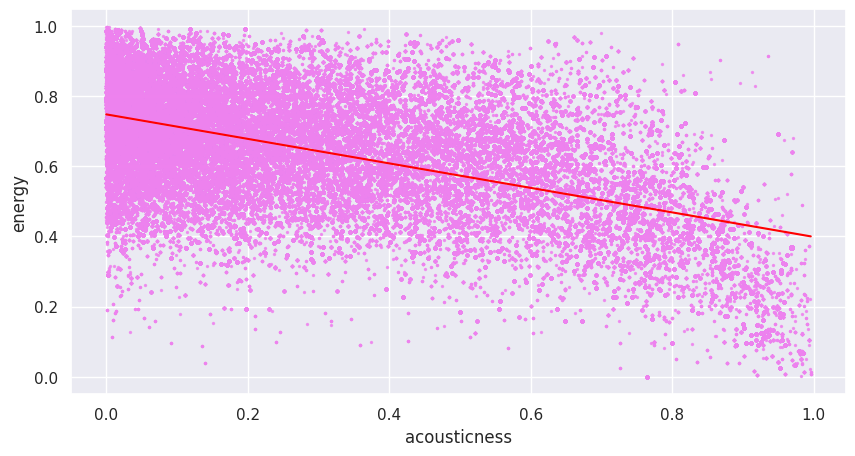

In [ ]:
sns.regplot(x=song_full['acousticness'], y=song_full['energy'],
            scatter_kws={"color": "violet", 's':2},
            line_kws={"color": "red", 'linewidth':1.5}
            )

<Axes: xlabel='acousticness', ylabel='energy'>

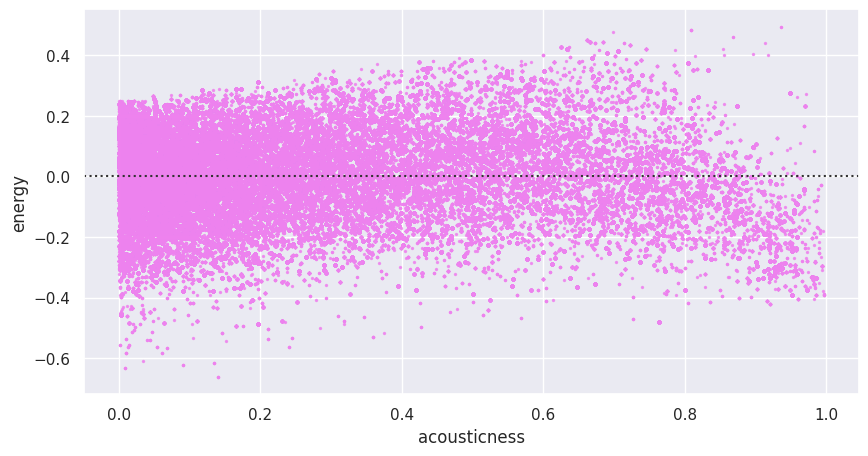

In [ ]:
sns.residplot(x=song_full['acousticness'], y=song_full['energy'],
            scatter_kws={"color": "violet", 's':2},
            line_kws={"color": "red", 'linewidth':1.5}
              )

##### Loudness Vs Acousticness

<Axes: xlabel='acousticness', ylabel='loudness'>

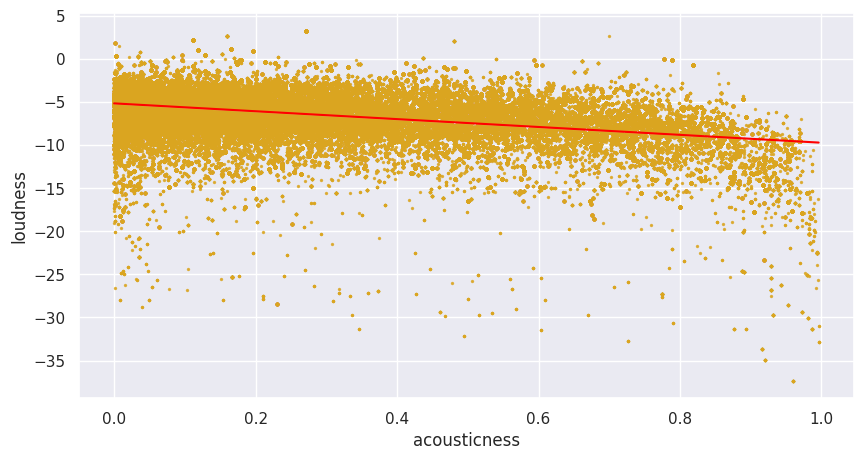

In [ ]:
sns.regplot(x=song_full['acousticness'], y=song_full['loudness'],
            scatter_kws={"color": "goldenrod", 's':2},
            line_kws={"color": "red", 'linewidth':1.5}
            )

<Axes: xlabel='acousticness', ylabel='loudness'>

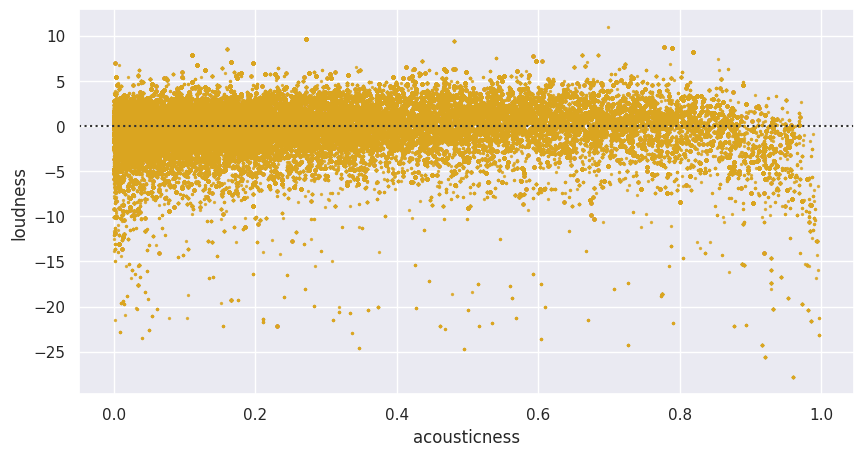

In [ ]:
sns.residplot(x=song_full['acousticness'], y=song_full['loudness'],
            scatter_kws={"color": "goldenrod", 's':2},
            line_kws={"color": "red", 'linewidth':1.5}
              )

### Distribution

#### Visualize compare with normal distribution

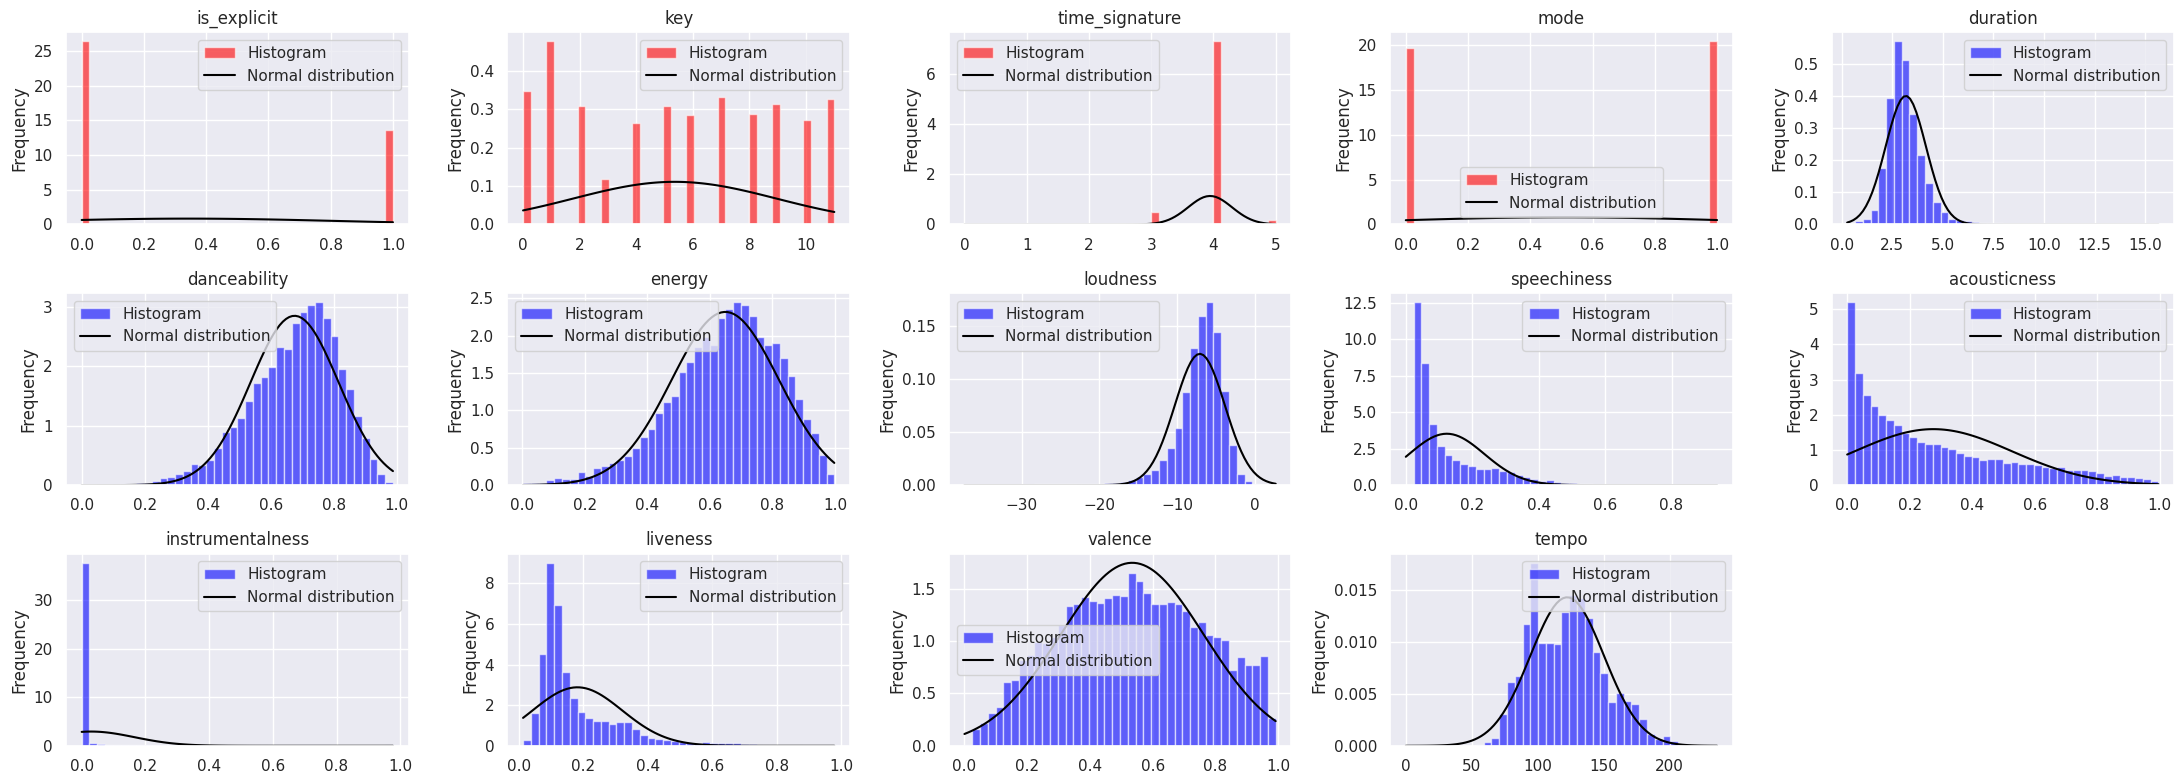

In [ ]:
def plot_distribution_and_compare_normal_distribution(data: pd.DataFrame) -> None:
  df = data.copy()
  plt.figure(figsize=(22,8))

  num_col = df.select_dtypes(include=np.number).columns
  for i, col in enumerate(num_col):
    ax = plt.subplot(math.ceil(len(num_col)/5), 5, i+1)
    if (df[col].dtype in ['int']):
      df[col].plot(
          kind='hist',
          color='red',
          bins=40,
          ax=ax,
          label='Histogram',
          density=True,
          alpha=0.6
          )
    elif (df[col].dtype == 'float'):
      df[col].plot(
          kind='hist',
          color='blue',
          bins=40,
          ax=ax,
          label='Histogram',
          density=True,
          alpha=0.6
          )

    mean, std = df[col].mean(), df[col].std()
    x = np.linspace(df[col].min(), df[col].max(), 100)
    pdf = norm.pdf(x, mean, std)
    ax.plot(x, pdf, label='Normal distribution', color='black')

    ax.legend()
    ax.set_title(col)

  plt.tight_layout()
  plt.show()

plot_distribution_and_compare_normal_distribution(df[cols[2:]])

#### Shapiro-Wilk Test

In [ ]:
from scipy.stats import shapiro
from termcolor import colored

def shapiro_wilk_test(data: pd.DataFrame, col, alpha=0.05)->None:
  df = data.copy()

  stat, p_value = shapiro(df[col])
  if p_value > alpha:
        result = colored('Accepted', 'green')
  else:
      result = colored('Rejected','red')
  print('Feature: {}\t Hypothesis: {}'.format(col, result))

for col in cols[2:]:
  shapiro_wilk_test(df, col, 0.05)

Feature: is_explicit	 Hypothesis: Rejected
Feature: key	 Hypothesis: Rejected
Feature: time_signature	 Hypothesis: Rejected
Feature: mode	 Hypothesis: Rejected
Feature: duration	 Hypothesis: Rejected
Feature: danceability	 Hypothesis: Rejected
Feature: energy	 Hypothesis: Rejected
Feature: loudness	 Hypothesis: Rejected
Feature: speechiness	 Hypothesis: Rejected
Feature: acousticness	 Hypothesis: Rejected
Feature: instrumentalness	 Hypothesis: Rejected
Feature: liveness	 Hypothesis: Rejected
Feature: valence	 Hypothesis: Rejected
Feature: tempo	 Hypothesis: Rejected


#### Q-Q plot

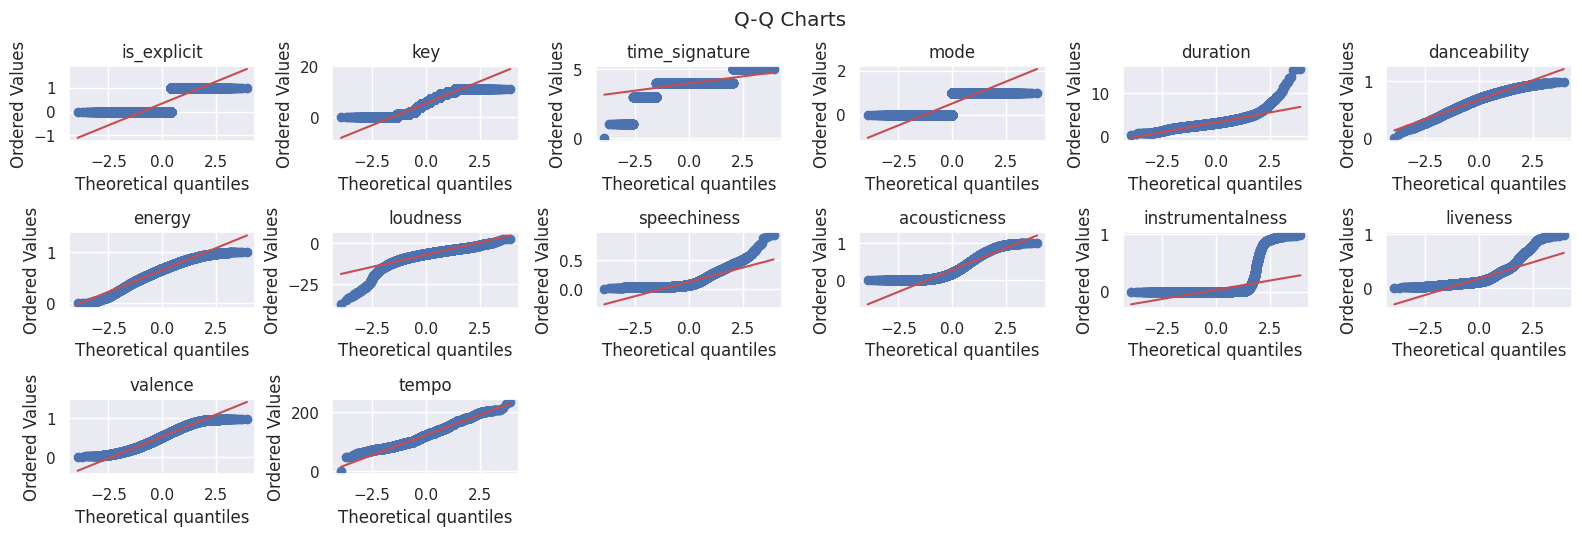

In [ ]:
figure = plt.figure(figsize = (16,8))
for i, col in enumerate(cols[2:]):
    plt.subplot(5, 6, i+1)
    stats.probplot(df[col], plot=plt)
    plt.title(col)
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Q-Q Charts', y=1.02)
plt.show()

#### Kết luận
1. Chỉ có tempo, dancebility, energy là tương đối gần pp chuẩn
2. Các feature còn lại không tuân theo pp chuẩn.

### Skewness

In [ ]:
def skewness(data: pd.DataFrame, cols:list)->None:
  df = data.copy()

  skew_features = pd.DataFrame(df[cols].apply(lambda x : skew(x))).reset_index()
  skew_features.columns = ['features','skewness']

  fig = px.bar(skew_features, x='features',y='skewness', color = 'skewness', color_continuous_scale = 'Teal')

  fig.update_layout(height=400, bargap=0.2,
                    margin=dict(b=0, t=120),
                    plot_bgcolor='rgb(242,242,242)',
                    font=dict(family="Times New Roman", size= 14),
                    hoverlabel=dict(font_color="floralwhite"),
                    showlegend=False)

  fig.add_annotation(
      text="<span style='font-size:35px; font-family:Times New Roman'>Skewness Chart</span>",
      xref="paper", yref="paper", x=0, y=1.5,
      showarrow=False, font=dict(size=20),
      align="center"
  )

  fig.add_annotation(
      text=(
          "<span style='font-size:14px; font-family:Helvetica'>Skewness = 0 : Không lệch so với pp chuẩn</span><br>"
          "<span style='font-size:14px; font-family:Helvetica'>Skewness < 0 : Lệch trái so với pp chuẩn</span><br>"
          "<span style='font-size:14px; font-family:Helvetica'>Skewness > 0 : Lệch phải so với pp chuẩn</span><br>"
      ),
      xref="paper", yref="paper", x=0, y=1.3,
      showarrow=False, font=dict(size=12),
      align="left"
  )

  fig.show()


In [ ]:
skewness(df, cols[2:])

#### Kết luận
1. time_signature,instrumentalness, liveliness, duration, loudness lệch nhiều so với pp chuẩn

### Kurtosis

In [ ]:
def Kurtosis(data: pd.DataFrame, cols:list)->None:
  df = data.copy()

  skew_features = pd.DataFrame(df[cols].apply(lambda x : kurtosis(x))).reset_index()
  skew_features.columns = ['features','kurtosis']

  fig = px.bar(skew_features, x='features',y='kurtosis', color = 'kurtosis', color_continuous_scale = 'Teal')

  fig.update_layout(height=400, bargap=0.2,
                    margin=dict(b=0, t=120),
                    plot_bgcolor='rgb(242,242,242)',
                    font=dict(family="Times New Roman", size= 14),
                    hoverlabel=dict(font_color="floralwhite"),
                    showlegend=False)

  fig.add_annotation(
      text="<span style='font-size:35px; font-family:Times New Roman'>Kurtosis Chart</span>",
      xref="paper", yref="paper", x=0, y=1.5,
      showarrow=False, font=dict(size=20),
      align="center"
  )

  fig.add_annotation(
      text=(
          "<span style='font-size:14px; font-family:Helvetica'>kurtosis = 0 : Đỉnh tương đương với pp chuẩn</span><br>"
          "<span style='font-size:14px; font-family:Helvetica'>kurtosis < 0 : Đỉnh thấp hơn pp chuẩn</span><br>"
          "<span style='font-size:14px; font-family:Helvetica'>kurtosis > 0 : Đỉnh cao hơn pp chuẩn</span><br>"
      ),
      xref="paper", yref="paper", x=0, y=1.3,
      showarrow=False, font=dict(size=12),
      align="left"
  )

  fig.show()

In [ ]:
Kurtosis(df, cols[2:])

#### Kết luận
1. time_signature và instrumentalness, duration, loudness có đỉnh cao hơn, nhọn hơn nhiều so với phân phối chuẩn

### Outlier

##### Grub-test

In [ ]:
def Grub_test(data: pd.DataFrame, features: list[str]):
  df = data.copy()

  outlier_features = []
  print("H0: There are no outliers in the data set \nH1: There is exactly one outlier in the data set")
  for feature in features:
    alpha = 0.05
    N = len(df[feature])
    mean = df[feature].mean()
    SD = df[feature].std()

    G_calculated = max(df[feature] - mean) / SD
    t_value = stats.t.ppf(1 - alpha/(2*N), N-2)
    G_critical = (N - 1) * np.sqrt((t_value**2) / (N - 2 + t_value**2)) / np.sqrt(N)

    if G_calculated > G_critical:
      print(f"Feature: {feature} - Hypothesis: Rejected")
      outlier_features.append(feature)
    else:
      print(f"Feature: {feature} - Hypothesis: Accepted")
  return outlier_features

outlier_features = Grub_test(df, cols[2:])

H0: There are no outliers in the data set 
H1: There is exactly one outlier in the data set
Feature: is_explicit - Hypothesis: Accepted
Feature: key - Hypothesis: Accepted
Feature: time_signature - Hypothesis: Accepted
Feature: mode - Hypothesis: Accepted
Feature: duration - Hypothesis: Rejected
Feature: danceability - Hypothesis: Accepted
Feature: energy - Hypothesis: Accepted
Feature: loudness - Hypothesis: Accepted
Feature: speechiness - Hypothesis: Rejected
Feature: acousticness - Hypothesis: Accepted
Feature: instrumentalness - Hypothesis: Rejected
Feature: liveness - Hypothesis: Rejected
Feature: valence - Hypothesis: Accepted
Feature: tempo - Hypothesis: Accepted


#### Isolation Forest

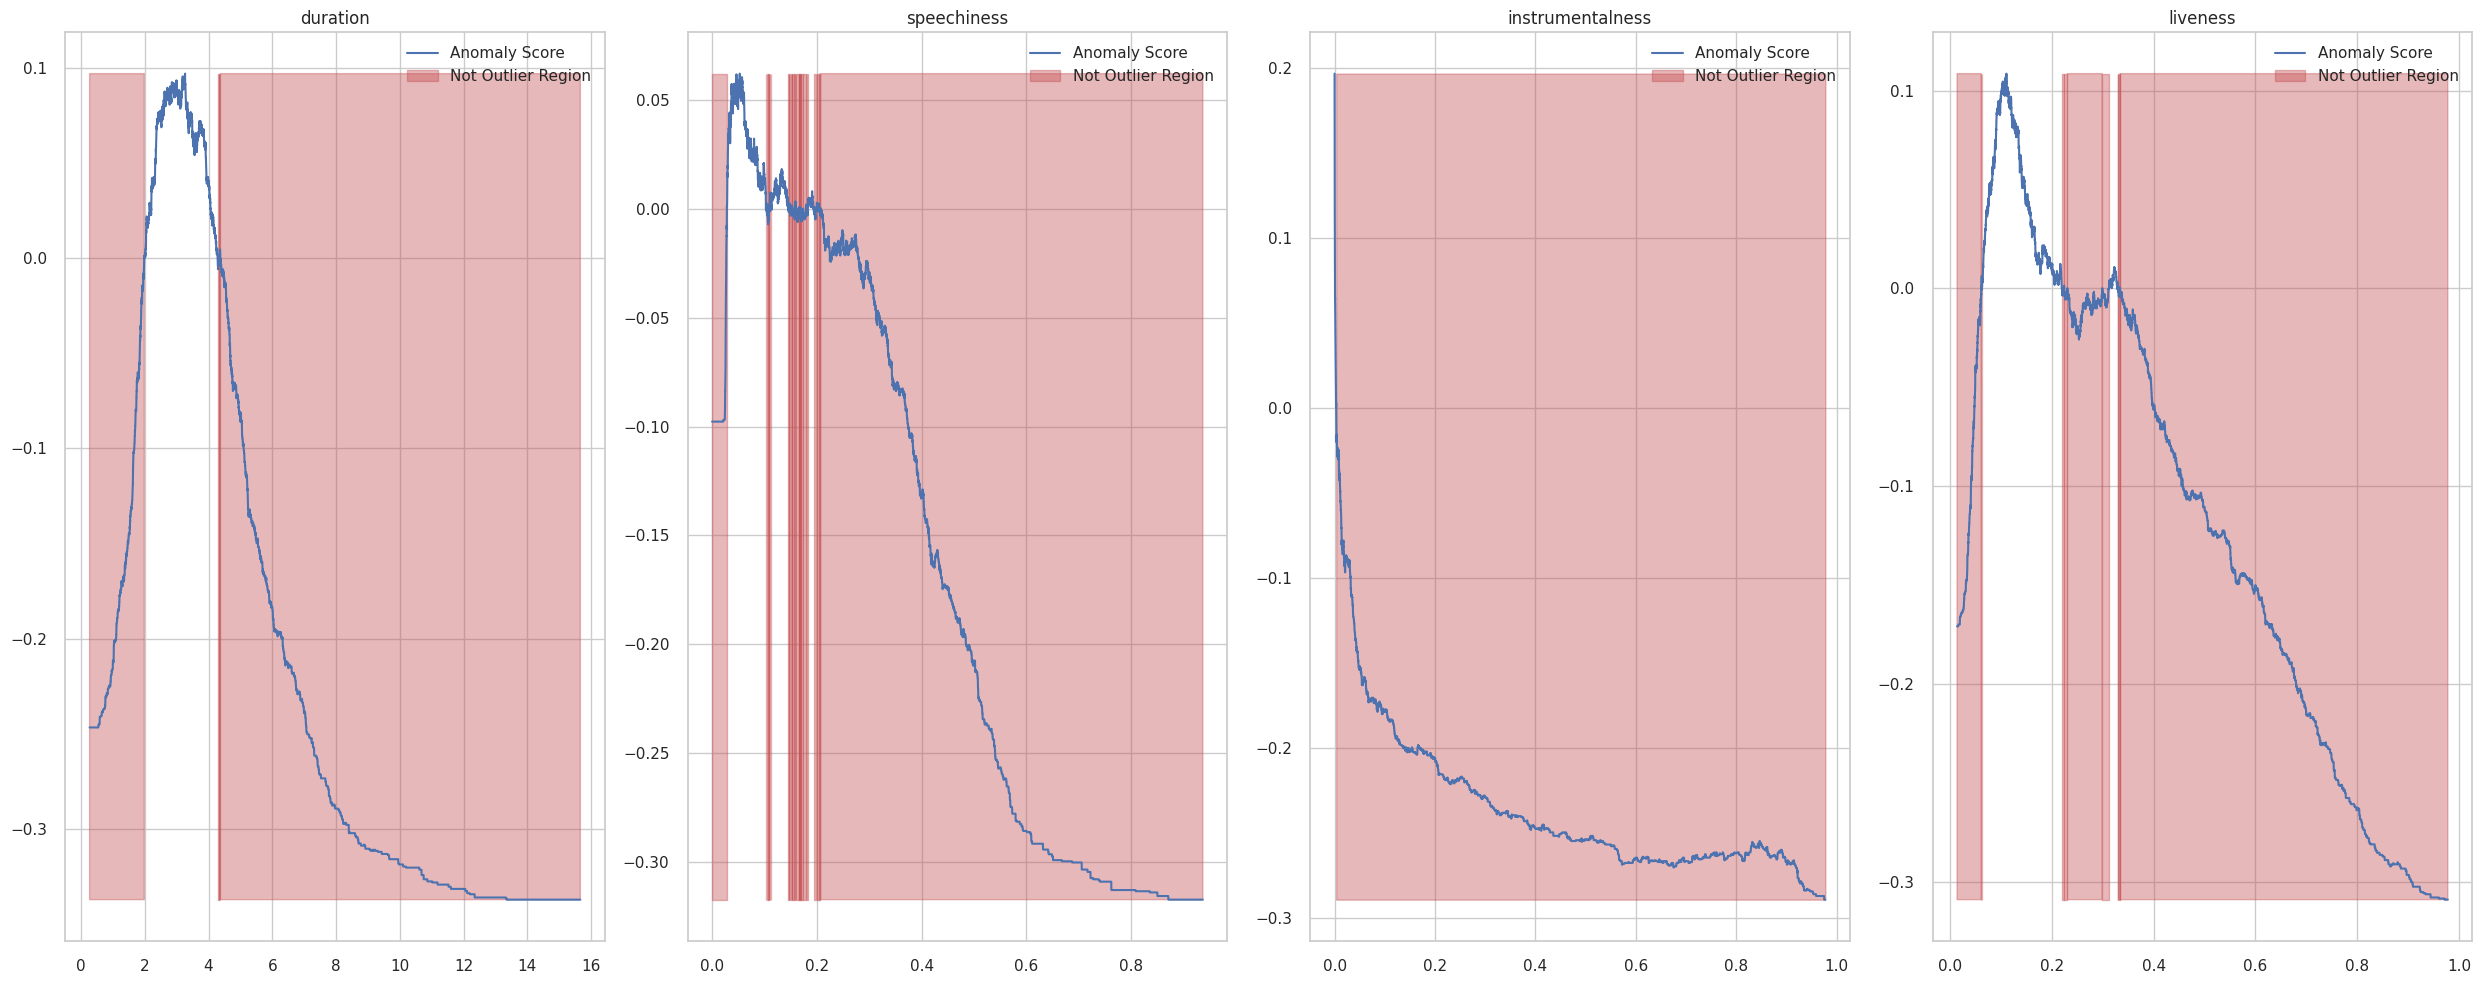

In [ ]:
def plot_isolation_forest(data: pd.DataFrame, outlier_features):
    df = data.copy()

    plt.figure(figsize=(25,10))
    for i, column in enumerate(outlier_features):
        plt.subplot(math.ceil(len(outlier_features)/4), 4, i + 1)

        isolation_forest = IsolationForest(contamination='auto')

        # Fit the model for the current column
        isolation_forest.fit(df[column].values.reshape(-1, 1))

        # Create a range for predictions (anomaly score)
        xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1, 1)

        # Calculate anomaly scores
        anomaly_score = isolation_forest.decision_function(xx)
        outlier = isolation_forest.predict(xx)

        # Plot anomaly score
        plt.plot(xx, anomaly_score, label='Anomaly Score')

        # Highlight outliers (where prediction is -1)
        plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                        where=outlier == -1, color='r', alpha=0.4, label='Not Outlier Region')

        plt.title(column)
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_isolation_forest(df, outlier_features)

#### Mahalanobis distance

In [ ]:
from matplotlib import patches

def Mahalanobis_distance(df: pd.DataFrame, feature_1: str, feature_2: str):
    df_new = df[[feature_1, feature_2]].to_numpy()
    cov = np.cov(df_new, rowvar=False)
    inv_cov = np.linalg.inv(cov)

    m = np.mean(df_new, axis=0)
    distances = (df_new - m).dot(inv_cov).dot((df_new - m).T)

    cutoff = stats.chi2.ppf(0.95, df.shape[1] - 1)
    outlierIndexes = np.where(distances > cutoff)

    if(len(df_new[outlierIndexes, :]) > 0):
        print(f"Index of Outliers: {set(outlierIndexes[0])}")
        pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        lambda_, v = np.linalg.eig(cov)
        lambda_ = np.sqrt(lambda_)

        ellipse = patches.Ellipse(xy=(m[0], m[1]),
            width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
            angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0'
        )

        ellipse.set_facecolor('#0984e3')
        ellipse.set_alpha(0.5)
        fig = plt.figure()
        ax = plt.subplot()
        ax.add_artist(ellipse)
        plt.scatter(df_new[:, 0], df_new[:, 1])
        plt.ylabel(f"{feature_1}")
        plt.xlabel(f"{feature_2}")
        plt.show()

        return set(outlierIndexes[0])

Index of Outliers: {2050, 9, 4105, 10251, 10252, 6160, 22, 4118, 10262, 10265, 12313, 6171, 14358, 29, 6173, 6174, 6175, 14367, 10275, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 6199, 6200, 58, 59, 60, 61, 6205, 63, 64, 65, 6201, 67, 68, 10310, 72, 4169, 74, 77, 79, 2131, 6227, 8277, 14420, 14421, 14422, 10333, 10334, 2145, 6249, 12394, 6251, 6252, 12398, 112, 115, 14453, 12410, 6269, 131, 4230, 8326, 12423, 4234, 12431, 8337, 14485, 14486, 14487, 12442, 8348, 6305, 14518, 4282, 6331, 12474, 10439, 6345, 204, 6354, 12498, 10454, 10456, 6361, 6362, 10459, 4318, 6368, 10465, 12514, 2276, 6377, 10474, 6379, 14581, 8438, 8439, 12537, 252, 10494, 14598, 10510, 289, 6434, 12578, 12579, 8485, 12580, 4394, 14634, 2348, 10544, 8507, 6460, 326, 14663, 6473, 4431, 6479, 340, 14678, 14680, 8542, 12639, 8547, 10596, 2405, 14691, 10602, 10604, 14705, 372, 10620, 14721, 10626, 2437, 10629, 2442, 12684, 4500, 2456, 8604, 6561, 14755, 14760, 10668, 14766, 10674, 2483, 12728, 2492, 2493, 2494, 6588, 65

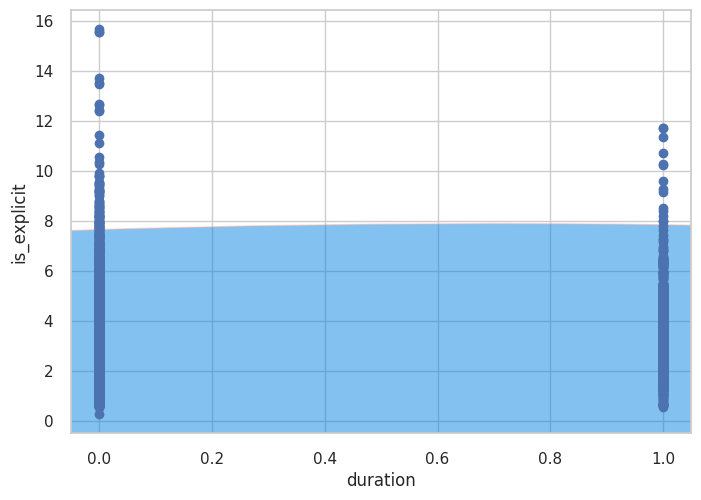

Index of Outliers: {2050, 9, 10251, 10252, 6160, 4118, 10262, 14358, 10265, 12313, 6171, 6173, 6174, 6175, 10270, 14367, 10275, 10281, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 6199, 6200, 58, 59, 60, 61, 6205, 63, 64, 65, 6201, 67, 68, 14400, 10310, 72, 74, 77, 79, 80, 2131, 6227, 8277, 14420, 14421, 14422, 10333, 10334, 97, 2145, 6249, 12394, 6251, 6252, 12398, 112, 115, 14453, 12410, 6269, 131, 4230, 8326, 12423, 4234, 12431, 8337, 8339, 14485, 14486, 14487, 12442, 8348, 6305, 6310, 14518, 4282, 6331, 12474, 10439, 204, 6354, 12498, 10454, 10456, 6361, 6362, 10459, 4318, 6368, 10465, 12514, 6377, 10474, 6379, 4334, 14581, 8438, 8439, 12537, 252, 10494, 14598, 8457, 10510, 2332, 289, 2337, 6434, 12578, 8485, 12579, 6439, 12580, 4394, 12586, 2348, 14634, 10544, 10554, 8507, 6460, 326, 14663, 6473, 4431, 6479, 340, 14678, 14680, 8542, 12639, 8547, 10596, 2405, 14691, 2408, 6506, 10602, 10604, 14705, 372, 14721, 10626, 2435, 2437, 10629, 2442, 12684, 4500, 2455, 2456, 8604, 6561, 1475

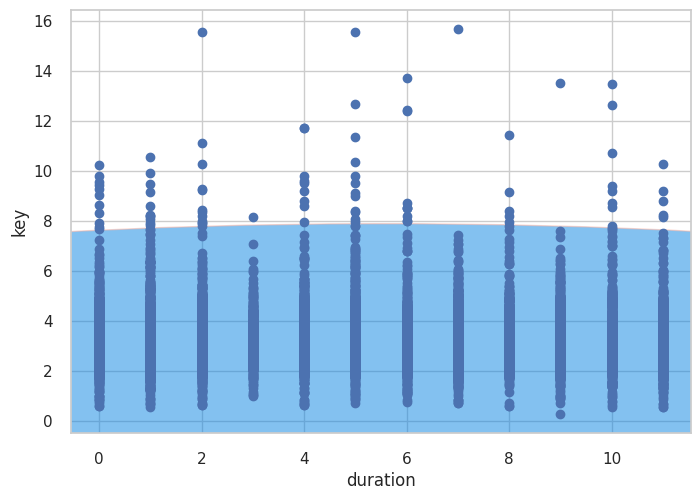

Index of Outliers: {1, 8198, 9, 14, 28, 32, 35, 37, 8232, 42, 44, 50, 51, 8242, 53, 54, 55, 8246, 58, 59, 60, 61, 8254, 63, 64, 65, 67, 68, 72, 74, 75, 8267, 77, 8270, 79, 80, 8277, 8292, 8293, 8302, 111, 112, 115, 117, 8316, 8319, 131, 8326, 8329, 8332, 8337, 8347, 8348, 173, 8379, 8381, 190, 8395, 204, 8400, 8404, 8420, 239, 8438, 8439, 252, 8457, 268, 8460, 8470, 289, 8485, 310, 8507, 326, 8519, 340, 8542, 352, 8545, 8547, 361, 372, 376, 8569, 387, 388, 389, 391, 394, 396, 397, 400, 404, 8604, 8618, 8623, 8633, 456, 8652, 466, 8661, 473, 474, 475, 8666, 8669, 8671, 489, 492, 493, 8688, 8689, 500, 8693, 503, 8714, 8723, 8726, 539, 546, 555, 572, 574, 8785, 600, 8802, 8803, 8811, 8812, 633, 644, 8844, 8846, 8852, 668, 670, 8863, 681, 685, 8884, 8891, 706, 8899, 8902, 729, 731, 732, 8923, 8924, 737, 745, 8941, 750, 771, 772, 776, 777, 779, 805, 8998, 813, 9006, 9007, 9015, 9023, 833, 9025, 838, 840, 843, 847, 849, 850, 851, 9044, 9041, 853, 855, 856, 857, 859, 860, 862, 864, 866, 867, 

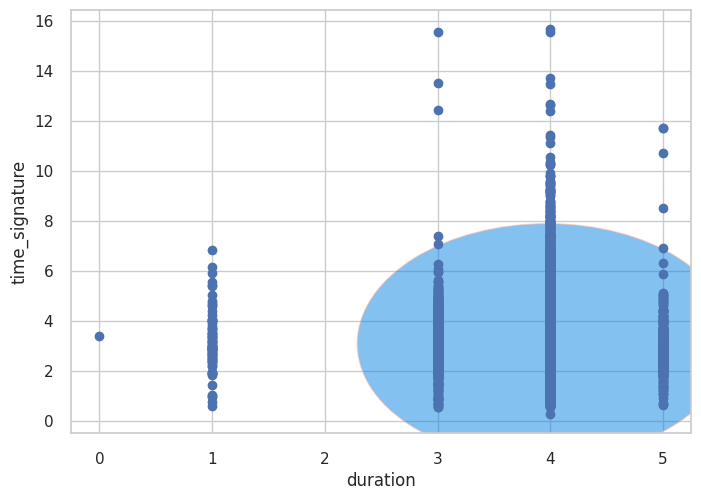

Index of Outliers: {2050, 6149, 9, 10251, 10252, 6160, 4118, 10262, 14358, 10265, 12313, 6171, 6173, 6174, 6175, 14367, 10275, 10281, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 6199, 6200, 58, 59, 60, 61, 6205, 63, 64, 65, 6201, 67, 68, 14400, 10310, 72, 74, 75, 77, 79, 80, 2131, 6227, 8277, 14420, 14421, 14422, 10333, 10334, 97, 2145, 6249, 12394, 6251, 6252, 12398, 112, 115, 4211, 6259, 14453, 12410, 6269, 131, 4230, 8326, 12423, 4234, 12431, 8337, 8339, 14485, 14486, 14487, 12442, 8348, 6305, 6310, 14518, 4282, 6331, 12474, 10439, 6345, 204, 4300, 10449, 6354, 12498, 10454, 10456, 6361, 6362, 10459, 4318, 6368, 10465, 12514, 6377, 10474, 6379, 4334, 14581, 8438, 8439, 12537, 252, 10494, 14598, 8457, 10510, 2332, 289, 6434, 12578, 12579, 8485, 12580, 6439, 4394, 14634, 2348, 10544, 10554, 8507, 6460, 326, 14663, 6473, 4431, 6479, 340, 14678, 14680, 8542, 12639, 8547, 10596, 2405, 14691, 2408, 6506, 10602, 10604, 14705, 372, 8575, 14721, 10626, 2435, 2437, 10629, 14725, 2442, 12684, 

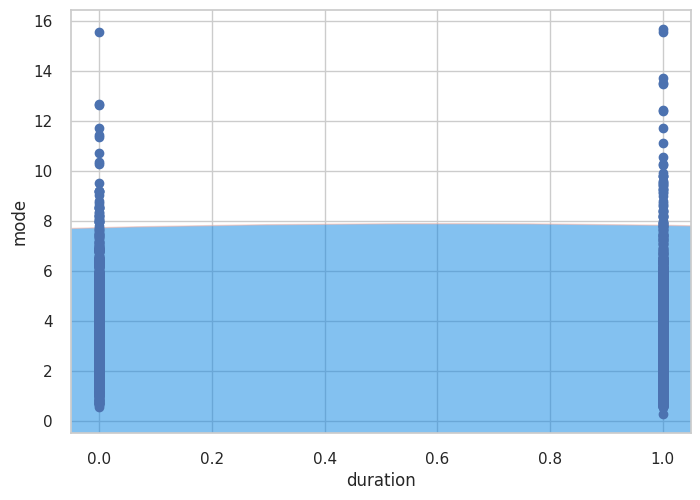

Index of Outliers: {2050, 6149, 9, 10251, 10252, 6160, 22, 4118, 10262, 10265, 12313, 6171, 14358, 6173, 6174, 6175, 14367, 10275, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 6199, 6200, 58, 59, 60, 61, 6201, 63, 64, 65, 66, 67, 68, 69, 6205, 10310, 72, 74, 75, 77, 79, 2131, 6227, 8277, 14420, 14421, 14422, 10333, 10334, 97, 2145, 6249, 12394, 6251, 6252, 12398, 112, 115, 6259, 14453, 12410, 6269, 131, 4230, 8326, 12423, 4234, 12431, 8337, 14485, 14486, 14487, 12442, 8348, 6305, 14518, 12474, 6331, 10439, 204, 6354, 12498, 10454, 10456, 6361, 6362, 10459, 4318, 6368, 10465, 12514, 6377, 10474, 6379, 14581, 8438, 8439, 12537, 252, 10494, 14598, 10510, 2332, 289, 6434, 12578, 12579, 8485, 12580, 4394, 14634, 2348, 10544, 10548, 10554, 8507, 6460, 326, 14663, 6473, 4431, 6479, 340, 14678, 14680, 8542, 12639, 8547, 10596, 2405, 14691, 10602, 10604, 14705, 372, 8575, 10624, 14721, 10626, 2437, 10629, 2442, 12684, 4500, 2455, 2456, 8604, 6561, 14755, 6566, 14766, 4530, 2483, 10674, 4533, 249

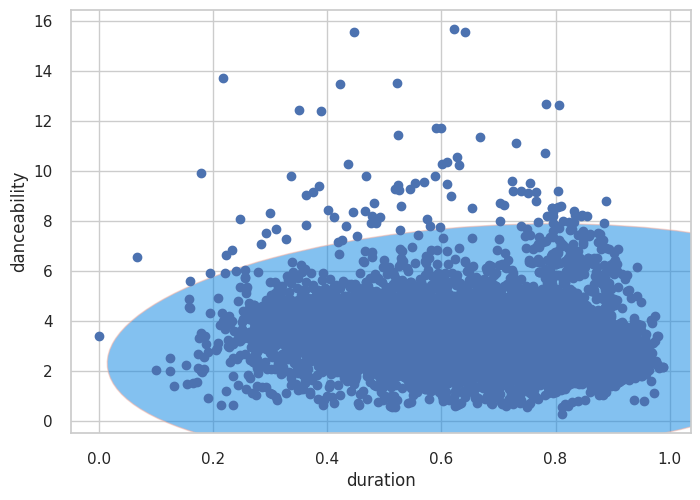

Index of Outliers: {2050, 6149, 9, 10251, 10252, 6160, 4118, 10262, 14358, 10265, 12313, 6171, 6173, 6174, 6175, 10270, 14367, 10275, 10281, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 6199, 6200, 58, 59, 60, 61, 6205, 63, 64, 65, 6201, 67, 68, 14400, 10310, 72, 74, 77, 79, 80, 2131, 6227, 8277, 10324, 14420, 14421, 14422, 10333, 10334, 2145, 6249, 12394, 6251, 6252, 8301, 12398, 112, 4209, 115, 6259, 14453, 12410, 6269, 131, 4230, 8326, 136, 12423, 4234, 12431, 8337, 8339, 14485, 14486, 14487, 12442, 8348, 6305, 14518, 4282, 6331, 12474, 10439, 204, 10449, 6354, 12498, 10454, 10456, 6361, 6362, 10459, 4318, 6368, 10465, 12514, 6377, 10474, 6379, 4334, 14581, 8438, 8439, 12537, 252, 10494, 14598, 8457, 10510, 12571, 2332, 289, 6434, 12578, 12579, 8485, 12580, 6439, 4394, 12586, 2348, 14634, 10544, 10554, 8507, 6460, 326, 14663, 6473, 4431, 6479, 340, 14678, 14680, 2398, 8542, 12639, 8547, 10596, 2405, 14691, 2408, 6506, 10602, 14705, 372, 14721, 10626, 2435, 2437, 10629, 14725, 2442, 1

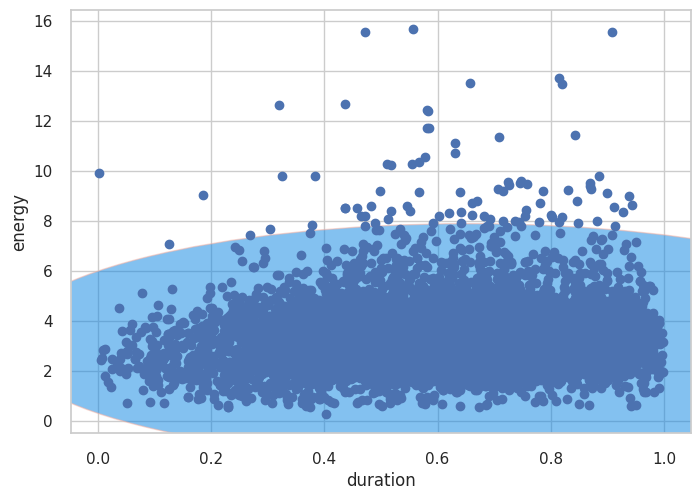

Index of Outliers: {2050, 9, 10251, 6160, 6163, 4118, 10262, 14358, 10265, 12313, 6171, 6172, 6173, 6174, 6175, 10270, 14367, 10275, 10281, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 2100, 6199, 58, 59, 60, 61, 6200, 63, 64, 65, 6201, 67, 68, 6205, 2118, 6212, 72, 10310, 74, 75, 77, 79, 80, 2128, 2131, 6227, 8277, 14420, 14421, 14422, 10333, 10334, 2145, 6249, 12394, 107, 6251, 6252, 8300, 8301, 112, 12398, 14450, 115, 14453, 12410, 4220, 6269, 4225, 131, 4230, 8326, 12423, 4234, 14477, 12430, 12431, 8337, 8339, 14485, 14486, 14487, 14488, 12442, 8348, 2207, 6305, 6310, 8365, 6321, 8373, 14518, 4282, 6331, 12474, 8383, 8384, 8385, 8386, 8387, 10439, 204, 8396, 8397, 8398, 8399, 8400, 6354, 12498, 12500, 12501, 10454, 4312, 6361, 4314, 6362, 10456, 10459, 4318, 10462, 6368, 10465, 12514, 2275, 14564, 6377, 10474, 6379, 4334, 14581, 8438, 8439, 13075, 12537, 252, 14588, 10494, 11041, 10502, 14598, 8457, 14601, 14602, 10510, 12563, 2332, 4381, 289, 6434, 12578, 12579, 8485, 2342, 6439, 2

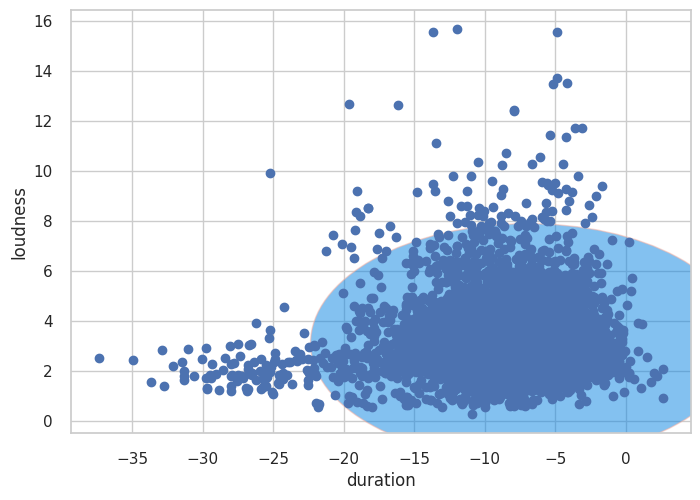

Index of Outliers: {2050, 9, 10251, 10252, 6160, 6163, 8211, 10259, 22, 4118, 10262, 10265, 12313, 6171, 14358, 29, 6173, 6174, 6175, 14367, 10275, 39, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 4150, 6199, 58, 59, 60, 61, 6200, 63, 64, 65, 6201, 67, 68, 6205, 10310, 14402, 72, 74, 2123, 77, 79, 14416, 2131, 6227, 8277, 14420, 14421, 14422, 2139, 14427, 10333, 4190, 10334, 14430, 97, 2145, 4193, 2148, 8294, 6249, 12394, 6251, 6252, 12398, 112, 4209, 115, 14453, 12410, 6269, 131, 2180, 4230, 8326, 12423, 4234, 12431, 8337, 14485, 14486, 12439, 14487, 12442, 8348, 10397, 6305, 14497, 2219, 12464, 14518, 4282, 6331, 12474, 14523, 14527, 12482, 14530, 10439, 204, 205, 12496, 6354, 12498, 10454, 4312, 6361, 4314, 6362, 8409, 10456, 4318, 6366, 6368, 10459, 10465, 12514, 6377, 10474, 6379, 8428, 14581, 8438, 8439, 12537, 252, 10494, 12544, 14592, 14598, 10510, 6415, 4369, 6420, 289, 6434, 12578, 12579, 8485, 12580, 14632, 4393, 4394, 14634, 2348, 10544, 4408, 10554, 8507, 6460, 326, 10567, 

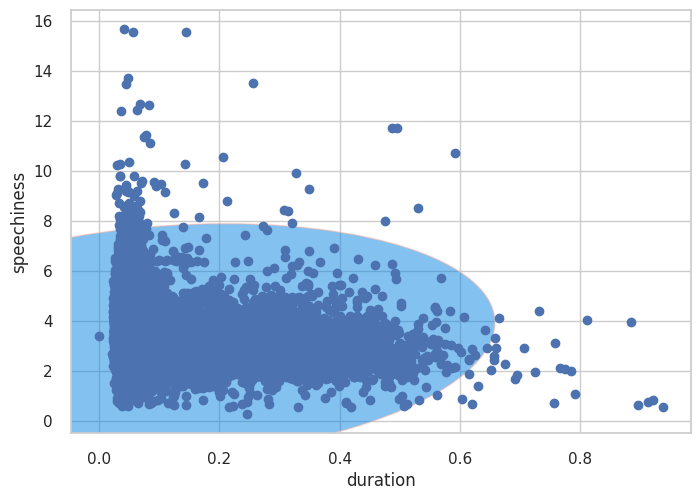

Index of Outliers: {2050, 9, 10251, 10252, 6160, 4118, 10262, 14358, 10265, 12313, 6171, 6173, 6174, 6175, 14367, 10275, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 6199, 6200, 58, 59, 60, 61, 6201, 63, 64, 65, 66, 67, 68, 6205, 10310, 14400, 72, 74, 77, 79, 80, 2131, 6227, 8277, 10324, 14420, 14421, 14422, 10333, 10334, 2145, 6249, 12394, 6251, 6252, 12398, 112, 115, 14453, 12410, 6269, 131, 4230, 8326, 12423, 4234, 12431, 8337, 14485, 14486, 14487, 12442, 8348, 6305, 14518, 4282, 6331, 12474, 10439, 204, 10449, 6354, 12498, 10454, 10456, 6361, 6362, 10459, 4318, 6368, 10465, 12514, 6377, 10474, 6379, 14581, 8438, 8439, 12537, 252, 10494, 14598, 10510, 2332, 289, 2337, 6434, 12578, 8485, 12579, 6439, 12580, 4394, 14634, 2348, 10544, 10554, 8507, 6460, 326, 14663, 6473, 4431, 6479, 340, 14678, 14680, 8542, 12639, 8547, 10596, 2405, 14691, 6506, 10602, 10604, 14705, 372, 14721, 10626, 2437, 10629, 14725, 2442, 12684, 4500, 2456, 8604, 6561, 14755, 6566, 14760, 14766, 4530, 2483, 10674, 

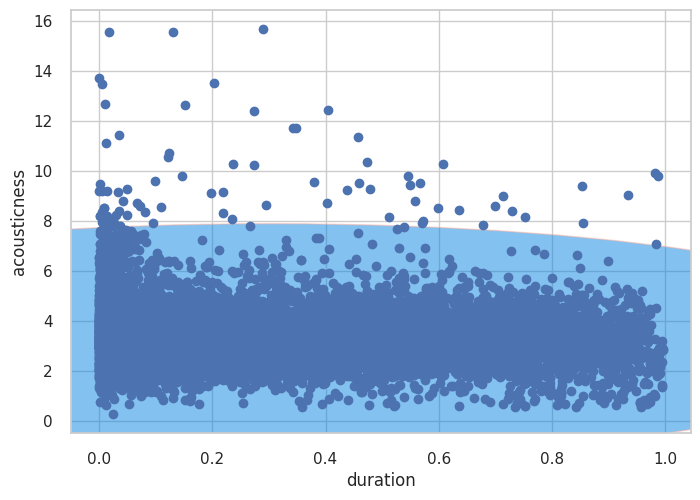

Index of Outliers: {2050, 2055, 9, 10251, 6160, 10259, 4118, 10262, 14358, 10265, 6170, 6171, 12313, 6173, 6174, 6175, 8223, 10270, 10272, 10275, 14367, 8238, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 6198, 6199, 58, 59, 60, 61, 6200, 63, 64, 65, 6201, 67, 68, 6205, 8257, 10310, 72, 14400, 74, 77, 79, 80, 14417, 8274, 2131, 6227, 8277, 14420, 14421, 14422, 12377, 15145, 10333, 10334, 2145, 10342, 8296, 6249, 12394, 6251, 6252, 8301, 10350, 12398, 112, 14450, 115, 14453, 12410, 6269, 131, 4230, 8326, 12423, 4234, 14477, 12431, 6288, 8337, 14485, 14486, 14487, 4248, 12440, 12442, 14488, 8348, 2207, 6305, 14504, 6315, 4272, 10416, 14518, 6329, 4282, 6331, 12474, 11028, 2239, 2240, 8383, 8384, 8385, 8386, 8387, 14534, 10439, 204, 8396, 8397, 8398, 8399, 10444, 6354, 12498, 12501, 10454, 10456, 6361, 6362, 10459, 4318, 224, 6368, 10465, 12514, 10471, 6377, 10474, 235, 236, 6379, 4334, 8431, 10479, 12528, 14581, 8438, 8439, 12537, 14585, 252, 14588, 10494, 4353, 258, 260, 14598, 8457, 1050

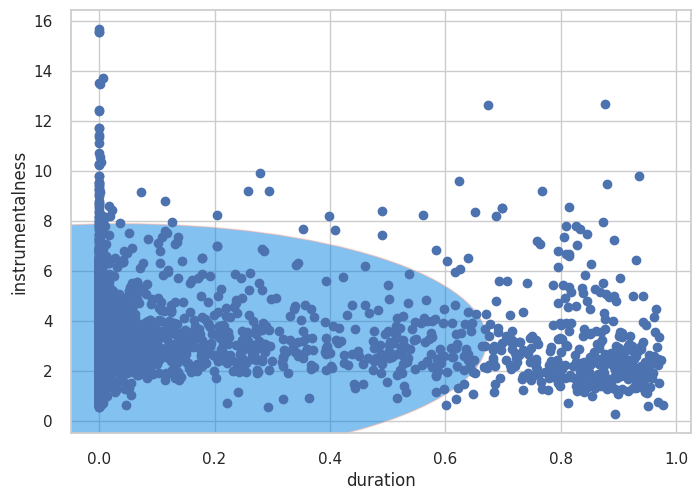

Index of Outliers: {2050, 6149, 9, 10251, 10252, 10254, 6160, 12309, 4118, 10262, 6168, 10265, 12313, 6171, 14358, 6173, 4126, 6174, 6175, 14365, 14367, 10275, 39, 10281, 2095, 4144, 2097, 50, 51, 2098, 53, 54, 55, 6192, 6199, 58, 59, 60, 61, 2109, 63, 64, 65, 4156, 67, 68, 6205, 6210, 8258, 72, 6217, 74, 4171, 10310, 77, 4173, 79, 80, 12362, 14409, 2131, 4179, 6227, 8276, 8277, 14420, 14421, 14422, 10333, 10334, 12384, 2145, 6249, 12394, 6251, 6252, 12396, 12398, 112, 4209, 115, 6259, 14453, 12410, 6269, 12416, 129, 131, 4230, 6278, 136, 8326, 4234, 12423, 6287, 12431, 145, 8337, 4243, 14485, 14486, 8343, 14487, 14488, 12442, 8348, 160, 2209, 6305, 8353, 6311, 8359, 12460, 8365, 10413, 2224, 14518, 8376, 4282, 6331, 12474, 10439, 6345, 14537, 204, 4300, 6354, 12498, 10454, 10456, 6361, 6362, 10459, 4318, 6368, 10465, 12514, 6377, 10474, 6379, 4334, 14581, 8438, 8439, 10489, 12537, 252, 2300, 8444, 10494, 6401, 258, 14598, 8457, 10510, 14606, 10512, 10516, 10518, 10521, 12571, 4381, 10

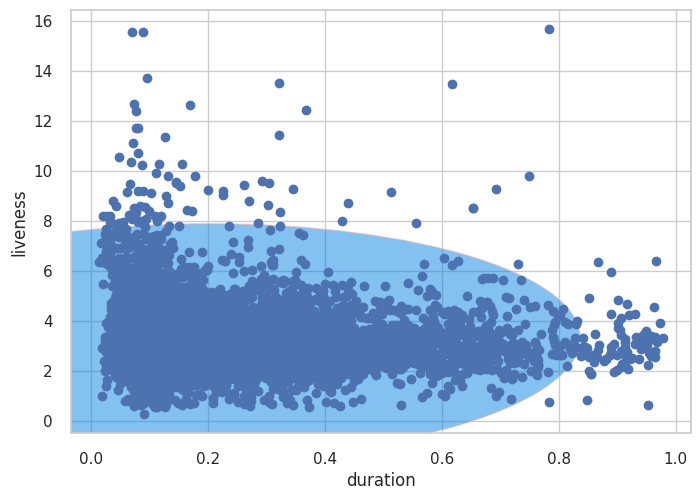

Index of Outliers: {2050, 6149, 9, 4105, 10251, 6160, 22, 4118, 10262, 10265, 12313, 6171, 14358, 6173, 6174, 6175, 14367, 10275, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 6199, 6200, 58, 59, 60, 61, 6203, 63, 64, 65, 66, 67, 68, 6205, 10310, 72, 74, 75, 77, 79, 80, 2131, 6227, 8277, 14420, 14421, 14422, 10333, 10334, 95, 2145, 6249, 12394, 6251, 6252, 12398, 112, 4209, 115, 4211, 6259, 14453, 12410, 6269, 131, 8326, 12423, 136, 4234, 12431, 8337, 14485, 14486, 14487, 12442, 8348, 6305, 2224, 14518, 12474, 10439, 204, 4300, 6354, 12498, 10454, 10456, 6361, 6362, 10459, 4318, 6368, 10465, 12514, 6377, 10474, 6379, 14581, 8438, 8439, 12537, 4346, 252, 10494, 14598, 10510, 12571, 6434, 12578, 12579, 8485, 12580, 4394, 14634, 2348, 10544, 10554, 8507, 6460, 326, 14663, 6473, 4431, 6479, 340, 14678, 14680, 8542, 12639, 8547, 10596, 2405, 14691, 10602, 4464, 14705, 372, 8575, 14721, 10626, 2435, 2437, 10629, 2442, 12684, 4500, 8596, 8597, 8599, 2456, 12693, 8604, 6561, 14755, 6566, 14766, 

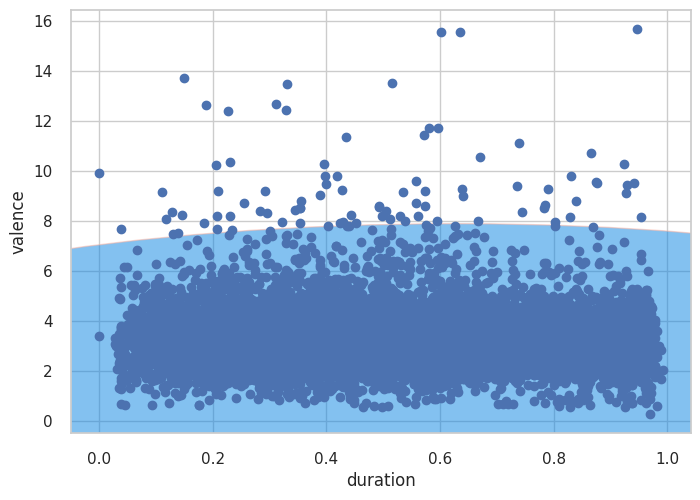

Index of Outliers: {2050, 9, 10251, 6160, 4118, 10262, 14358, 10265, 12313, 6171, 6173, 6174, 6175, 14367, 10275, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 6199, 6200, 58, 59, 60, 61, 6205, 63, 64, 65, 6201, 67, 68, 14400, 10310, 72, 4169, 74, 77, 79, 80, 2131, 6227, 8277, 10324, 14420, 14421, 14422, 12379, 10333, 10334, 12384, 2145, 6249, 12394, 6251, 6252, 12398, 112, 115, 4211, 14453, 12410, 6269, 131, 4230, 8326, 12423, 4234, 12431, 8337, 8339, 14485, 14486, 14487, 12442, 8348, 6305, 10403, 6310, 14518, 4282, 6331, 12474, 10439, 204, 4300, 10449, 6354, 12498, 10454, 10456, 6361, 6362, 10459, 4318, 6368, 10465, 12514, 2276, 6377, 10474, 6379, 4334, 14581, 8438, 8439, 12537, 252, 10494, 14598, 8457, 10510, 10512, 12571, 2332, 2336, 289, 2337, 6434, 12578, 8485, 12579, 6439, 12580, 4394, 14634, 2348, 10544, 10554, 8507, 6460, 326, 14663, 6473, 4431, 6479, 340, 14678, 14680, 8542, 12639, 8547, 10596, 2405, 14691, 6506, 10602, 2413, 14705, 372, 14721, 10626, 2435, 2437, 10629, 14725, 

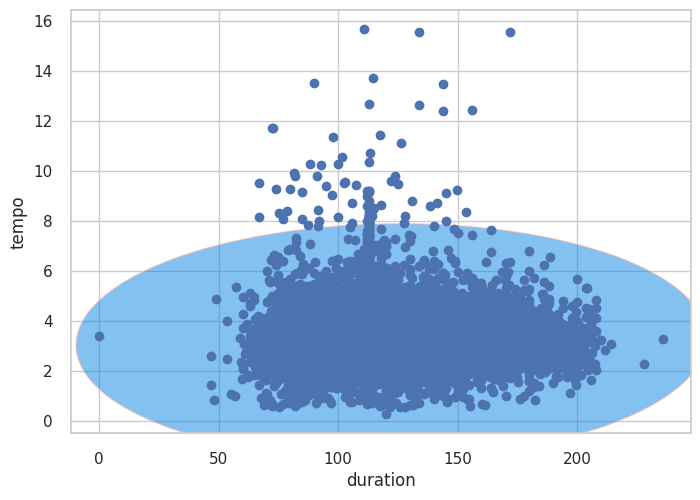

Index of Outliers: {6163, 8211, 10259, 12341, 4150, 14402, 2123, 14416, 83, 2139, 14427, 4190, 14430, 4193, 2148, 8294, 2180, 12439, 14492, 10397, 12448, 6305, 14497, 12464, 6322, 14523, 12482, 14530, 205, 4312, 8409, 4314, 6374, 8428, 14581, 14592, 6415, 4369, 4370, 6420, 14632, 4393, 14633, 308, 4408, 10561, 10567, 14665, 14670, 14675, 8538, 12647, 4459, 4463, 10607, 10612, 2421, 12667, 14721, 14729, 10652, 14755, 12725, 6582, 12726, 442, 8638, 14785, 10691, 2507, 6620, 14812, 2532, 4585, 10729, 10732, 14839, 2553, 10749, 4613, 10760, 8714, 8732, 4641, 10787, 2597, 12840, 10795, 556, 558, 4664, 2617, 8767, 10820, 12870, 6733, 6734, 4707, 14949, 12906, 6767, 2681, 14978, 6791, 14984, 6795, 2712, 10908, 2726, 12968, 10923, 15025, 2746, 15037, 2750, 15041, 8913, 13010, 8924, 4834, 15082, 10996, 4856, 6904, 2813, 11012, 2823, 11015, 15112, 13066, 2827, 6926, 4882, 4883, 8981, 13079, 813, 4912, 820, 13115, 9028, 4936, 11105, 873, 13162, 876, 15213, 877, 9068, 888, 7032, 9082, 15227, 2947,

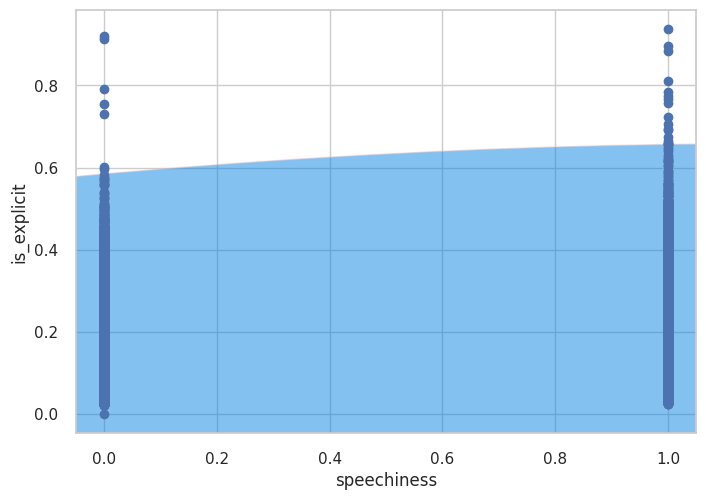

Index of Outliers: {13312, 10760, 9, 8714, 5643, 3090, 6163, 7187, 8211, 10259, 10787, 2597, 12840, 10795, 9777, 12341, 4150, 2617, 1597, 3645, 8767, 10820, 12868, 3654, 12870, 15428, 2123, 6734, 14416, 2139, 11355, 11357, 4190, 14427, 14430, 4193, 11873, 15459, 2148, 14436, 14949, 12906, 15472, 1650, 15479, 15480, 1660, 15485, 10878, 11904, 1665, 14978, 1668, 2180, 7302, 6791, 6795, 1676, 7820, 10899, 9366, 12439, 2712, 3224, 5785, 10908, 10397, 3231, 14497, 16037, 12968, 10923, 12464, 15025, 5301, 14523, 15551, 11457, 12482, 14530, 11460, 15041, 15049, 3274, 16076, 205, 7888, 12496, 9941, 5335, 4312, 8409, 4314, 13017, 11997, 7392, 15589, 11498, 15082, 8428, 14581, 3830, 2813, 12030, 14592, 3844, 11012, 2823, 5896, 15112, 13066, 2827, 6415, 7440, 4369, 4882, 4884, 6420, 13079, 1307, 1317, 10022, 14632, 3886, 11255, 7476, 3382, 4408, 4921, 5437, 10047, 9028, 10567, 4936, 14670, 3409, 7517, 15709, 12647, 873, 11114, 3435, 4459, 877, 12650, 4463, 10607, 13162, 15213, 10612, 2421, 8053, 

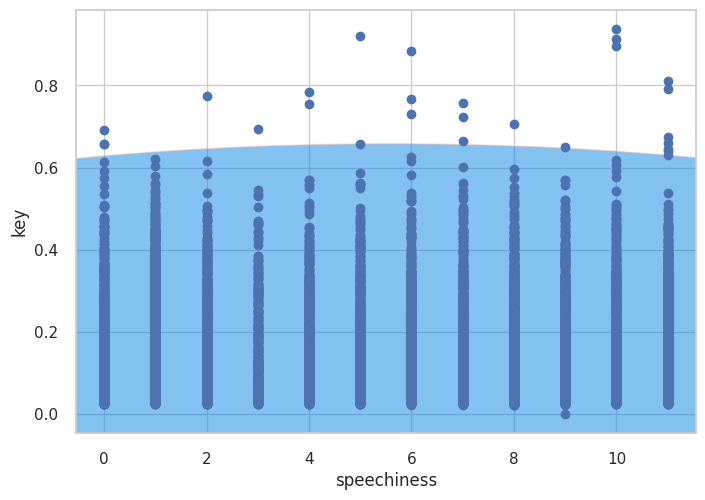

Index of Outliers: {1, 8198, 14, 8211, 28, 32, 35, 37, 8232, 42, 44, 8242, 8246, 60, 8254, 75, 8267, 8270, 80, 8292, 8293, 8302, 111, 117, 8316, 8319, 8329, 8332, 8347, 173, 8379, 8381, 190, 8395, 205, 8400, 8404, 8409, 8420, 8428, 239, 268, 8460, 8470, 289, 8500, 310, 8519, 352, 8545, 361, 8554, 376, 8569, 387, 388, 389, 391, 394, 396, 397, 400, 404, 8618, 8623, 8633, 442, 456, 473, 474, 475, 493, 8688, 8689, 8693, 503, 8714, 8723, 8726, 555, 574, 8767, 600, 8802, 8811, 633, 644, 8844, 8852, 668, 670, 685, 706, 8899, 8902, 8912, 729, 731, 732, 8923, 8924, 737, 745, 8941, 750, 771, 772, 776, 777, 779, 8981, 805, 8998, 813, 9006, 9007, 9015, 9023, 833, 838, 840, 843, 847, 849, 850, 851, 9044, 9041, 853, 855, 856, 857, 859, 860, 864, 866, 868, 869, 9060, 873, 874, 9068, 877, 9070, 9079, 9081, 9082, 905, 906, 912, 9113, 9120, 9124, 934, 9141, 9159, 9160, 975, 991, 9198, 9200, 9201, 1010, 9216, 9217, 1046, 1049, 1062, 9261, 1071, 1072, 9265, 9269, 9277, 9278, 1090, 9290, 1101, 1102, 1105, 

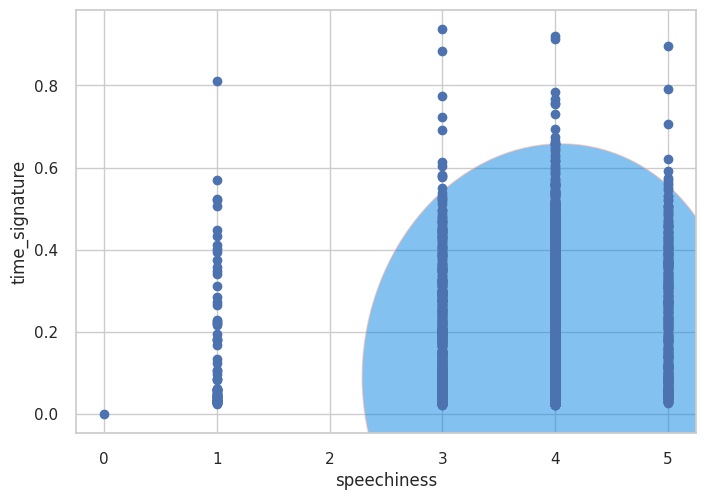

Index of Outliers: {13312, 4613, 10760, 8714, 5643, 6163, 7187, 8211, 10259, 1561, 10787, 4644, 2597, 39, 12840, 10795, 9777, 12341, 4150, 2617, 1597, 3645, 8767, 10820, 12868, 3654, 12870, 15428, 2123, 6734, 14416, 2139, 14427, 11357, 4190, 6750, 14430, 4193, 11873, 4707, 2148, 14436, 14942, 14949, 15459, 12906, 5229, 15472, 1650, 15479, 15480, 1660, 15485, 10878, 1665, 14978, 1668, 2180, 7302, 6791, 6795, 1676, 3728, 10899, 9366, 12439, 2712, 5785, 10908, 10397, 14497, 16037, 12968, 10923, 12464, 15025, 5301, 14523, 15551, 11457, 12482, 14530, 11460, 15041, 15049, 3274, 15052, 205, 16076, 7888, 8913, 9941, 4312, 8409, 4314, 13017, 8924, 11997, 7392, 3298, 15589, 11498, 15082, 8428, 14581, 2813, 12030, 7423, 12544, 14592, 15101, 11012, 2823, 5896, 15112, 13066, 2827, 16135, 6415, 7440, 3345, 4369, 4882, 4884, 6420, 13079, 1307, 2848, 1317, 10022, 14632, 813, 3886, 11255, 7476, 3382, 4408, 5437, 12093, 10047, 10567, 4936, 14670, 3409, 15709, 12647, 873, 13162, 4459, 877, 15213, 4463, 1

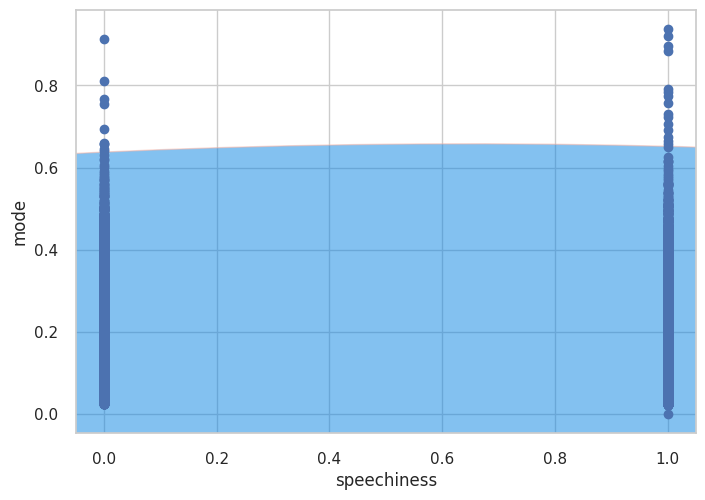

Index of Outliers: {2050, 9, 10251, 10252, 6160, 6163, 8211, 10259, 22, 4118, 10262, 10265, 12313, 6171, 14358, 29, 6173, 6174, 6175, 14367, 10275, 39, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 4150, 6199, 58, 59, 60, 61, 6200, 63, 64, 65, 6201, 67, 68, 6205, 10310, 14402, 72, 74, 2123, 77, 79, 14416, 2131, 6227, 8277, 14420, 14421, 14422, 2139, 14427, 10333, 4190, 10334, 14430, 97, 2145, 4193, 2148, 8294, 6249, 12394, 6251, 6252, 12398, 112, 4209, 115, 14453, 12410, 6269, 131, 2180, 4230, 8326, 12423, 4234, 12431, 8337, 14485, 14486, 12439, 14487, 12442, 8348, 10397, 6305, 14497, 2219, 12464, 14518, 4282, 6331, 12474, 14523, 14527, 12482, 14530, 10439, 204, 205, 12496, 6354, 12498, 10454, 4312, 6361, 4314, 6362, 8409, 10456, 4318, 6366, 6368, 10459, 10465, 12514, 6377, 10474, 6379, 8428, 14581, 8438, 8439, 12537, 252, 10494, 12544, 14592, 14598, 10510, 6415, 4369, 6420, 289, 6434, 12578, 12579, 8485, 12580, 14632, 4393, 4394, 14634, 2348, 10544, 4408, 10554, 8507, 6460, 326, 10567, 

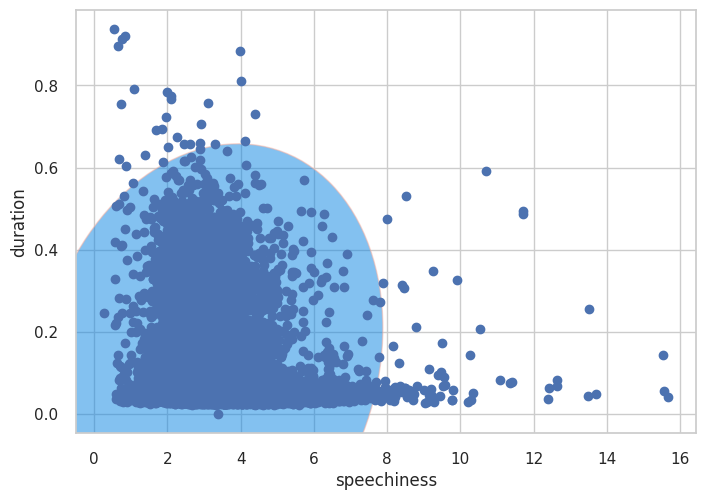

Index of Outliers: {13312, 10760, 8714, 5643, 3090, 6163, 7187, 8211, 10259, 1561, 10787, 2597, 39, 12840, 10795, 2609, 9777, 3125, 4150, 11829, 12341, 2617, 1597, 3645, 8767, 10820, 12868, 3654, 12870, 15428, 15945, 2123, 6734, 14416, 2139, 11355, 11357, 4190, 9311, 14427, 4193, 11873, 4707, 2148, 14430, 14949, 15459, 12906, 4204, 5229, 15472, 1650, 15479, 15480, 1660, 15485, 10878, 14978, 1668, 2180, 7302, 6791, 11914, 6795, 1676, 7820, 16013, 10899, 9366, 12439, 2712, 5785, 10908, 10397, 3231, 14497, 16037, 12968, 10923, 12464, 15025, 5301, 13495, 14523, 2239, 15551, 11457, 12482, 14530, 11460, 15041, 15049, 3274, 5834, 16076, 205, 7888, 8913, 9941, 5335, 4312, 8409, 4314, 11997, 7392, 9952, 15589, 11498, 15082, 8428, 7411, 14581, 15607, 2813, 12030, 7423, 1792, 12544, 14592, 11012, 2823, 5896, 15112, 13066, 16135, 6415, 1296, 4369, 4882, 7440, 4884, 6420, 13079, 1307, 1317, 10022, 14632, 3886, 7476, 3382, 7991, 4408, 5437, 10047, 7492, 9028, 10567, 4936, 14670, 3409, 15709, 10084, 

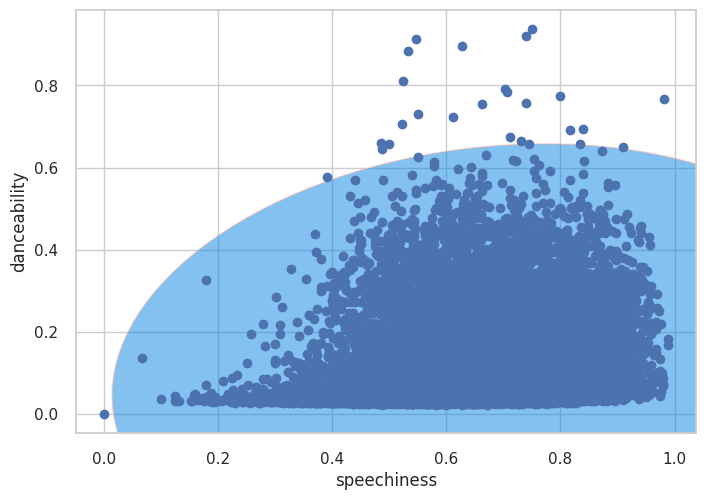

Index of Outliers: {13312, 4613, 10760, 9, 8714, 5643, 3090, 6163, 7187, 8211, 10259, 10787, 2597, 7717, 12840, 10795, 9777, 12341, 4150, 2617, 1597, 3645, 8767, 10820, 12868, 3654, 12870, 15428, 15945, 2123, 6734, 14416, 11348, 2139, 11355, 11357, 4190, 14427, 14430, 4193, 11873, 15459, 2148, 14436, 14949, 12906, 15472, 1650, 15479, 15480, 1660, 15485, 10878, 11904, 14978, 1668, 2180, 7302, 6791, 14984, 6795, 1676, 3728, 10899, 9366, 12439, 2712, 5785, 12441, 10908, 10397, 14497, 16037, 12968, 2219, 10923, 12971, 6318, 12464, 15025, 5301, 14523, 2239, 15551, 11457, 12482, 14530, 11460, 15041, 13512, 3274, 16076, 205, 7888, 8913, 9941, 5335, 4312, 8409, 4314, 11997, 7392, 3298, 4834, 15589, 15082, 8428, 14581, 2813, 12030, 7423, 14592, 11012, 2823, 5896, 15112, 13066, 2827, 6415, 7440, 4369, 4882, 4884, 6420, 13079, 1307, 1317, 2342, 10022, 5928, 14632, 813, 4912, 11255, 7476, 3382, 4408, 5437, 10047, 10567, 4936, 14670, 3409, 15709, 12647, 873, 11114, 3435, 4459, 877, 12650, 4463, 106

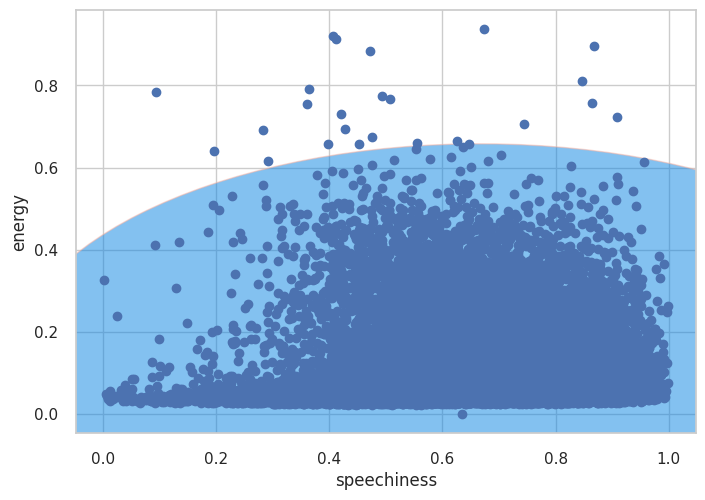

Index of Outliers: {9, 12298, 6163, 8211, 10259, 14358, 6171, 6172, 2100, 12341, 4150, 14391, 8249, 14393, 14394, 14395, 14396, 14397, 6212, 2118, 2123, 77, 14416, 14421, 14422, 2139, 14427, 4190, 14430, 4193, 2148, 6249, 107, 8300, 8301, 14450, 14453, 8311, 4220, 4225, 2180, 12430, 14485, 14486, 12439, 14487, 14488, 10397, 2207, 14497, 8365, 6318, 12464, 6321, 8373, 14523, 2239, 8383, 8384, 8385, 8386, 8387, 12482, 14530, 8396, 205, 8397, 8398, 8399, 8400, 8996, 12496, 12500, 12501, 4312, 8409, 4314, 10462, 10465, 2275, 14564, 230, 8428, 14581, 13075, 14588, 14592, 10502, 14601, 14602, 13079, 6415, 4369, 12563, 6420, 6975, 4381, 12579, 2342, 2344, 14632, 12597, 4408, 317, 14654, 15124, 10567, 12622, 14670, 8528, 15129, 12637, 2398, 2402, 12647, 12650, 4459, 4463, 10607, 10612, 2421, 6521, 12667, 14721, 2435, 14729, 8587, 10638, 2447, 14744, 8601, 8602, 8605, 8606, 8607, 8612, 8616, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 12725, 6582, 4537, 442, 2494, 8638, 10687, 1

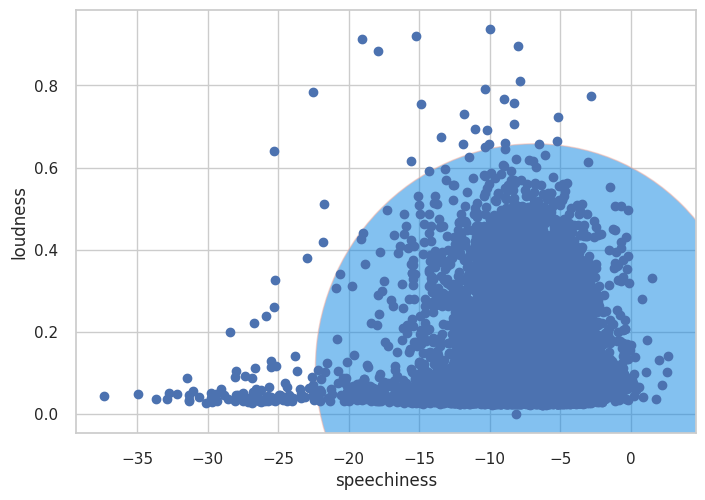

Index of Outliers: {13312, 4613, 8198, 10760, 8714, 5643, 12298, 7182, 13326, 3090, 6163, 7187, 8211, 10259, 1561, 3104, 10787, 2597, 7717, 12840, 10795, 556, 8748, 558, 9777, 3125, 4150, 11829, 4664, 2617, 12341, 14907, 3645, 8767, 10820, 12868, 12870, 2123, 6734, 12879, 14416, 83, 11348, 2139, 10843, 11355, 3166, 4190, 9311, 4193, 11357, 4707, 2148, 11873, 13757, 13758, 14436, 14949, 12906, 15459, 11887, 1650, 8311, 1656, 11897, 15479, 15480, 1660, 10878, 11904, 14978, 1668, 2180, 7302, 6791, 14984, 6795, 1676, 7820, 3728, 9366, 12439, 2712, 5785, 10908, 10397, 3231, 6305, 14497, 16037, 8872, 12968, 2219, 10923, 12971, 11440, 12464, 15025, 5301, 11447, 2746, 14523, 2239, 14527, 11457, 12482, 15041, 11460, 15551, 16076, 205, 8913, 1234, 2261, 9941, 5335, 4312, 8409, 4314, 7386, 11993, 11997, 13017, 7392, 230, 7678, 11498, 15082, 8428, 7411, 14581, 15607, 15101, 12030, 7423, 14592, 3844, 11012, 2823, 5896, 15112, 2827, 6926, 6415, 1296, 4369, 4882, 7440, 6420, 12559, 1307, 2848, 3873, 

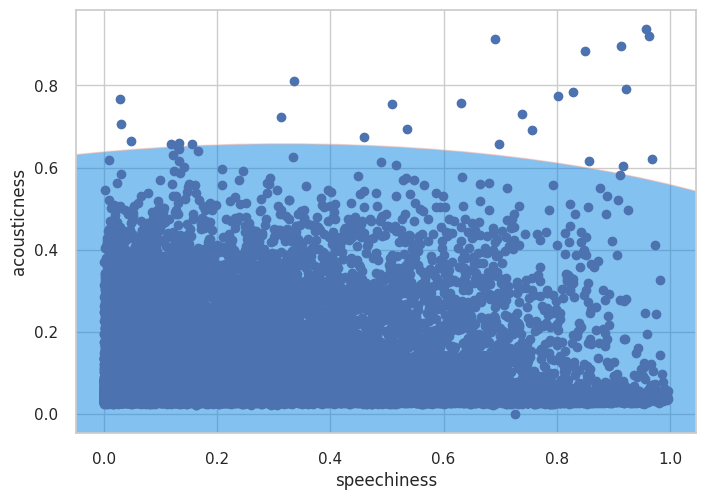

Index of Outliers: {2055, 6163, 8211, 10259, 6170, 6171, 8223, 10272, 8238, 6192, 12341, 4150, 6198, 8246, 8249, 6202, 6203, 14391, 14396, 14400, 8257, 74, 2123, 77, 14416, 14417, 8274, 12377, 2139, 14427, 4190, 14430, 4193, 2148, 10342, 8296, 6249, 10350, 6269, 2180, 8326, 6288, 14485, 14486, 12439, 4248, 12440, 14487, 14488, 10397, 2207, 14497, 14504, 6315, 4272, 10416, 12464, 6329, 14523, 11028, 2239, 2240, 8383, 8384, 8385, 8386, 8387, 12482, 14530, 14534, 8396, 205, 8397, 8398, 8399, 10444, 12501, 10454, 4312, 8409, 4314, 10459, 224, 10465, 10471, 10474, 235, 236, 8428, 8431, 10479, 12528, 14581, 14585, 14588, 14592, 4353, 258, 260, 8457, 13079, 6415, 12560, 4369, 2323, 6420, 4381, 8482, 12580, 14632, 12586, 6444, 10540, 2354, 4407, 4408, 14654, 10560, 10567, 6476, 14670, 6486, 14680, 12647, 4459, 8555, 4463, 10607, 10612, 2421, 12667, 4486, 14729, 12684, 12692, 14744, 413, 4509, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8623, 8624, 8625, 

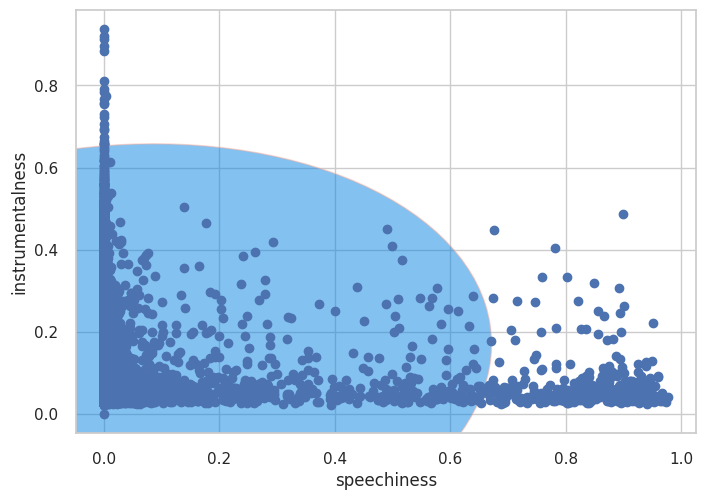

Index of Outliers: {14336, 10252, 10254, 6163, 8211, 10259, 12309, 6168, 4126, 39, 10281, 4140, 4144, 12341, 4150, 2106, 6210, 14409, 4171, 8268, 4173, 14416, 4179, 8276, 14427, 4190, 14430, 4193, 2148, 12396, 4220, 2176, 2180, 6278, 10397, 160, 8353, 8359, 12460, 10413, 12464, 6321, 8376, 14523, 12482, 14530, 14537, 205, 4312, 8409, 4314, 8420, 8421, 6374, 8428, 14581, 10489, 8448, 14592, 258, 14606, 6415, 12559, 4369, 10516, 10518, 10521, 10527, 2342, 14632, 14633, 8502, 4408, 10567, 14670, 10585, 6499, 8552, 4459, 10603, 4463, 10607, 8562, 8564, 2421, 12667, 4488, 14728, 14729, 4499, 12725, 6582, 12726, 442, 12737, 8650, 6603, 14796, 8659, 8660, 8665, 14812, 4575, 8680, 10729, 10732, 4596, 12790, 4600, 10745, 2553, 507, 10749, 6658, 12807, 10760, 4617, 8714, 4620, 525, 4621, 14860, 10770, 6677, 12823, 8729, 10778, 4641, 10787, 2597, 8741, 12840, 10795, 4655, 2608, 6707, 2617, 10812, 12861, 8767, 2624, 10815, 10820, 4678, 4679, 10822, 12870, 8779, 6734, 8783, 12878, 8785, 14927, 2644

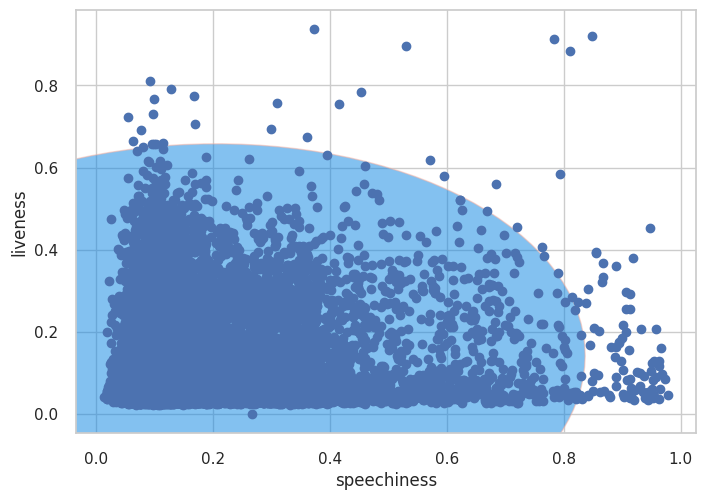

Index of Outliers: {13312, 10760, 8714, 5643, 7182, 3090, 6163, 7187, 8211, 10259, 10787, 4644, 2597, 12840, 10795, 9777, 12341, 4150, 2617, 1597, 3645, 8767, 10820, 5189, 3654, 12868, 12870, 15428, 15945, 6734, 14416, 2139, 14427, 11357, 4190, 14942, 4193, 11873, 4707, 2148, 14949, 15459, 12906, 5229, 11887, 1650, 14966, 15479, 15480, 1660, 15485, 15486, 14978, 1668, 2180, 7302, 6791, 6795, 1676, 16013, 9366, 12439, 2712, 5785, 12441, 10908, 10397, 14497, 16037, 2726, 12968, 10923, 12464, 15025, 5301, 14523, 15551, 11457, 12482, 14530, 11460, 15041, 3274, 15052, 205, 16076, 9941, 5335, 4312, 8409, 4314, 13017, 11997, 7392, 3298, 15589, 15082, 8428, 14581, 15607, 11516, 2813, 12030, 14592, 11012, 2823, 5896, 15112, 13066, 6415, 7440, 3345, 4369, 4882, 13079, 1307, 1317, 10022, 14632, 7476, 3382, 7991, 4408, 5437, 10567, 4936, 14670, 3409, 15709, 873, 4459, 877, 15213, 4463, 10607, 2421, 8053, 9079, 7032, 13176, 9082, 12667, 5500, 3965, 15227, 9604, 12166, 14729, 14219, 13198, 5009, 101

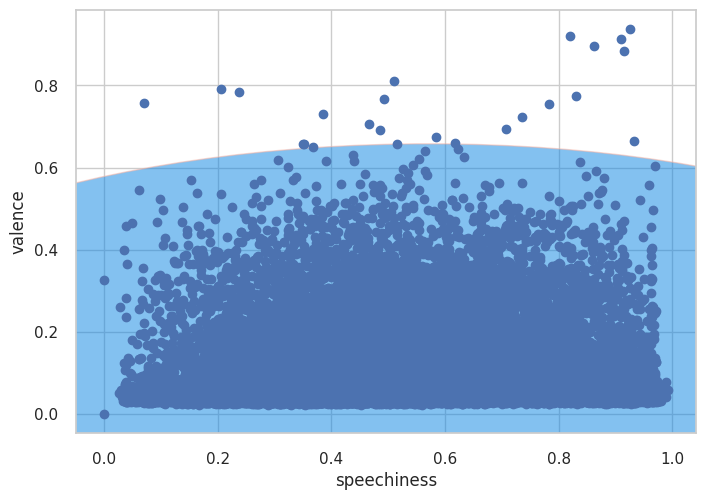

Index of Outliers: {13312, 12804, 10760, 9, 8714, 5643, 7182, 3090, 6163, 7187, 8211, 10259, 15898, 7713, 10787, 4644, 2597, 39, 12840, 10795, 8748, 2609, 9777, 12341, 4150, 2617, 1597, 3645, 8767, 10820, 12868, 3654, 12870, 15428, 15945, 2123, 6734, 14927, 14416, 2139, 10843, 11355, 4190, 9311, 11357, 4193, 11873, 4707, 2148, 14430, 14942, 14949, 15459, 12906, 4204, 5229, 15472, 1650, 14966, 8311, 15479, 15480, 1660, 11388, 10878, 15485, 11904, 15486, 14978, 1668, 2180, 7302, 6791, 6795, 1676, 7820, 16013, 3728, 10899, 9366, 2712, 5785, 10908, 10397, 3231, 14497, 16037, 12968, 2219, 10923, 12464, 15025, 6322, 5301, 14523, 14527, 15551, 11457, 12482, 14530, 11460, 15041, 6854, 15049, 3274, 5834, 16076, 205, 7888, 8913, 12496, 9941, 5335, 4312, 8409, 4314, 7386, 8924, 11484, 11997, 7392, 3298, 15589, 11498, 15082, 8428, 14581, 15607, 2813, 12030, 7423, 1792, 12544, 14592, 11012, 2823, 5896, 15112, 13066, 2827, 16135, 6415, 7440, 4369, 4882, 4884, 6420, 13079, 1307, 2848, 1317, 10022, 74

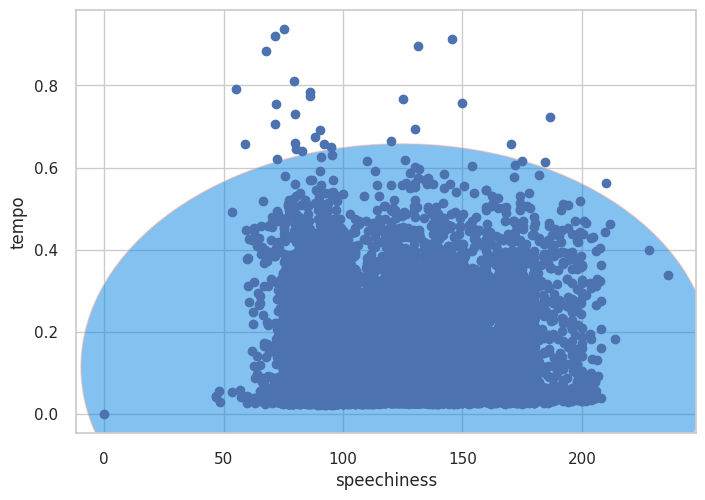

Index of Outliers: {2055, 10259, 6170, 6171, 8223, 10272, 8238, 6192, 6198, 8246, 14391, 8249, 6202, 6203, 14396, 14400, 8257, 74, 77, 14417, 8274, 12377, 10342, 8296, 6249, 10350, 6269, 8326, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 14504, 6315, 4272, 10416, 6329, 11028, 2239, 2240, 8384, 8385, 8386, 8387, 8383, 14534, 8396, 8397, 8398, 8399, 10444, 12501, 10454, 10459, 224, 10465, 10471, 10474, 235, 236, 8431, 10479, 12528, 14585, 14588, 4353, 258, 260, 8457, 12560, 2323, 4381, 8482, 12580, 12586, 6444, 10540, 2354, 4407, 14654, 10560, 6476, 6486, 14680, 8555, 4486, 12684, 12692, 413, 4509, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8624, 8623, 8625, 8626, 10673, 12720, 14766, 4537, 2493, 8638, 12739, 8648, 15153, 4565, 4567, 2524, 8671, 8673, 12715, 6630, 12773, 492, 494, 10736, 497, 505, 6674, 12822, 12835, 8757, 4683, 8792, 12891, 10844, 12893, 12894, 12895, 2676, 8823, 12922, 8849, 12952, 4767, 12959, 15009, 8875, 8876, 2735, 1

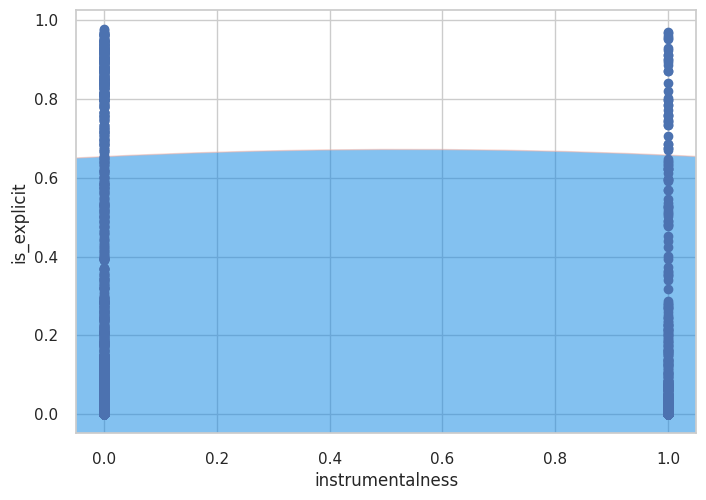

Index of Outliers: {2055, 10259, 6170, 6171, 8223, 10272, 8238, 6192, 6198, 8246, 14391, 8249, 6202, 6203, 14396, 14400, 8257, 74, 77, 14417, 8274, 12377, 10342, 8296, 6249, 10350, 6269, 8326, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 14504, 6315, 4272, 10416, 6329, 11028, 2239, 2240, 8384, 8385, 8386, 8387, 8383, 14534, 8396, 8397, 8398, 8399, 10444, 12501, 10454, 10459, 224, 10465, 10471, 10474, 235, 236, 8431, 10479, 12528, 14585, 14588, 4353, 258, 260, 8457, 12560, 2323, 4381, 8482, 12580, 12586, 6444, 10540, 2354, 4407, 14654, 10560, 6476, 6486, 14680, 8555, 4486, 12684, 12692, 413, 4509, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8624, 8623, 8625, 8626, 10673, 12720, 14766, 4537, 2493, 8638, 12739, 8648, 15153, 4565, 4567, 2524, 8671, 8673, 12715, 6630, 12773, 492, 494, 10736, 497, 505, 6674, 12822, 12835, 8757, 4683, 8792, 12891, 10844, 12893, 12894, 12895, 8823, 12922, 8849, 12952, 4767, 12959, 15009, 8875, 8876, 2735, 15031, 

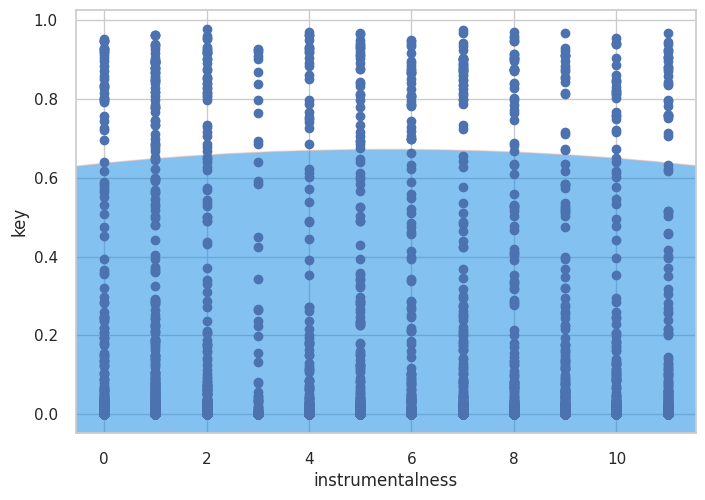

Index of Outliers: {1, 8198, 14, 28, 8223, 32, 35, 37, 8232, 42, 44, 8238, 8242, 8246, 8249, 60, 8254, 8257, 74, 75, 8267, 77, 8270, 80, 8274, 8292, 8293, 8296, 8302, 111, 117, 8316, 8319, 8326, 8329, 8332, 8347, 173, 8379, 8381, 190, 8383, 8384, 8385, 8386, 8387, 8395, 8396, 8397, 8398, 8399, 8400, 8404, 224, 8420, 235, 236, 239, 8431, 258, 260, 8457, 268, 8460, 8470, 289, 8482, 310, 8519, 352, 8545, 361, 8555, 376, 8569, 387, 388, 389, 391, 394, 396, 397, 400, 404, 413, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 8633, 8638, 456, 8648, 473, 474, 475, 8671, 8673, 492, 493, 494, 8688, 497, 8689, 8693, 503, 505, 8714, 8723, 8726, 555, 8757, 574, 600, 8792, 8802, 8811, 8823, 633, 644, 8844, 8849, 8852, 668, 670, 8875, 8876, 685, 706, 8899, 8902, 8903, 8905, 8908, 729, 731, 732, 8923, 8924, 737, 745, 8941, 750, 756, 771, 772, 776, 777, 779, 805, 8998, 813, 9006, 9007, 9015, 830, 9023, 833, 838, 840, 843, 9036, 847, 9041, 849, 850, 

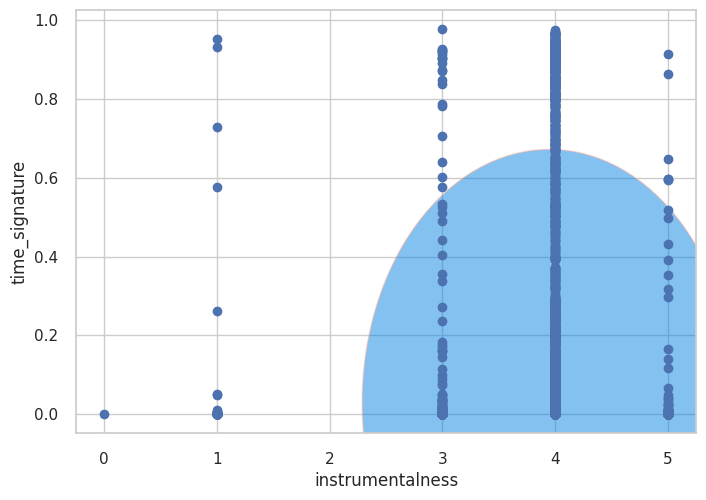

Index of Outliers: {2055, 10259, 6170, 6171, 8223, 10272, 8238, 6192, 6198, 8246, 14391, 8249, 6202, 6203, 14396, 14400, 8257, 74, 77, 14417, 8274, 12377, 10342, 8296, 6249, 10350, 6269, 8326, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 14504, 6315, 4272, 10416, 6329, 11028, 2239, 2240, 8384, 8385, 8386, 8387, 8383, 14534, 8396, 8397, 8398, 8399, 10444, 12501, 10454, 10459, 224, 10465, 10471, 10474, 235, 236, 8431, 10479, 12528, 14585, 14588, 4353, 258, 260, 8457, 12560, 2323, 4381, 8482, 12580, 12586, 6444, 10540, 2354, 4407, 14654, 10560, 6476, 6486, 14680, 8555, 10622, 4486, 12684, 12692, 413, 4509, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8624, 8623, 8625, 8626, 10673, 12720, 14766, 4537, 2493, 8638, 12739, 8648, 15153, 4565, 4567, 2524, 8671, 8673, 12715, 6630, 12773, 492, 494, 10736, 497, 505, 6674, 12822, 12835, 8757, 4683, 8792, 12891, 10844, 12893, 12894, 12895, 2671, 8823, 12922, 8849, 12952, 4767, 12959, 15009, 8875, 8876, 

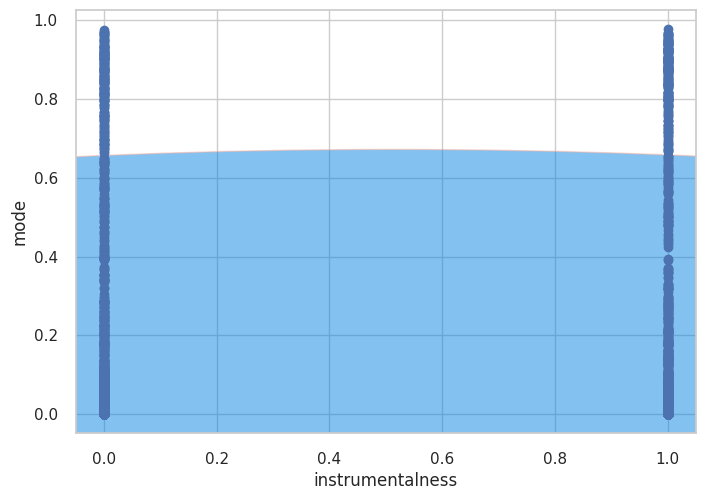

Index of Outliers: {2050, 2055, 9, 10251, 6160, 10259, 4118, 10262, 14358, 10265, 6170, 6171, 12313, 6173, 6174, 6175, 8223, 10270, 10272, 10275, 14367, 8238, 2095, 6192, 2097, 50, 51, 2098, 53, 54, 55, 6198, 6199, 58, 59, 60, 61, 6200, 63, 64, 65, 6201, 67, 68, 6205, 8257, 10310, 72, 14400, 74, 77, 79, 80, 14417, 8274, 2131, 6227, 8277, 14420, 14421, 14422, 12377, 15145, 10333, 10334, 2145, 10342, 8296, 6249, 12394, 6251, 6252, 8301, 10350, 12398, 112, 14450, 115, 14453, 12410, 6269, 131, 4230, 8326, 12423, 4234, 14477, 12431, 6288, 8337, 14485, 14486, 14487, 4248, 12440, 12442, 14488, 8348, 2207, 6305, 14504, 6315, 4272, 10416, 14518, 6329, 4282, 6331, 12474, 11028, 2239, 2240, 8383, 8384, 8385, 8386, 8387, 14534, 10439, 204, 8396, 8397, 8398, 8399, 10444, 6354, 12498, 12501, 10454, 10456, 6361, 6362, 10459, 4318, 224, 6368, 10465, 12514, 10471, 6377, 10474, 235, 236, 6379, 4334, 8431, 10479, 12528, 14581, 8438, 8439, 12537, 14585, 252, 14588, 10494, 4353, 258, 260, 14598, 8457, 1050

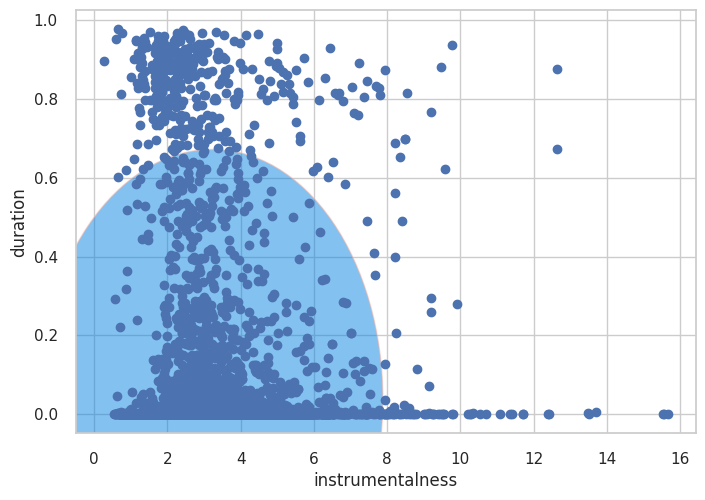

Index of Outliers: {2055, 10259, 6170, 6171, 8223, 10272, 8238, 6192, 6198, 8246, 14391, 8249, 6202, 6203, 14396, 14400, 8257, 74, 77, 14417, 8274, 12377, 10342, 8296, 6249, 10350, 6269, 8326, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 14504, 6315, 4272, 10416, 6329, 11028, 2239, 2240, 8384, 8385, 8386, 8387, 8383, 14534, 8396, 8397, 8398, 8399, 10444, 12501, 10454, 10459, 224, 10465, 10471, 10474, 235, 236, 8431, 10479, 12528, 14585, 14588, 4353, 258, 260, 8457, 12560, 2323, 4381, 8482, 12580, 12586, 6444, 10540, 2354, 4407, 14654, 10560, 6476, 6486, 14680, 8555, 10622, 4486, 12684, 12692, 413, 4509, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8623, 8624, 8625, 8626, 10673, 12720, 14766, 4537, 2493, 8638, 12739, 8648, 15153, 4565, 4567, 2524, 8671, 8673, 12715, 6630, 12773, 492, 494, 10736, 497, 505, 6674, 12822, 12835, 8757, 4683, 8792, 12891, 10844, 12893, 12894, 12895, 614, 2671, 8823, 12922, 8849, 12952, 4767, 12959, 15009, 8875, 8

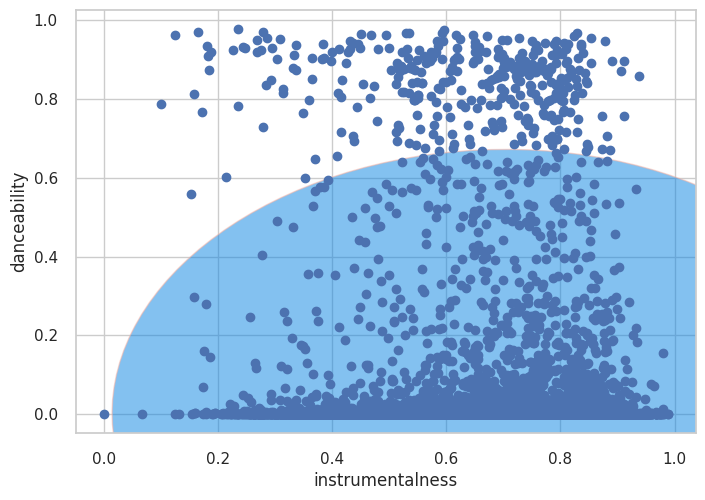

Index of Outliers: {2055, 10259, 6170, 6171, 8223, 10272, 8238, 6192, 6198, 8246, 14391, 8249, 6202, 6203, 14396, 14400, 8257, 74, 77, 14417, 8274, 12377, 10342, 8296, 6249, 10350, 8310, 6269, 8326, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 14504, 6315, 4272, 10416, 6329, 11028, 2239, 2240, 8384, 8385, 8386, 8387, 8383, 14534, 8396, 8397, 8398, 8399, 10444, 12501, 10454, 10459, 224, 10465, 10471, 10474, 235, 236, 8431, 10479, 12528, 14585, 14588, 4353, 258, 260, 8457, 10507, 12560, 2323, 4381, 8482, 12580, 12586, 6444, 10540, 2354, 4407, 14654, 10560, 6476, 6486, 14680, 8555, 10622, 4486, 12684, 12692, 413, 4509, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8623, 8624, 8625, 8626, 10673, 12720, 14766, 4537, 2493, 8638, 12739, 8648, 15153, 4565, 4567, 2524, 8671, 8673, 12715, 6630, 12773, 492, 494, 10736, 497, 505, 6674, 12822, 12835, 8757, 4683, 8792, 12891, 10844, 12893, 12894, 12895, 2671, 8823, 12922, 8849, 12952, 4767, 12959, 15009,

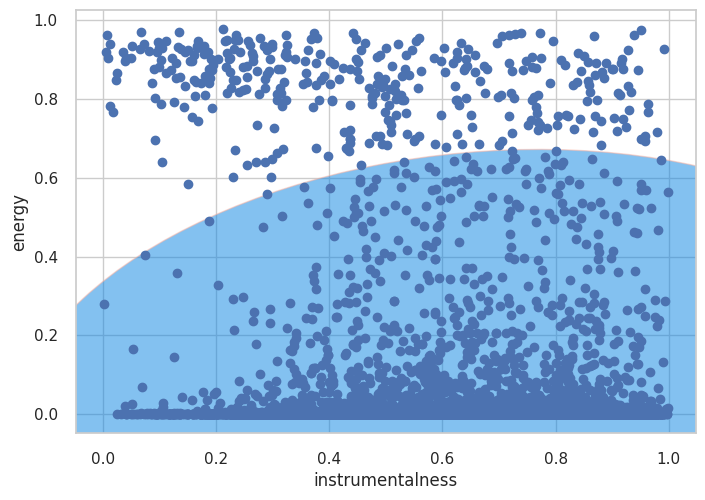

Index of Outliers: {2055, 10259, 14358, 6170, 6171, 6172, 8223, 10272, 8238, 6192, 2100, 6198, 8246, 14391, 8249, 6202, 6203, 14393, 14394, 14395, 14396, 14397, 8257, 14400, 6212, 2118, 74, 77, 14417, 6226, 8274, 14421, 14422, 12377, 10342, 8296, 6249, 107, 8300, 8301, 10350, 14450, 14453, 8310, 4220, 6269, 6945, 4225, 6946, 8326, 12430, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 14504, 6315, 8365, 4272, 6321, 10416, 8373, 6329, 11028, 2239, 2240, 8383, 8384, 8385, 8386, 8387, 14534, 8396, 8397, 8398, 8399, 8400, 10444, 12500, 12501, 10454, 4312, 10459, 10462, 224, 10465, 2275, 14564, 10471, 10474, 235, 236, 8431, 10479, 12528, 13075, 14585, 14588, 4353, 258, 260, 10502, 8457, 14601, 10507, 14602, 6974, 12560, 2323, 12563, 4381, 6977, 8482, 12579, 12580, 2342, 2344, 12586, 6444, 10540, 2354, 12597, 4407, 2361, 317, 14654, 15124, 10560, 10567, 6476, 12622, 8528, 6486, 14680, 12637, 2398, 8555, 10603, 10607, 6516, 6521, 10622, 2435, 4486, 4487, 8587, 12684, 2447, 12692, 6550, 8

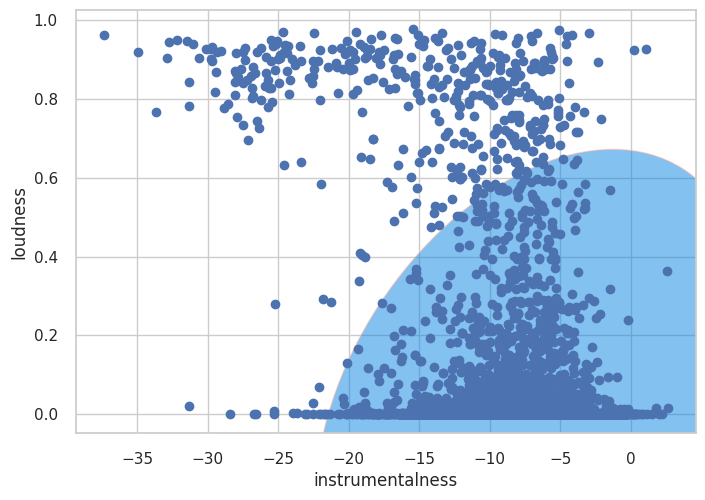

Index of Outliers: {2055, 6163, 8211, 10259, 6170, 6171, 8223, 10272, 8238, 6192, 12341, 4150, 6198, 8246, 8249, 6202, 6203, 14391, 14396, 14400, 8257, 74, 2123, 77, 14416, 14417, 8274, 12377, 2139, 14427, 4190, 14430, 4193, 2148, 10342, 8296, 6249, 10350, 6269, 2180, 8326, 6288, 14485, 14486, 12439, 4248, 12440, 14487, 14488, 10397, 2207, 14497, 14504, 6315, 4272, 10416, 12464, 6329, 14523, 11028, 2239, 2240, 8383, 8384, 8385, 8386, 8387, 12482, 14530, 14534, 8396, 205, 8397, 8398, 8399, 10444, 12501, 10454, 4312, 8409, 4314, 10459, 224, 10465, 10471, 10474, 235, 236, 8428, 8431, 10479, 12528, 14581, 14585, 14588, 14592, 4353, 258, 260, 8457, 13079, 6415, 12560, 4369, 2323, 6420, 4381, 8482, 12580, 14632, 12586, 6444, 10540, 2354, 4407, 4408, 14654, 10560, 10567, 6476, 14670, 6486, 14680, 12647, 4459, 8555, 4463, 10607, 10612, 2421, 12667, 4486, 14729, 12684, 12692, 14744, 413, 4509, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8623, 8624, 8625, 

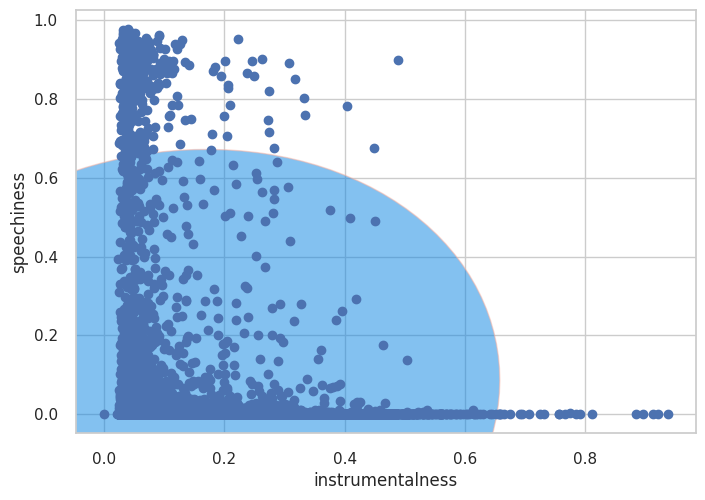

Index of Outliers: {2055, 10259, 6170, 6171, 8223, 10272, 8238, 6192, 6198, 8246, 14391, 8249, 6202, 6203, 14396, 14400, 8257, 74, 77, 14417, 8274, 12377, 10342, 8296, 6249, 10350, 6269, 8326, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 14504, 6315, 4272, 10416, 6329, 11028, 2239, 2240, 8384, 8385, 8386, 8387, 8383, 14534, 8396, 8397, 8398, 8399, 10444, 12501, 10454, 10459, 224, 10465, 10471, 10474, 235, 236, 8431, 10479, 12528, 14585, 14588, 4353, 258, 260, 8457, 12560, 2323, 6419, 4381, 8482, 12580, 12586, 6444, 10540, 2354, 4407, 14654, 10560, 6476, 6486, 14680, 8555, 10622, 4486, 12684, 12692, 413, 4509, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8624, 8623, 8625, 8626, 10673, 12720, 14766, 4537, 2493, 8638, 12739, 8648, 15153, 4565, 4567, 2524, 8671, 8673, 12715, 6630, 12773, 492, 494, 10736, 497, 505, 6674, 12822, 12835, 8757, 4683, 8792, 12891, 10844, 12893, 12894, 12895, 8823, 12922, 8849, 12952, 4767, 12959, 15009, 8875, 8876, 

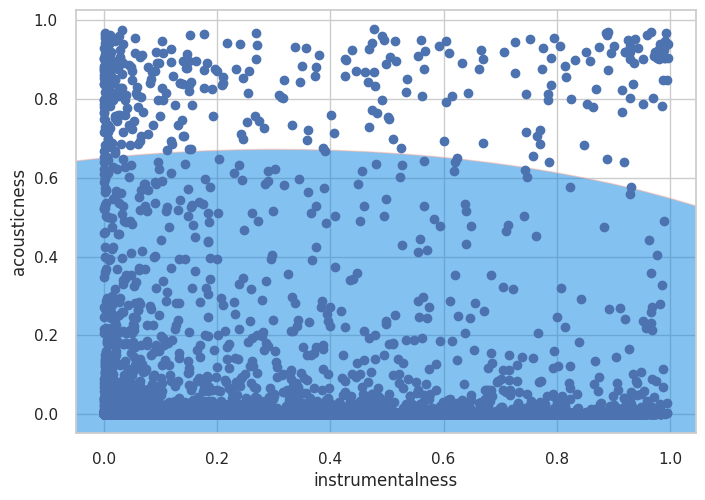

Index of Outliers: {2055, 10254, 10259, 12309, 6168, 6170, 6171, 8223, 10272, 37, 10281, 8238, 4144, 6192, 6198, 8246, 14391, 8249, 6202, 6203, 14396, 14400, 8257, 6210, 14409, 74, 4171, 77, 4173, 14417, 8274, 4179, 8276, 12377, 10342, 8296, 6249, 12396, 10350, 8310, 6269, 6278, 8326, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 160, 8353, 8359, 14504, 6315, 12460, 10413, 4272, 10416, 8376, 6329, 11028, 2239, 2240, 8383, 8384, 8385, 8386, 8387, 14534, 14537, 8396, 8397, 8398, 8399, 10444, 12501, 10454, 10459, 224, 10465, 10471, 10474, 235, 236, 8431, 10479, 12528, 10489, 14585, 14588, 4353, 258, 260, 8457, 12560, 2323, 10518, 10521, 4381, 10527, 8482, 12580, 12586, 6444, 10540, 2354, 8502, 4407, 11053, 14654, 10560, 4422, 10567, 6476, 6486, 14680, 10585, 8555, 10603, 10607, 8562, 8564, 10622, 4486, 4487, 4488, 12684, 12692, 413, 4509, 8605, 8606, 8609, 8610, 13109, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8623, 8624, 8625, 8626, 12715, 12720, 14766, 4537, 249

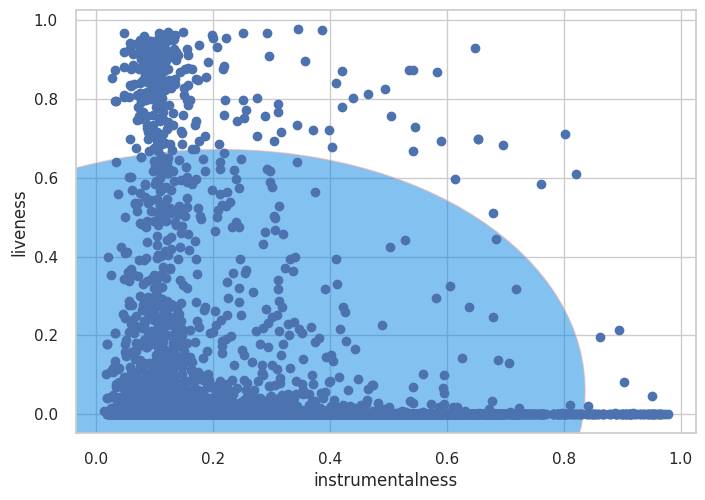

Index of Outliers: {2055, 10259, 6170, 6171, 8223, 10272, 8238, 6192, 6198, 8246, 14391, 8249, 6202, 6203, 14396, 14400, 8257, 74, 77, 14417, 8274, 12377, 10342, 8296, 6249, 10350, 8310, 6269, 8326, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 14504, 6315, 4272, 10416, 6329, 11028, 2239, 2240, 8384, 8385, 8386, 8387, 8383, 14534, 8396, 8397, 8398, 8399, 10444, 12501, 10454, 10459, 224, 10465, 10471, 10474, 235, 236, 8431, 10479, 12528, 14585, 14588, 4353, 258, 260, 8457, 12560, 2323, 4381, 8482, 12580, 12586, 6444, 10540, 2354, 4407, 14654, 10560, 6476, 6486, 14680, 8555, 10622, 4486, 12684, 12692, 413, 4509, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8624, 8623, 8625, 8626, 10673, 12720, 14766, 4537, 2493, 8638, 12739, 8648, 15153, 4565, 4567, 2524, 8671, 8673, 12715, 6630, 12773, 492, 494, 10736, 497, 505, 6674, 12822, 12835, 8757, 4683, 8792, 12891, 10844, 12893, 12894, 12895, 8823, 12922, 8849, 12952, 4767, 12959, 15009, 8875, 8876, 

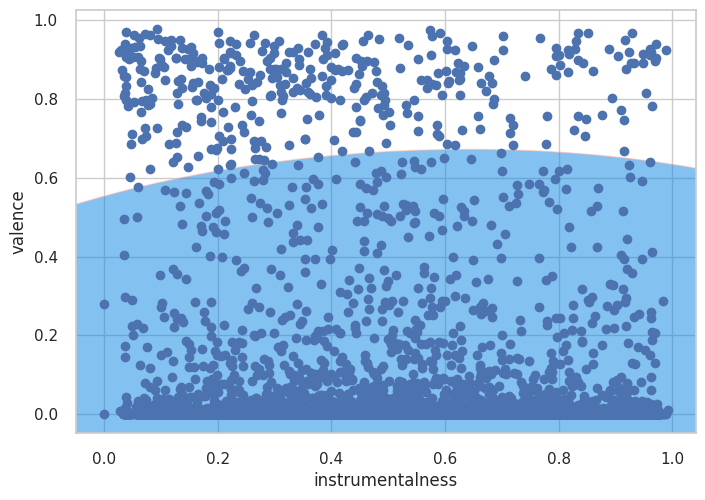

Index of Outliers: {2055, 10259, 6170, 6171, 8223, 10272, 8238, 6192, 6198, 8246, 14391, 8249, 6202, 6203, 14396, 14400, 8257, 74, 77, 14417, 8274, 12377, 10342, 8296, 6249, 10350, 8315, 6269, 8326, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 14504, 6315, 4272, 10416, 6329, 11028, 2239, 2240, 8384, 8385, 8386, 8387, 8383, 14534, 8396, 8397, 8398, 8399, 10444, 12501, 10454, 10459, 224, 10465, 10471, 10474, 235, 236, 8431, 10479, 12528, 14585, 14588, 4353, 258, 260, 8457, 12560, 2323, 4381, 8482, 12580, 12586, 6444, 10540, 2354, 4407, 14654, 10560, 6476, 6486, 14680, 8555, 4486, 12684, 12692, 413, 4509, 8605, 8606, 8609, 8610, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8624, 8623, 8625, 8626, 10673, 12720, 14766, 4537, 2493, 8638, 12739, 8648, 15153, 4565, 4567, 2524, 8671, 8673, 12715, 6630, 12773, 492, 494, 10736, 497, 505, 6674, 12822, 12835, 8757, 4683, 8792, 12891, 10844, 12893, 12894, 12895, 8823, 12922, 8849, 12952, 4767, 12959, 15009, 8875, 8876, 2735, 1

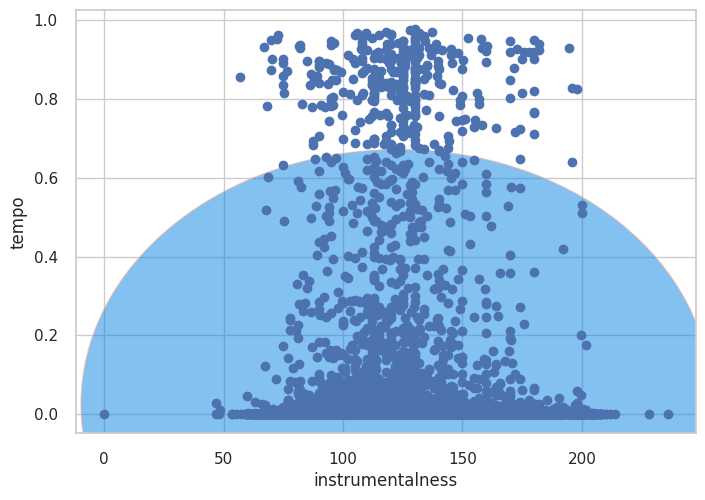

Index of Outliers: {6658, 4617, 4620, 525, 10252, 10254, 5653, 6677, 12309, 6168, 8729, 10778, 12823, 4126, 13855, 8741, 10281, 7211, 4655, 2608, 4144, 6707, 5176, 5180, 10812, 5182, 10815, 2624, 6210, 3142, 4678, 10822, 5193, 13386, 4171, 8779, 4173, 13902, 8783, 14409, 14926, 4179, 2644, 8276, 9301, 10843, 3681, 9825, 12396, 5233, 3189, 15479, 14968, 1657, 15995, 5757, 15997, 6785, 6278, 5255, 1672, 7305, 13961, 4748, 1678, 16015, 6800, 1683, 6804, 1685, 1687, 4761, 13465, 16025, 12957, 13983, 160, 6816, 8353, 3235, 2212, 8865, 1702, 8359, 10917, 12968, 12460, 10413, 9390, 13485, 12979, 13494, 3768, 6840, 8376, 3771, 1727, 12992, 1737, 14537, 1741, 9424, 14035, 8412, 6877, 5350, 6887, 13547, 7919, 12018, 8949, 16117, 16118, 10489, 258, 7428, 2822, 2828, 10516, 10518, 16152, 10521, 5406, 10527, 11550, 12067, 13604, 15652, 13606, 4904, 9001, 9513, 11562, 11053, 16173, 15153, 13109, 8502, 14134, 1336, 4921, 13630, 11074, 1859, 1860, 10567, 7503, 9554, 13650, 10585, 10074, 7012, 8552, 12

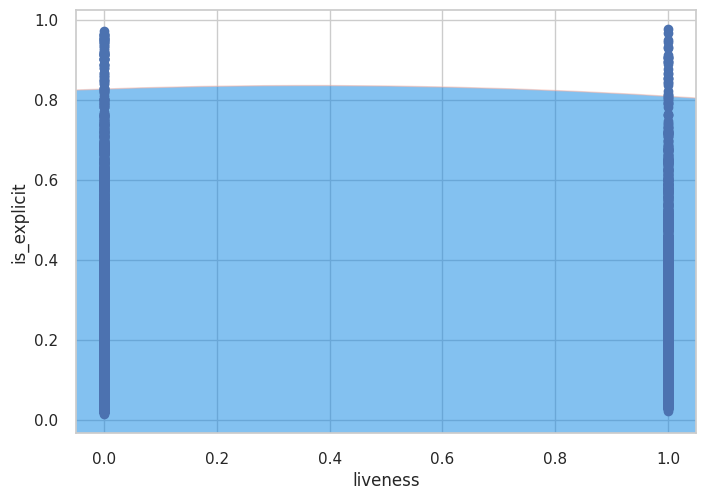

Index of Outliers: {6658, 4617, 11787, 4620, 525, 10252, 10254, 5653, 6677, 12309, 6168, 8729, 10778, 12823, 4126, 13855, 5155, 8740, 8741, 10281, 7211, 7213, 4655, 2608, 4144, 6707, 8756, 5176, 5180, 10812, 5182, 10815, 6210, 3142, 4678, 4679, 5193, 10822, 4171, 14409, 4173, 13902, 8783, 4179, 2644, 8276, 9301, 10843, 3681, 9825, 12396, 5233, 3189, 15479, 14968, 1657, 15995, 5757, 15997, 6785, 5253, 6278, 5255, 1672, 7305, 13961, 4748, 1678, 6800, 1683, 6804, 1685, 1687, 4761, 13465, 16025, 12957, 13983, 160, 6816, 8353, 3235, 8865, 10917, 1702, 8359, 12968, 12460, 10413, 9390, 13485, 12979, 3764, 13494, 3768, 6840, 8376, 3771, 1727, 12992, 1737, 14537, 1741, 9424, 14035, 8412, 6877, 2784, 5350, 6887, 13547, 7919, 12018, 16117, 10489, 15617, 258, 7428, 1798, 2828, 14606, 4883, 10518, 16152, 10521, 5406, 10527, 11550, 12067, 13604, 15652, 13606, 4904, 9001, 9513, 11562, 11053, 16173, 15153, 13109, 8502, 14134, 1336, 4921, 13630, 11074, 1859, 1860, 10567, 7503, 12113, 9554, 1875, 13650,

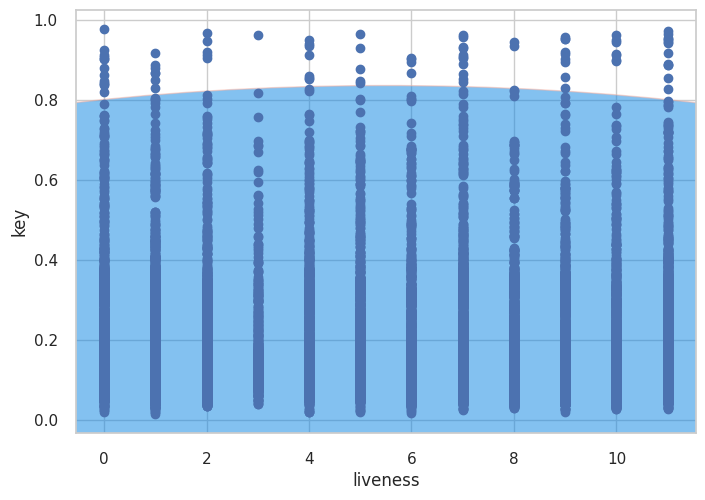

Index of Outliers: {1, 8198, 14, 28, 32, 35, 37, 8232, 42, 44, 8242, 8246, 60, 8254, 75, 8267, 8270, 80, 8274, 8276, 8292, 8293, 8302, 111, 117, 8316, 8319, 8329, 8332, 8347, 160, 8353, 8359, 173, 8376, 8379, 8381, 190, 8395, 8400, 8404, 8420, 239, 258, 268, 8460, 8470, 289, 310, 8502, 8519, 352, 8545, 361, 8562, 8564, 376, 8569, 387, 388, 389, 391, 394, 396, 397, 400, 404, 8618, 8623, 8633, 456, 8650, 8659, 473, 474, 475, 8665, 8680, 493, 8688, 8689, 8693, 503, 507, 8714, 8723, 8726, 8729, 8741, 555, 574, 8783, 8785, 600, 8802, 8811, 633, 644, 8844, 8852, 668, 670, 685, 706, 8899, 8902, 729, 731, 732, 8923, 8924, 737, 745, 8941, 750, 771, 772, 776, 777, 779, 8982, 805, 8998, 9001, 813, 9006, 9007, 9015, 9023, 833, 838, 840, 843, 847, 849, 850, 851, 9044, 9041, 853, 855, 856, 857, 859, 860, 864, 866, 868, 869, 9060, 874, 877, 9070, 9081, 905, 906, 9101, 912, 923, 9120, 9124, 9160, 975, 987, 991, 9200, 9201, 1010, 9216, 9217, 1046, 1049, 1062, 9261, 1071, 1072, 9265, 9269, 9277, 9278, 1

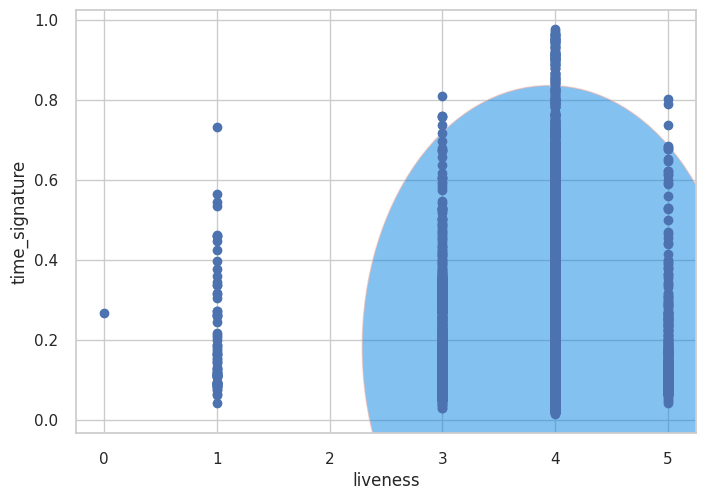

Index of Outliers: {6658, 4617, 4620, 525, 10252, 10254, 5653, 6677, 12309, 6168, 8729, 10778, 12823, 4126, 13855, 15905, 8741, 10281, 7211, 4655, 2608, 4144, 6707, 5176, 13880, 5180, 10812, 5182, 10815, 6210, 3142, 4678, 10822, 5193, 14409, 4171, 4173, 13902, 8783, 4179, 2644, 8276, 9301, 10843, 3681, 9825, 12396, 5233, 3189, 15479, 14968, 1657, 15995, 5757, 15997, 6785, 6278, 5255, 1672, 7305, 13961, 4748, 1678, 6800, 1683, 6804, 1685, 1687, 4761, 13465, 16025, 12957, 13983, 160, 6816, 8353, 3235, 8865, 10917, 1702, 8359, 12968, 12460, 10413, 9390, 13485, 12979, 13494, 3768, 6840, 8376, 3771, 1727, 12992, 1737, 14537, 1741, 14035, 8412, 6877, 2784, 5350, 6887, 13547, 7919, 12018, 8949, 16117, 10489, 258, 7428, 2822, 2828, 14606, 10518, 16152, 10521, 5406, 10527, 11550, 12067, 13604, 15652, 13606, 4904, 9001, 9513, 11562, 11053, 16173, 15153, 13109, 8502, 14134, 1336, 4921, 13630, 11074, 1859, 1860, 10567, 7503, 12113, 9554, 13650, 10585, 10074, 10594, 7012, 8552, 12137, 10603, 10607,

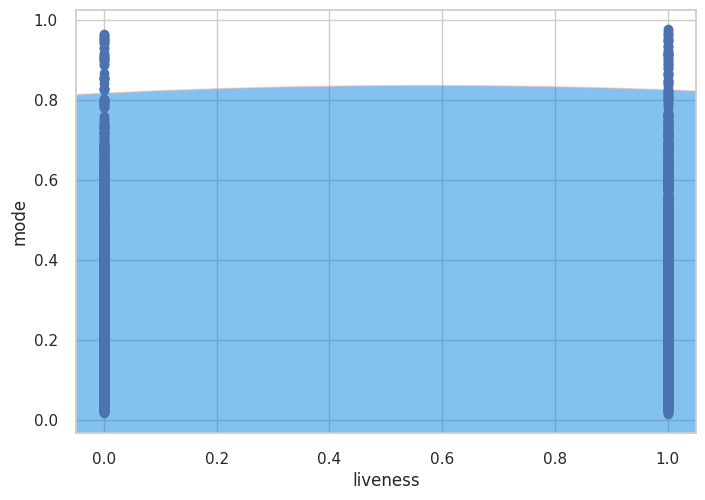

Index of Outliers: {2050, 6149, 9, 10251, 10252, 10254, 6160, 12309, 4118, 10262, 6168, 10265, 12313, 6171, 14358, 6173, 4126, 6174, 6175, 14365, 14367, 10275, 39, 10281, 2095, 4144, 2097, 50, 51, 2098, 53, 54, 55, 6192, 6199, 58, 59, 60, 61, 2109, 63, 64, 65, 4156, 67, 68, 6205, 6210, 8258, 72, 6217, 74, 4171, 10310, 77, 4173, 79, 80, 12362, 14409, 2131, 4179, 6227, 8276, 8277, 14420, 14421, 14422, 10333, 10334, 12384, 2145, 6249, 12394, 6251, 6252, 12396, 12398, 112, 4209, 115, 6259, 14453, 12410, 6269, 12416, 129, 131, 4230, 6278, 136, 8326, 4234, 12423, 6287, 12431, 145, 8337, 4243, 14485, 14486, 8343, 14487, 14488, 12442, 8348, 160, 2209, 6305, 8353, 6311, 8359, 12460, 8365, 10413, 2224, 14518, 8376, 4282, 6331, 12474, 10439, 6345, 14537, 204, 4300, 6354, 12498, 10454, 10456, 6361, 6362, 10459, 4318, 6368, 10465, 12514, 6377, 10474, 6379, 4334, 14581, 8438, 8439, 10489, 12537, 252, 2300, 8444, 10494, 6401, 258, 14598, 8457, 10510, 14606, 10512, 10516, 10518, 10521, 12571, 4381, 10

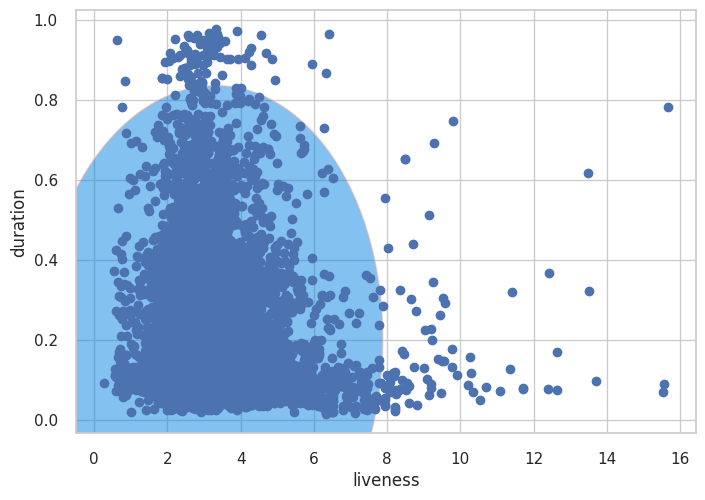

Index of Outliers: {6658, 4617, 4620, 525, 10254, 13841, 5653, 6677, 12309, 6168, 8729, 10778, 12823, 4126, 13855, 15905, 8741, 10281, 7211, 4655, 2608, 4144, 15920, 6707, 8756, 5176, 13880, 5180, 10812, 5182, 10815, 6210, 3142, 4678, 10822, 5193, 14409, 4171, 4173, 13902, 8783, 14926, 4179, 2644, 8276, 9301, 3681, 9825, 12396, 5233, 3189, 15479, 14968, 1657, 15995, 5757, 15997, 6785, 6278, 5255, 1672, 7305, 13961, 4748, 1678, 4751, 6800, 16015, 1683, 1685, 1687, 4761, 13465, 16025, 12957, 13983, 160, 6816, 8353, 3235, 8865, 10917, 1702, 8359, 12968, 12460, 10413, 9390, 13485, 12979, 5812, 13494, 13495, 3768, 6840, 8376, 3771, 1727, 1737, 14537, 1741, 9424, 14035, 8412, 6877, 5350, 6887, 13547, 7919, 12018, 16117, 10489, 15617, 258, 7428, 2828, 14606, 4883, 10518, 16152, 10521, 5406, 10527, 11550, 12067, 13604, 15652, 13606, 4904, 9001, 9513, 11562, 11053, 16173, 15153, 13109, 8502, 14134, 1336, 4921, 7483, 13630, 11074, 1859, 1860, 15171, 10567, 329, 7503, 9554, 13650, 10585, 10074, 1

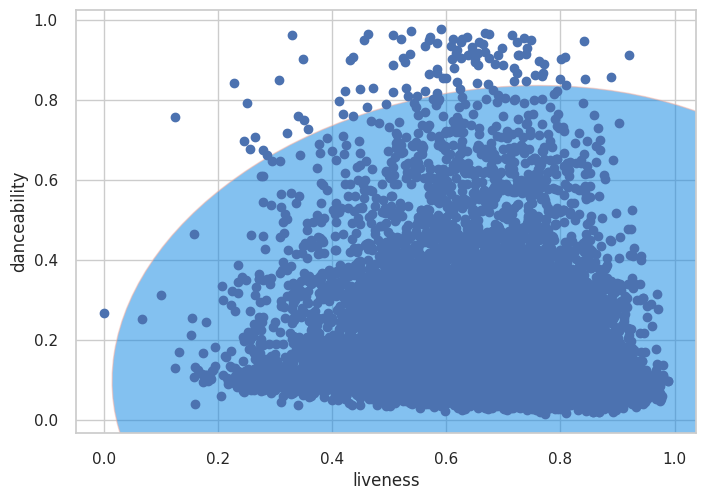

Index of Outliers: {6658, 4617, 4620, 525, 10254, 5653, 6677, 12309, 6168, 8729, 10778, 12823, 13855, 15905, 5155, 8741, 10281, 7211, 4655, 2608, 4144, 6707, 5176, 13880, 5180, 10812, 5182, 10815, 6210, 3142, 10822, 5193, 14409, 4171, 4173, 13902, 8783, 4179, 2644, 8276, 9301, 3681, 9825, 12396, 5233, 3189, 15479, 14968, 1657, 15995, 5757, 15997, 6785, 6278, 5255, 1672, 7305, 13961, 4748, 1678, 6800, 1683, 6804, 1685, 1687, 4761, 13465, 16025, 12957, 13983, 160, 6816, 8353, 3235, 8865, 10917, 1702, 8359, 12968, 12460, 10413, 9390, 13485, 12979, 13494, 3768, 6840, 8376, 3771, 12992, 1737, 14537, 1741, 14035, 6877, 2784, 5350, 6887, 13547, 7919, 12018, 9461, 16117, 10489, 258, 7428, 2828, 14606, 4883, 10518, 16152, 10521, 5406, 10527, 11550, 12067, 13604, 15652, 13606, 4904, 9001, 9513, 11562, 11053, 16173, 15153, 14130, 13109, 8502, 14134, 1336, 4921, 13630, 4415, 11074, 1859, 1860, 15171, 10567, 7503, 9554, 13650, 10585, 10074, 14169, 7012, 2920, 8552, 12137, 10603, 14188, 10607, 8562,

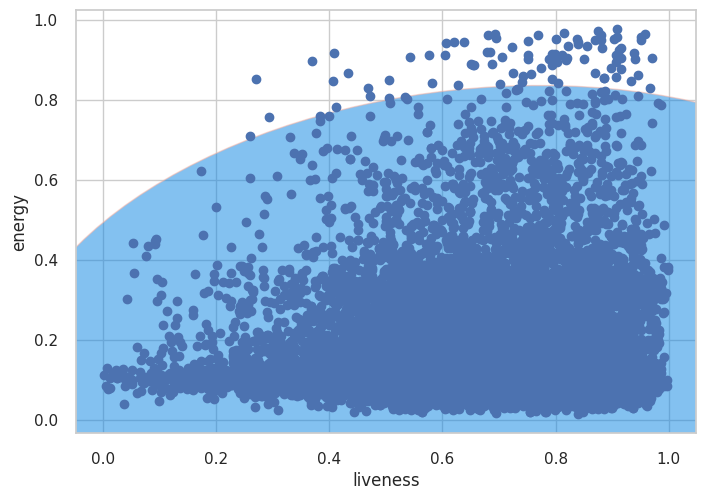

Index of Outliers: {10254, 6163, 12309, 14358, 6168, 6171, 6172, 4126, 10281, 4144, 2100, 14391, 8249, 14393, 14394, 14395, 14396, 14397, 6210, 6212, 2118, 14409, 4171, 77, 4173, 4179, 8276, 14421, 14422, 6249, 107, 8300, 12396, 14450, 14453, 4220, 4225, 6278, 12430, 14485, 14486, 14487, 14488, 2207, 160, 8353, 8359, 12460, 8365, 10413, 6321, 8373, 8376, 8383, 8384, 8385, 8386, 8387, 14537, 8396, 8397, 8398, 8399, 8400, 12500, 12501, 4312, 4314, 10462, 10465, 2275, 14564, 13075, 10489, 14588, 258, 10502, 14601, 14602, 14606, 12563, 10518, 10521, 4381, 10527, 12579, 2342, 2344, 12597, 8502, 11053, 317, 14654, 15124, 10567, 12622, 8528, 10585, 2395, 12637, 2398, 2402, 8552, 10603, 10607, 8562, 8564, 10612, 6521, 2435, 4488, 8587, 2447, 8601, 8602, 8605, 8606, 8607, 13109, 8612, 11074, 8616, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 4537, 442, 8638, 12737, 13115, 12739, 8650, 460, 462, 15153, 8659, 4567, 4569, 474, 8665, 479, 4575, 4578, 487, 8680, 12776, 502, 12790, 107

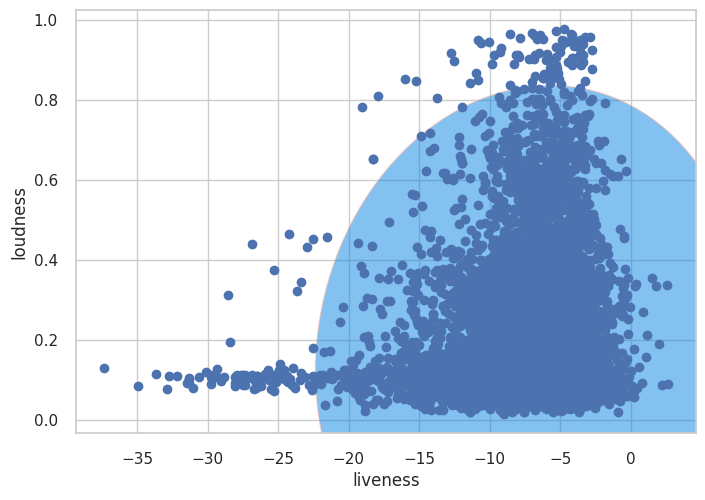

Index of Outliers: {14336, 10252, 10254, 6163, 8211, 10259, 12309, 6168, 4126, 39, 10281, 4140, 4144, 12341, 4150, 2106, 6210, 14409, 4171, 8268, 4173, 14416, 4179, 8276, 14427, 4190, 14430, 4193, 2148, 12396, 4220, 2176, 2180, 6278, 10397, 160, 8353, 8359, 12460, 10413, 12464, 6321, 8376, 14523, 12482, 14530, 14537, 205, 4312, 8409, 4314, 8420, 8421, 6374, 8428, 14581, 10489, 8448, 14592, 258, 14606, 6415, 12559, 4369, 10516, 10518, 10521, 10527, 2342, 14632, 14633, 8502, 4408, 10567, 14670, 10585, 6499, 8552, 4459, 10603, 4463, 10607, 8562, 8564, 2421, 12667, 4488, 14728, 14729, 4499, 12725, 6582, 12726, 442, 12737, 8650, 6603, 14796, 8659, 8660, 8665, 14812, 4575, 8680, 10729, 10732, 4596, 12790, 4600, 10745, 2553, 507, 10749, 6658, 12807, 10760, 4617, 8714, 4620, 525, 4621, 14860, 10770, 6677, 12823, 8729, 10778, 4641, 10787, 2597, 8741, 12840, 10795, 4655, 2608, 6707, 2617, 10812, 12861, 8767, 2624, 10815, 10820, 4678, 4679, 10822, 12870, 8779, 6734, 8783, 12878, 8785, 14927, 2644

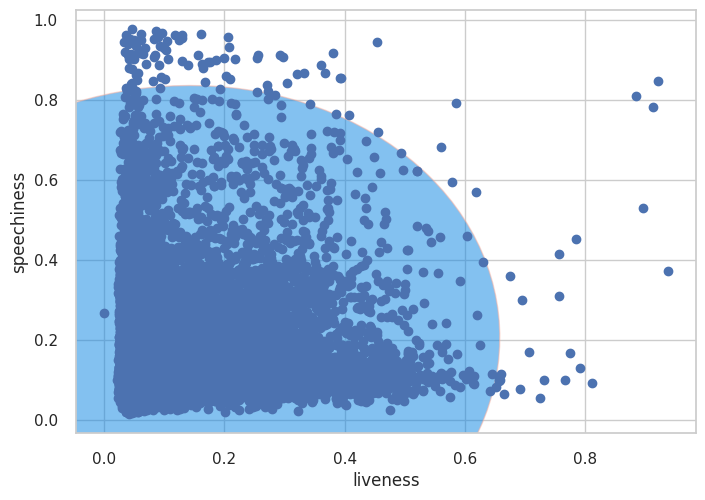

Index of Outliers: {6658, 4617, 4620, 525, 10254, 5653, 6677, 12309, 6168, 12823, 10778, 13855, 15905, 37, 8741, 10281, 7211, 4655, 2608, 4144, 6707, 5176, 13880, 5180, 10812, 5182, 10815, 6210, 3142, 4678, 10822, 5193, 9802, 4171, 14409, 4173, 13902, 8783, 8785, 4179, 2644, 8276, 9301, 10843, 3681, 9825, 12396, 5233, 3189, 15479, 14968, 1657, 15995, 5757, 15997, 6785, 6278, 5255, 1672, 7305, 13961, 4748, 1678, 16015, 6800, 9360, 1683, 6804, 1685, 1687, 4761, 13465, 16025, 12957, 13983, 160, 6816, 8353, 3235, 8865, 10917, 1702, 8359, 12968, 12460, 10413, 9390, 13485, 12979, 13494, 3768, 6840, 8376, 3771, 1737, 14025, 14537, 1741, 9424, 14035, 6877, 2784, 5350, 6887, 13547, 7919, 12018, 8949, 9461, 16117, 10489, 11521, 258, 7428, 2828, 14606, 10518, 16152, 10521, 5406, 10527, 11550, 12067, 13604, 15652, 13606, 4904, 9001, 9513, 11562, 11053, 16173, 15153, 13109, 8502, 14134, 1336, 4921, 13630, 11074, 1859, 1860, 15171, 10567, 15687, 7503, 9554, 13650, 10585, 10074, 14169, 10592, 10594, 

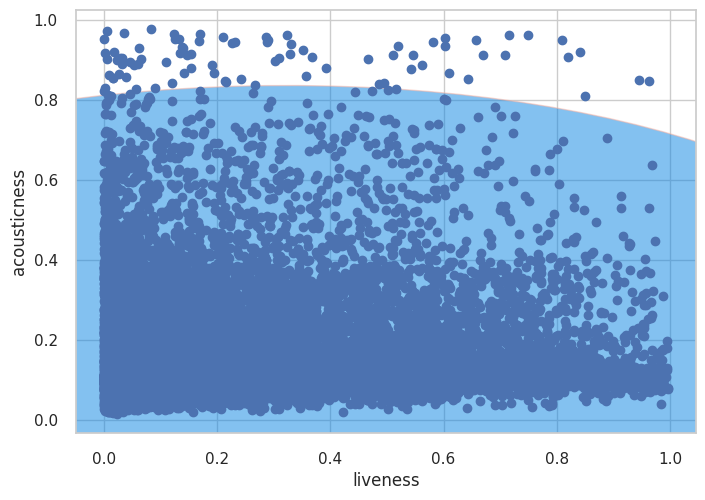

Index of Outliers: {2055, 10254, 10259, 12309, 6168, 6170, 6171, 8223, 10272, 37, 10281, 8238, 4144, 6192, 6198, 8246, 14391, 8249, 6202, 6203, 14396, 14400, 8257, 6210, 14409, 74, 4171, 77, 4173, 14417, 8274, 4179, 8276, 12377, 10342, 8296, 6249, 12396, 10350, 8310, 6269, 6278, 8326, 6288, 14485, 14486, 14487, 4248, 12440, 14488, 2207, 160, 8353, 8359, 14504, 6315, 12460, 10413, 4272, 10416, 8376, 6329, 11028, 2239, 2240, 8383, 8384, 8385, 8386, 8387, 14534, 14537, 8396, 8397, 8398, 8399, 10444, 12501, 10454, 10459, 224, 10465, 10471, 10474, 235, 236, 8431, 10479, 12528, 10489, 14585, 14588, 4353, 258, 260, 8457, 12560, 2323, 10518, 10521, 4381, 10527, 8482, 12580, 12586, 6444, 10540, 2354, 8502, 4407, 11053, 14654, 10560, 4422, 10567, 6476, 6486, 14680, 10585, 8555, 10603, 10607, 8562, 8564, 10622, 4486, 4487, 4488, 12684, 12692, 413, 4509, 8605, 8606, 8609, 8610, 13109, 8612, 8614, 8616, 8617, 8618, 8619, 8620, 8621, 6574, 8622, 8623, 8624, 8625, 8626, 12715, 12720, 14766, 4537, 249

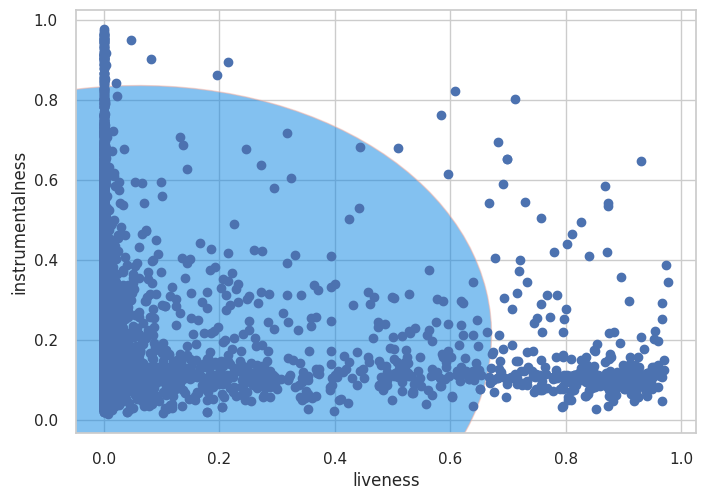

Index of Outliers: {4617, 4620, 525, 10252, 10254, 15378, 5653, 6677, 12309, 6168, 8729, 10778, 12823, 13855, 15905, 8741, 10281, 7211, 4655, 2608, 4144, 6707, 5176, 5180, 10812, 5182, 10815, 6210, 3142, 4678, 10822, 5193, 14409, 4171, 4173, 13902, 8783, 4179, 2644, 8276, 9301, 10843, 3681, 9825, 12396, 5233, 3189, 15479, 14968, 1657, 15995, 5757, 15997, 6785, 6278, 5255, 1672, 7305, 13961, 4748, 1678, 6800, 1683, 6804, 1685, 1687, 4761, 13465, 16025, 12957, 13983, 160, 6816, 8353, 3235, 2212, 8865, 1702, 8359, 10917, 12968, 12460, 10413, 9390, 13485, 12979, 13494, 183, 3768, 6840, 8376, 3771, 1727, 1737, 14537, 1741, 14035, 6877, 2784, 5350, 6887, 13547, 7919, 12018, 16117, 16118, 10489, 258, 2818, 7428, 2828, 14606, 4883, 10518, 16152, 10521, 5406, 10527, 11550, 12067, 13604, 15652, 13606, 4904, 9001, 9513, 11562, 11053, 16173, 15153, 13109, 8502, 14134, 1336, 4921, 13630, 11074, 1859, 1860, 15171, 10567, 7503, 9554, 1875, 13650, 10585, 10074, 5985, 10594, 7012, 2920, 8552, 12137, 10

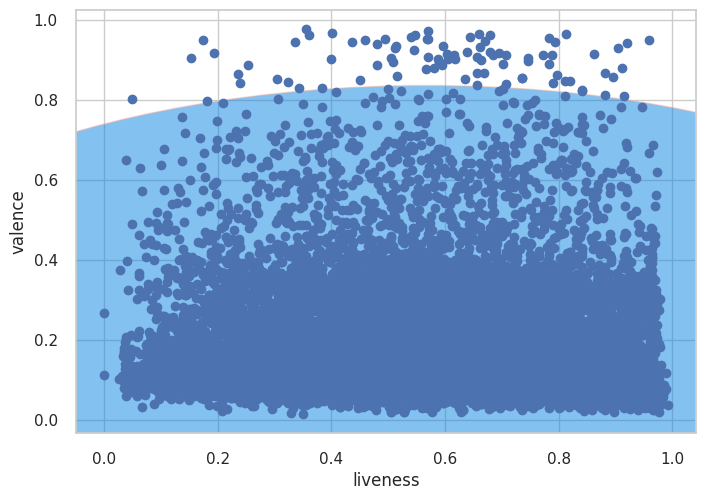

Index of Outliers: {4617, 11787, 4620, 10252, 10254, 13841, 10770, 15378, 5653, 6677, 12309, 6168, 8729, 10778, 12823, 13855, 15905, 8741, 10281, 7211, 4655, 2608, 4144, 6707, 8756, 5176, 5180, 10812, 5182, 10815, 6210, 3142, 4678, 10822, 5193, 14409, 4171, 8779, 4173, 13902, 8783, 4179, 2644, 8276, 9301, 10843, 3681, 9825, 12396, 5233, 3189, 9846, 15479, 14968, 1657, 15995, 5757, 15997, 6785, 6278, 5255, 1672, 7305, 13961, 4748, 1678, 4752, 6800, 1683, 6804, 1685, 1687, 4761, 13465, 16025, 12957, 13983, 160, 6816, 8353, 3235, 10917, 1702, 2726, 8359, 12968, 12460, 10413, 9390, 13485, 14514, 12979, 3764, 13494, 3768, 6840, 8376, 3771, 1727, 12992, 1737, 14537, 1741, 14035, 6877, 5350, 6887, 13547, 7919, 12018, 16117, 10489, 11521, 258, 2828, 10518, 16152, 10521, 5406, 10527, 11550, 12067, 13604, 15652, 13606, 4904, 9001, 9513, 11562, 11053, 16173, 15153, 13109, 8502, 14134, 1336, 4921, 7483, 13630, 1859, 1860, 10567, 329, 7503, 12113, 9554, 1875, 13650, 10585, 10074, 10592, 10594, 7012

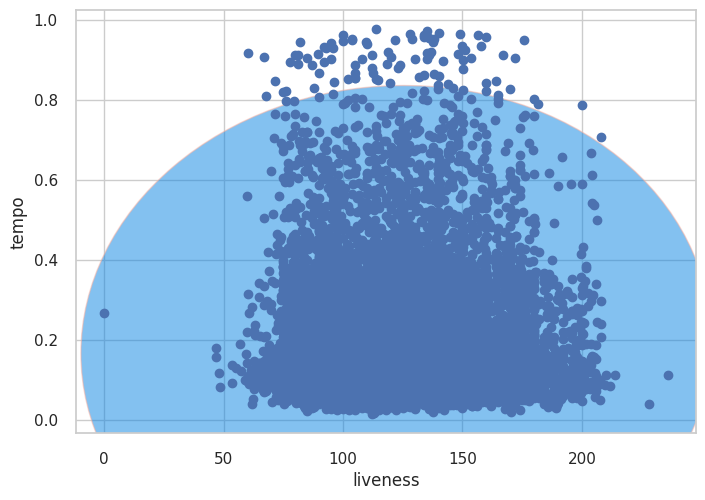

In [ ]:
for feature_2 in outlier_features:
    outliers = set()
    for i, feature_1 in enumerate(df[cols[2:]]):
        if feature_2 == feature_1:
            continue

        outlier_indexs = Mahalanobis_distance(df[cols[2:]], feature_1, feature_2)
        if len(outliers) == 0:
            if i == 0:
                outliers = outlier_indexs
            else:
                break
        else:
            outliers.intersection_update(list(outlier_indexs))

    if len(outliers) == 0:
        continue
    df_cleaned = df[cols][~df[cols].index.isin(list(outliers))].reset_index(drop=True)

## *Solution*
1. Các feature có nhiều multivirate ouliers => drop
2. Các feature có nhiều unvirate outliers => IQR, Z-Score hoặc giữ lại
3. Các feature bị lệch và nhọn hoặc thấp hơn phân phối nhiều so với pp chuẩn => PowerTransformer()
4. Các feature nào tương đương pp chuẩn rồi thì chỉ cần chuẩn hóa bằng StandardScaler()

## *Model*

In [ ]:
chosen_cols = ['duration', 'danceability','energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo']

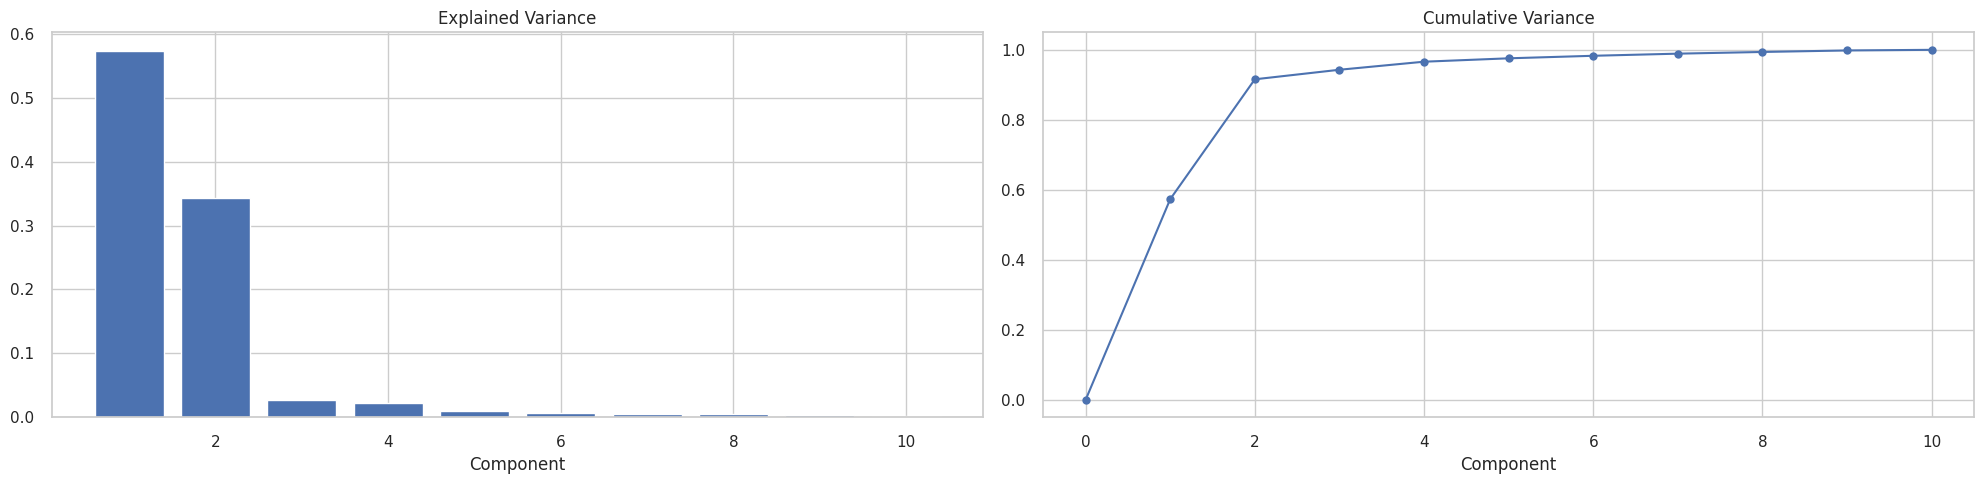

In [ ]:
def apply_pca(X, transformer = False, components = -1):
    if transformer:
        X_trans = pd.DataFrame(transformer.fit_transform(X))
        X_trans.columns = X.columns
    else:
        X_trans = X

    if components == -1:
        pca = PCA(svd_solver='randomized', random_state=42)
    else:
        pca = PCA(n_components = components, svd_solver='randomized', random_state=42)

    X_pca = pca.fit_transform(X_trans)
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)

    return pca, X_pca


def plot_variance(pca, width=8, dpi=100):
    fig, ax = plt.subplots(1, 2, figsize=(20,5))
    n = pca.n_components_
    explainedVariance = pca.explained_variance_ratio_
    grid = np.arange(1, n+1)

    ax[0].bar(grid, explainedVariance)
    ax[0].set(xlabel="Component", title="Explained Variance")

    cv = np.cumsum(explainedVariance)
    ax[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    ax[1].set(xlabel="Component", title="Cumulative Variance")

    fig.tight_layout()
    plt.show()


data_scaled = df_cleaned.copy()

power_feature = ['instrumentalness', 'loudness']
pt = PowerTransformer(method='yeo-johnson')
data_scaled[power_feature] = pt.fit_transform(data_scaled[power_feature])

mc = MinMaxScaler()
minmax_features = ['tempo', 'duration']
data_scaled[minmax_features] = mc.fit_transform(data_scaled[minmax_features])

# sc = StandardScaler()
# standard_features = ['temp    o', 'duration']
# data_scaled[standard_features] = sc.fit_transform(data_scaled[standard_features])


X = data_scaled[chosen_cols].copy()
pca, _ = apply_pca(X)
plot_variance(pca)

In [ ]:
def Z_score(df: pd.DataFrame, outlier_features: list[str]):
    indices = set()
    for feature in outlier_features:
        z = (df[feature] - df[feature].mean()) / df[feature].std()
        result = np.abs(z) > 3
        indices.update(np.where(result)[0])
        print(f"Method: Z-Score - Feature: {feature} - Percentage of outliers: {round(100 * sum(result) / len(result), 4)}%")
    return df[~df.index.isin(list(indices))].reset_index(drop=True)

def IQR_method(df: pd.DataFrame, outlier_features: list[str]):
    indices = set()
    for feature in outlier_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        result = (df[feature] < lower_bound) | (df[feature] > upper_bound)
        indices.update(np.where(result)[0])
        print(f"Method: IQR - Feature: {feature} - Percentage of outliers: {round(100 * sum(result) / len(result), 4)}%")
    return df[~df.index.isin(list(indices))].reset_index(drop=True)

data_scaled_clean = Z_score(data_scaled, outlier_features)

Method: Z-Score - Feature: duration - Percentage of outliers: 1.461%
Method: Z-Score - Feature: speechiness - Percentage of outliers: 1.3744%
Method: Z-Score - Feature: instrumentalness - Percentage of outliers: 6.2403%
Method: Z-Score - Feature: liveness - Percentage of outliers: 2.4949%


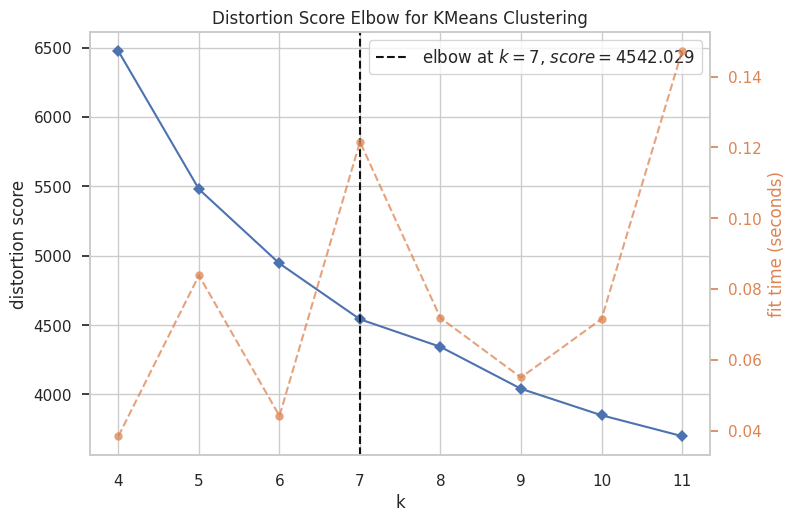

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(data_scaled_clean[chosen_cols])
visualizer.show()

In [ ]:
import sklearn.metrics as metrics
for i in range(4,13):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=42).fit(data_scaled_clean[chosen_cols]).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data_scaled_clean[chosen_cols],labels,metric="euclidean",sample_size=1000,random_state=42)))

Silhouette score for k(clusters) = 4 is 0.3265342424302224
Silhouette score for k(clusters) = 5 is 0.2797620281617644
Silhouette score for k(clusters) = 6 is 0.2484397121480997
Silhouette score for k(clusters) = 7 is 0.22936144707814762
Silhouette score for k(clusters) = 8 is 0.2266590012974274
Silhouette score for k(clusters) = 9 is 0.19384890466492716
Silhouette score for k(clusters) = 10 is 0.19321949982501638
Silhouette score for k(clusters) = 11 is 0.18573037041294652
Silhouette score for k(clusters) = 12 is 0.18311672139182447


In [ ]:
def Cluster_Kmean(df: pd.DataFrame):
    features = df.columns[1:]
    model = KMeans(n_init=50, random_state=42, n_clusters=7, init='k-means++', max_iter=300)
    df['Cluster'] = model.fit_predict(df[features])

    centroids = model.cluster_centers_

    X = df[features].copy()
    pca, projection = apply_pca(X, components=2)

    centroids_2D = pca.fit_transform(centroids)
    centroids_2D_df = pd.DataFrame(centroids_2D, columns=['x', 'y'])

    projection['Cluster'] = df['Cluster']
    projection['name'] = df['name']
    return df, projection, centroids_2D_df, model

def visualize_Kmean(df: pd.DataFrame, centroids: pd.DataFrame):
    fig = px.scatter(df, x='PC1', y='PC2', color=df['Cluster'].astype(str), hover_data=['PC1', 'PC2', 'name'], labels={'color': 'Cluster'})
    fig.show()

data_clustered, projection, centroids, model = Cluster_Kmean(data_scaled_clean[['name'] + chosen_cols].copy())
visualize_Kmean(projection, centroids)

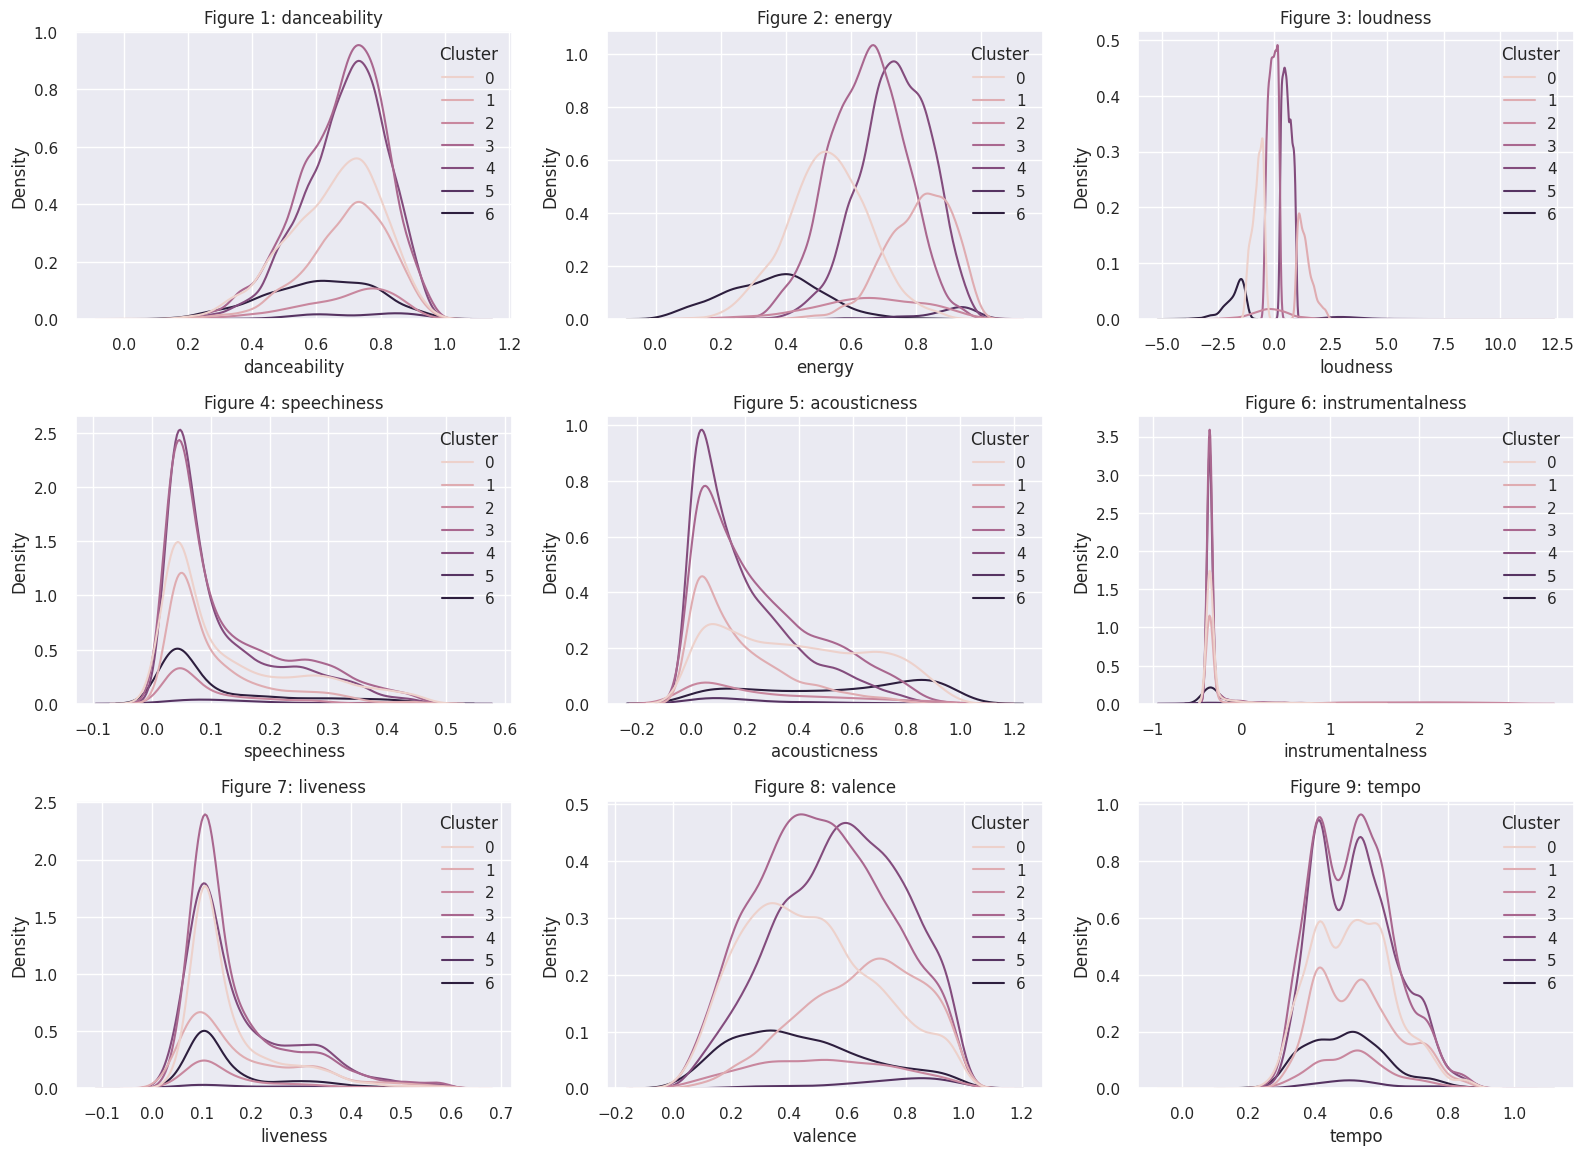

In [ ]:
def visualize_kdes(df: pd.DataFrame):
    features = df.columns[2:-1]
    n_rows = 4
    n_cols = 3
    fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_rows * 4, n_cols * 5))

    for row in range(0, n_rows):
        for col in range(0, n_cols):
            i = row*n_cols + col
            if i < len(features):
                ax_i = ax[row, col]
                sns.kdeplot(data = df, x = features[i], hue='Cluster', ax = ax_i)
                ax_i.set_title(f"Figure {i+1}: {features[i]}")
            else:
                ax[row, col].set_visible(False)
    plt.tight_layout()
    plt.show()

visualize_kdes(data_clustered)

In [ ]:
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# **RECOMMENDATION SYSTEM**

## Fit Model

In [ ]:
# PCA
data = data_scaled_clean[['name'] + chosen_cols].copy()
names = data['name']
data = data[data.columns[1:]]
pca_model, data_pca = apply_pca(data, components=2)

In [ ]:
# Model KMeans
model_kmeans = KMeans(n_init=50, random_state=42, n_clusters=7, init='k-means++', max_iter=300)
model_kmeans.fit(data_pca)
centroids = model_kmeans.cluster_centers_

In [ ]:
# Cluster of all records
data_pred = model_kmeans.predict(data_pca)
name = data_scaled_clean['name']
cluster_df_data = {
    'name': name,
    'cluster': data_pred,
    'PC1': data_pca['PC1'],
    'PC2': data_pca['PC2']
}
cluster_df = pd.DataFrame(cluster_df_data)

## Testing

In [ ]:
# Select the song for testing
from sklearn.model_selection import train_test_split
_, X_test = train_test_split(data_pca, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
def calculate_distance(point1, point2):
    return np.sum((point1 - point2) ** 2, axis=1)

def recommendation_system(sample, pca_model, kmeans_model, k=10, data_cluster_df=cluster_df):
    sample_pca = pca_model.fit_transform(sample)
    sample_predictions = kmeans_model.predict(sample_pca)
    recommendation = []
    for s, pred in zip(sample_pca, sample_predictions):
        # Choose the songs that have the samme cluster with current songs
        selected_cluster = data_cluster_df[data_cluster_df['cluster'] == sample_cluster[0]]
        selected_cluster['distance'] = calculate_distance(s, selected_cluster[['PC1', 'PC2']])

        # Sort by distance
        selected_cluster = selected_cluster.sort_values('distance')
        selected_cluster = selected_cluster[selected_cluster['distance'] > 0]

        # Select top k songs
        recommended_songs = selected_cluster['name'][:10]
        recommendation.append(list(recommended_songs))
    return recommendation

recommended_songs = recommendation_system(X_test, pca_model, model_kmeans)

In [ ]:
for list_songs in recommended_songs:
    print(list_songs)

['Bertaraf', 'Taras', 'One Dance', 'Overcompensate', 'PALISADE', 'Break Me Down', 'هذا دمعك', 'NO LOVE', 'Verden Vågner', 'luv']
['Yours Ever', 'Skarpt Lys', 'Hola Perdida', 'This December', 'Gol', 'Serenata', 'See Ei Ole Saladus', 'Siromah', 'Viikatemies', 'Eyvah Neye Yarar']
['تامر عاشور هيجيلي موجوع', 'Maitsetu Mait', 'Santorini', "Child's Play", 'Extasisssssss', 'E Adevărat', 'Я уёбываю в джаз', 'LiEBE AUF DER RÜCKBANK', 'SAMME VEJ', 'Benzin']
['تامر عاشور هيجيلي موجوع', 'Maitsetu Mait', 'Santorini', 'Extasisssssss', "Child's Play", 'E Adevărat', 'Benzin', 'LiEBE AUF DER RÜCKBANK', 'SAMME VEJ', 'Я уёбываю в джаз']
['تامر عاشور هيجيلي موجوع', 'Maitsetu Mait', 'Santorini', 'Extasisssssss', "Child's Play", 'E Adevărat', 'LiEBE AUF DER RÜCKBANK', 'Я уёбываю в джаз', 'Benzin', 'SAMME VEJ']
['Chakras', 'Not An Angel', 'Alcateia', 'Afterka', 'Eurosport', 'Batık Gemi', 'Maitsetu Mait', 'Santorini', 'تامر عاشور هيجيلي موجوع', 'Extasisssssss']
['S91', 'TELEKINESIS', 'La Última Canción', 'nie

In [ ]:
sample, name_sample = X_test.iloc[0].values, name_test.iloc[0]
sample = np.array(sample).reshape(1, -1)
sample_cluster = model_kmeans.predict(sample)
selected_cluster = cluster_df[cluster_df['cluster'] == sample_cluster[0]]
# sample_cluster
selected_cluster['distance'] = calculate_distance(sample, selected_cluster[['PC1', 'PC2']])
selected_cluster = selected_cluster.sort_values('distance')

selected_cluster = selected_cluster[selected_cluster['distance'] > 0]

current_song = data_scaled_clean[data_scaled_clean['name'] == name_sample]
# selected_cluster[['PC1', 'PC2']]

# sample.shape

In [ ]:
current_song

name              artists  is_explicit  key  time_signature  \
10146  Overcompensate  [Twenty One Pilots]            0    5               4   

       mode  duration  danceability  energy  loudness  speechiness  \
10146     0  0.237817         0.363   0.891  0.429549       0.0978   

       acousticness  instrumentalness  liveness  valence     tempo  
10146       0.00992         -0.101701     0.134    0.331  0.403078

In [ ]:
recommended_songs

3115             Taras
8929     Verden Vågner
1722          Bertaraf
725      Break Me Down
8576          Feelings
3975       Eyes On Dem
11821     If You Leave
7670          PALISADE
7203         One Dance
454           هذا دمعك
Name: name, dtype: object